# Plasmid heterozygosis: single-cell microfluidics data analysis

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
import sys
import pathlib
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.patches as patches
import scipy.stats as st
from scipy.stats import linregress
from IPython.display import HTML, display
import csv
import pandas as pd

from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'png')
#plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = "serif"
#plt.rcParams['font.serif'] = "cm"
#plt.rcParams['text.latex.preamble']="\\usepackage{subdepth},\\usepackage{type1cm}"

print("> Python libraries imported")

> Python libraries imported


In [4]:
#sys.path.insert(0, '/Users/ESB/RPM_SYNC/RPM_Work/uJ_master/current/uJ_src/python/')
#sys.path.insert(0, '/home/esb/Projects/uJ/uJ_master/current/uJ_src/python/')
#sys.path.insert(0, '/Users/ESB/SYNC_RPM/RPM_Work/uJ_master/current/uJ_src/python/')
#sys.path.insert(0, '/home/charly/Lab/Projects/uJ/local/current/uJ_src/python/')
sys.path.insert(0, '/home/esb/Projects/uJ/local/current/uJ_src/python/')
from AnalysisFunctions import *


> Python libraries imported


In [6]:
workingDir='/home/charly/Lab/Projects/uJ/local/experiments/HT-Sine2hr/' #local
workingDir='/home/esb/Projects/uJ/local/experiments/HT-Sine2hr/'
os.chdir(workingDir)

In [7]:
pwd()

'/home/esb/Projects/uJ/local/experiments/HT-Sine2hr'

In [8]:
def plot_Raw_flourescence(data1,data2,title,name1,name2,lg,lr):
    fig,ax= plt.subplots( figsize=(10,5))
    
    xm=np.mean(data1)
    ym=np.mean(data2)
    
    ax.scatter(data1,data2,s=5,alpha=.1)
    ax.scatter(xm,ym,c='r')
    #ax.set_aspect('equal')
    ax.grid(True)
    ax.set_xlim(left=0)
    if(lg):
        ax.set_xlim(right=lg)
    ax.set_ylim(bottom=0)
    
    if(lr):
        ax.set_ylim(top=lr)
    
    ax.set_title(title, va='bottom')
    ax.set_xlabel(name1)
    ax.set_ylabel(name2)

    lregGFP=linregress(data1,data2)
    x_vals = np.array(ax.get_xlim())
    y_vals = lregGFP.intercept + lregGFP.slope * x_vals
    ax.plot(x_vals, y_vals, '--g')

    return plt

def plot_polar_fluorescence(datap1,datap2,phimax,phimin,phimean,rhomean,rhomax,title):
    fig= plt.figure( figsize=(10,5))
    ax=fig.add_subplot(111,projection='polar') 
    ax.plot([0,phimin],[0,rhomax])
    ax.plot([0,phimax],[0,rhomax])
    ax.scatter(datap1, datap2,s=5,alpha=.1)
    ax.scatter(phimean,rhomean,c='r',zorder=3)
    ax.set_rmax(rhomax)
    lphimean=np.mean(datap1)
    lrhomean=np.mean(datap2)
    ax.scatter(lphimean,lrhomean,s=30,c='k',zorder=3)
   # ax.grid(True)

    ax.set_title("Polar plot of fluorescence %s"%(title), va='bottom')
    return plt

def plot_phi_hist(lphis,prange,pop):

    fig,ax= plt.subplots( figsize=(5,5))
    #phiden=st.gaussian_kde(lphis)
    #ax.plot(prange,phiden(prange),c='g')
    n,bins,patches=plt.hist(lphis,bins=prange)#,density='true')
    #plt.yscale("log")
   # print(n.std())
   # print(lphis.std())
    #plt.ylim(ymax=lymax)
    ax.set_title("Histogram %s "%(pop), va='bottom')
    ax.set_xlabel("Relative intensity (phis)")
    ax.set_ylabel("Count")
    return plt



In [14]:
## User-defined parameters

## User-defined parameters

expeLabel="HT13-Sine-2hr"
list_pos="xy01,xy02,xy03,xy05,xy06,xy07,xy08,xy09,xy10,xy11,xy12,xy13,xy14,xy15,xy16,xy17,xy18,xy19,xy20,xy21,xy22,xy23,xy24,xy25,xy26,xy27,xy28,xy29,xy30,xy31,xy32,xy33".split(",") 
list_pos="xy01,xy02,xy03,xy05,xy06,xy07,xy08,xy09,xy10,xy11,xy12,xy13,xy14,xy15,xy16,xy17,xy18,xy19,xy20,xy21,xy22,xy23,xy24,xy25,xy26,xy27,xy28,xy29,xy30,xy31,xy32".split(",") 
#list_pos="xy19".split(",")  
to_clean_trap="xy19"

          
rootDir="/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/"
#rootDir="/home/charly/Lab/Projects/uJ/local/data_sample/HT13-Sine-2hr/"  # online


#toFile=False
toFile=True

#Parameters 

frame2min=5

notcaptured_start=117
notcaptured_end=143

frame_experiment_start=1;
frame_signal_start=int(24-(frame_experiment_start-1)/2)
frame_signal_end=int(210-(frame_experiment_start-1)/2)
frame_experiment_end=int(210-(frame_experiment_start-1)/2)



frame_experiment_start=1;
frame_signal_start=int(24-(frame_experiment_start-1)/2)
frame_signal_end=int(116-(frame_experiment_start-1)/2)
frame_experiment_end=int(116-(frame_experiment_start-1)/2)

t_experiment_start=0
t_signal_start=(frame_signal_start-frame_experiment_start)*frame2min  
t_signal_end=(frame_signal_end-frame_experiment_start)*frame2min
t_experiment_end=(frame_experiment_end-frame_experiment_start)*frame2min

frames=range(int(frame_experiment_start),int(frame_experiment_end+1))
frames_list=[x for x in frames]
times=[(this_frame-frame_experiment_start)*frame2min for this_frame in frames]
times_hour=[(this_frame-frame_experiment_start)*frame2min/60 for this_frame in frames]
#print("\nMinutes:  %s"%times)
#print("\nHours:  [%s,%s]"%(times_hour[0],times_hour[-1]))


print("\nFrames:  %s\t %s->%s hours"%(frames,times_hour[0],times_hour[-1]))
print("\nFrame list:  %s"%(frames_list))
print("t_experiment_start=%s\t(%sh)"%(t_experiment_start, t_experiment_start/60))
print("t_signal_start=%s\t(%sh)"%(t_signal_start,t_signal_start/60))
print("t_signal_end=%s\t(%sh)"%(t_signal_end, t_signal_end/60))
print("t_experiment_end=%s\t(%sh)"%(t_experiment_end, t_experiment_end/60))


#Prepare file system
dataPath="%sdata/DsRed+GFP/"%rootDir

figurePath="%sfigures/"%rootDir
if not os.path.exists(figurePath) and toFile:
    os.mkdir(figurePath)

normDataPath="%sdata/normData/"%rootDir
if not os.path.exists(normDataPath) and toFile:
    os.mkdir(normDataPath)

normDataNPath="%sdata/normDataN/"%rootDir
if not os.path.exists(normDataNPath) and toFile:
    os.mkdir(normDataNPath)

    
relIntensityPath="%sdata/relativeIntensity/"%rootDir
if not os.path.exists(relIntensityPath) and toFile:
    os.mkdir(relIntensityPath)

    
    
print("\n> Parameters loaded")


Frames:  range(1, 117)	 0.0->9.583333333333334 hours

Frame list:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116]
t_experiment_start=0	(0.0h)
t_signal_start=115	(1.9166666666666667h)
t_signal_end=575	(9.583333333333334h)
t_experiment_end=575	(9.583333333333334h)

> Parameters loaded


24

In [15]:

data_pos=[]
data_frame=[]
data_GFP=[]
data_DsRed=[]
data_phi=[]
data_rho=[]

pop_df_list=[]
loaded_frames=0;
for root, dirs, files in os.walk(dataPath):
    dirs.sort()
    files.sort()
    #print("*",path)
    path = root.split(os.sep)
    if(not path[-1] in list_pos):
        continue
    print(path)
    trap_df_list=[]
    for file in files:
        
        extension=""
        if len(os.path.splitext(file))>0:
            extension=pathlib.Path(file).suffix
        filePath = os.path.join(root,file)
        #print(filePath)
        if extension == ".txt":
            fileframe=file.split('_')[-1].split('.')[0]
            
            if(int(fileframe)>frame_experiment_end):
                continue
            print(fileframe, end='.')
            #print("Loading data from: " + file)
            
            data=fromFileData(filePath)
            this_pos=[]
            this_frame=[]
            this_GFP=[]
            this_DsRed=[]
            this_imgGFP=[]
            this_imgDsRed=[]
            this_phi=[]
            this_rho=[]
            this_id=[]
            this_label=[]
            for roi in data:
                this_id.append(int(roi[1]))
                this_imgGFP.append(str(roi[2]))
                this_imgDsRed.append(str(roi[3]))
                this_pos.append(str(roi[4]))
                this_frame.append(int(roi[5]))
                this_label.append(str(roi[6]))
                gfp=float(roi[7])
                dsred=float(roi[8])
                this_GFP.append(gfp)
                this_DsRed.append(dsred)
                
                phi,rho=cart2pol(gfp,dsred)    
                
                this_phi.append(phi)
                this_rho.append(rho)
                
            data_pos.extend(this_pos)
            data_frame.extend(this_frame)
            data_GFP.extend(this_GFP)
            data_DsRed.extend(this_DsRed)
            data_phi.extend(this_phi)
            data_rho.extend(this_rho)
            loaded_frames+=1
    
        trap_pos_df=pd.DataFrame({"pos":this_pos,"frame":this_frame,"id":this_id,"imgGFP":this_imgGFP,"imgDsRed":this_imgDsRed,"label":this_label,"GFP":this_GFP,"DsRed":this_DsRed,"phi":this_phi,"rho":this_rho})        
        trap_df_list.append(trap_pos_df)
    print()
    trap_df=pd.concat(trap_df_list)
    pop_df_list.append(trap_df)

pop_df=pd.concat(pop_df_list)
            
data_frame=np.asarray(data_frame)
data_GFP=np.asarray(data_GFP)
data_DsRed=np.asarray(data_DsRed)
data_phi=np.asarray(data_phi)
data_rho=np.asarray(data_rho) 
data_pos=np.asarray(data_pos)

print("> Data loaded (%s cells from %s images)"%(len(data_GFP), loaded_frames))

['', 'home', 'esb', 'Projects', 'uJ', 'local', 'data_sample', 'HT13-Sine-2hr', 'data', 'DsRed+GFP', 'xy01']
001.002.003.004.005.006.007.008.009.010.011.012.013.014.015.016.017.018.019.020.021.022.023.024.025.026.027.028.029.030.031.032.033.034.035.036.037.038.039.040.041.042.043.044.045.046.047.048.049.050.051.052.053.054.055.056.057.058.059.060.061.062.063.064.065.066.067.068.069.070.071.072.073.074.075.076.077.078.079.080.081.082.083.084.085.086.087.088.089.090.091.092.093.094.095.096.097.098.099.100.101.102.103.104.105.106.107.108.109.110.111.112.113.114.115.116.
['', 'home', 'esb', 'Projects', 'uJ', 'local', 'data_sample', 'HT13-Sine-2hr', 'data', 'DsRed+GFP', 'xy02']
001.002.003.004.005.006.007.008.009.010.011.012.013.014.015.016.017.018.019.020.021.022.023.024.025.026.027.028.029.030.031.032.033.034.035.036.037.038.039.040.041.042.043.044.045.046.047.048.049.050.051.052.053.054.055.056.057.058.059.060.061.062.063.064.065.066.067.068.069.070.071.072.073.074.075.076.077.078.079.080

001.002.003.004.005.006.007.008.009.010.011.012.013.014.015.016.017.018.019.020.021.022.023.024.025.026.027.028.029.030.031.032.033.034.035.036.037.038.039.040.041.042.043.044.045.046.047.048.049.050.051.052.053.054.055.056.057.058.059.060.061.062.063.064.065.066.067.068.069.070.071.072.073.074.075.076.077.078.079.080.081.082.083.084.085.086.087.088.089.090.091.092.093.094.095.096.097.098.099.100.101.102.103.104.105.106.107.108.109.110.111.112.113.114.115.116.
['', 'home', 'esb', 'Projects', 'uJ', 'local', 'data_sample', 'HT13-Sine-2hr', 'data', 'DsRed+GFP', 'xy17']
001.002.003.004.005.006.007.008.009.010.011.012.013.014.015.016.017.018.019.020.021.022.023.024.025.026.027.028.029.030.031.032.033.034.035.036.037.038.039.040.041.042.043.044.045.046.047.048.049.050.051.052.053.054.055.056.057.058.059.060.061.062.063.064.065.066.067.068.069.070.071.072.073.074.075.076.077.078.079.080.081.082.083.084.085.086.087.088.089.090.091.092.093.094.095.096.097.098.099.100.101.102.103.104.105.106.107

001.002.003.004.005.006.007.008.009.010.011.012.013.014.015.016.017.018.019.020.021.022.023.024.025.026.027.028.029.030.031.032.033.034.035.036.037.038.039.040.041.042.043.044.045.046.047.048.049.050.051.052.053.054.055.056.057.058.059.060.061.062.063.064.065.066.067.068.069.070.071.072.073.074.075.076.077.078.079.080.081.082.083.084.085.086.087.088.089.090.091.092.093.094.095.096.097.098.099.100.101.102.103.104.105.106.107.108.109.110.111.112.113.114.115.116.
['', 'home', 'esb', 'Projects', 'uJ', 'local', 'data_sample', 'HT13-Sine-2hr', 'data', 'DsRed+GFP', 'xy31']
001.002.003.004.005.006.007.008.009.010.011.012.013.014.015.016.017.018.019.020.021.022.023.024.025.026.027.028.029.030.031.032.033.034.035.036.037.038.039.040.041.042.043.044.045.046.047.048.049.050.051.052.053.054.055.056.057.058.059.060.061.062.063.064.065.066.067.068.069.070.071.072.073.074.075.076.077.078.079.080.081.082.083.084.085.086.087.088.089.090.091.092.093.094.095.096.097.098.099.100.101.102.103.104.105.106.107

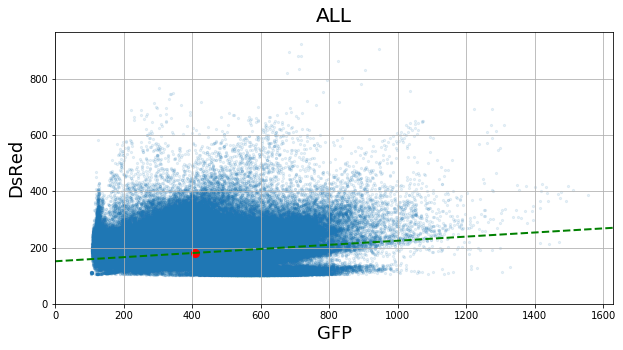

In [16]:
plt=plot_Raw_flourescence(pop_df["GFP"],pop_df["DsRed"],"ALL","GFP","DsRed",0,0)
plt.show()
plt.close()

# for trap in list_pos:
#     trap_df=pop_df[pop_df['pos']==trap].copy()
    
#     plt=plot_Raw_flourescence(trap_df["GFP"],trap_df["DsRed"],trap,"GFP","DsRed",0,0)
#     plt.show()
#     plt.close()


In [17]:
trapDF_list=[]
pop_df_presignal=pop_df[pop_df['frame']<frame_signal_start].copy()
meanGFPp=pop_df_presignal['GFP'].mean()
meanDsRedp=pop_df_presignal['DsRed'].mean()


print("Normalizing flourescence by max per trap and calculating its polar coordinates ")
for trap in list_pos:
    trap_df=pop_df[pop_df['pos']==trap].copy()
    gfp_max=trap_df['GFP'].max()
    rfp_max=trap_df['DsRed'].max()
    print(trap, end=' ')

    gfpsN=trap_df["GFP"]/gfp_max
    rfpsN=trap_df["DsRed"]/rfp_max
    pos=trap_df['pos']
    ids=trap_df['id']
    frames=trap_df['frame']
    phis=[]
    rhos=[]
    relInt=[]
    absInt=[]
    for this_gfp,this_rfp in zip(gfpsN,rfpsN):
        this_phi,this_rho=cart2pol(this_gfp,this_rfp)
        phis.append(this_phi)
        rhos.append(this_rho)
        rgfp=this_gfp*gfp_max
        rrfp=this_rfp*rfp_max
        ri=((rgfp/meanGFPp)-(rrfp/meanDsRedp))
        relInt.append(ri)
        ai=np.sqrt((rgfp**2)+(rrfp**2))
        absInt.append(ai)


    trapDF=pd.DataFrame({"pos":pos,"frame":frames,"id":ids,"relInt":relInt,"absInt":absInt,"GFP_N":gfpsN,"DsRed_N":rfpsN,"phi_N":phis,"rho_N":rhos})
    trapDF_list.append(trapDF)
trapDF=pd.concat(trapDF_list)
pop_df_plus=pd.merge(pop_df,trapDF,on=['pos','frame','id'])
trapDF=[]
pop_df_plus.head()

Normalizing flourescence by max per trap and calculating its polar coordinates 
xy01 xy02 xy03 xy05 xy06 xy07 xy08 xy09 xy10 xy11 xy12 xy13 xy14 xy15 xy16 xy17 xy18 xy19 xy20 xy21 xy22 xy23 xy24 xy25 xy26 xy27 xy28 xy29 xy30 xy31 xy32 

pos  frame  id                          imgGFP  \
0  xy01      1   0  HT13-Sine-2hr_xy01_GFP_001.tif   
1  xy01      1   1  HT13-Sine-2hr_xy01_GFP_001.tif   
2  xy01      1   2  HT13-Sine-2hr_xy01_GFP_001.tif   
3  xy01      1   3  HT13-Sine-2hr_xy01_GFP_001.tif   
4  xy01      1   4  HT13-Sine-2hr_xy01_GFP_001.tif   

                           imgDsRed          label      GFP    DsRed  \
0  HT13-Sine-2hr_xy01_DsRed_001.tif  _n0_x262 y413  388.748  189.601   
1  HT13-Sine-2hr_xy01_DsRed_001.tif  _n1_x489 y409  127.186  213.250   
2  HT13-Sine-2hr_xy01_DsRed_001.tif  _n2_x111 y408  327.142  163.261   
3  HT13-Sine-2hr_xy01_DsRed_001.tif  _n3_x218 y401  269.424  145.674   
4  HT13-Sine-2hr_xy01_DsRed_001.tif  _n4_x123 y381  338.444  171.185   

        phi         rho    relInt      absInt     GFP_N   DsRed_N     phi_N  \
0  0.453777  432.519996 -0.105541  432.519996  0.544651  0.325098  0.538132   
1  1.033015  248.297888 -0.844037  248.297888  0.178193  0.365648  1.117333   
2  0.462889  365.617344 -0.108658  365.617344  0.458339  0.279935  0.548293   
3  0.495665  306.284518 -0.149536  306.284518  0.377474  0.249779  0.584565   
4  0.468277  379.273840 -0.124637  379.273840  0.474173  0.293522  0.554286   

      rho_N  
0  0.634298  
1  0.406757  
2  0.537064  
3  0.452632  
4  0.557669

## This section discriminate data by their angle in polar coordinates 
#### Creates a histogram by trap/pos using the bins of the whole population distribution
#### Gives a data frame of data which angles have n element in a bin.


In [18]:

to_check_df_list=[]
n_lim=5  #use 10 for accurate rotation and normalization, 1 for exploring one trap



for angle_type in ["phi","phi_N"]:

    maxPhiT=pop_df_plus[angle_type].max()
    minPhiT=pop_df_plus[angle_type].min()
    phi_range=np.linspace(minPhiT,maxPhiT,100)



    for trap in list_pos:
        trap_df=pop_df_plus[pop_df_plus['pos']==trap].copy()
#        print(trap, end=" ")

        #### comment this conditional to analize all traps  #####   
    #     if(trap!=to_clean_trap):
    #         continue


        n,bins,patches=plt.hist(trap_df[angle_type],bins=phi_range)
        #plt.show()
        plt.close()

        lows=[]
        tmean=trap_df[angle_type].mean()
        for i,ni in enumerate(n):

            if(ni<=n_lim):
                lows.append(bins[i])
                #print("****",ni,bins[i])


        lefts=[x for x in lows if x<tmean]
        rights=[x for x in lows if x>tmean]
        lt=0
        rt=bins[-1]
        if(len(lefts)>0):
            lt=lefts[-1]
        if(len(rights)>0):
            rt=rights[0]
        #print("Trap %s thresholds: %s\t%s"%(trap,lt,rt))
        to_check_trap_df=trap_df[(trap_df[angle_type]<=lt)|(trap_df[angle_type]>=rt)].copy()
        to_check_df_list.append(to_check_trap_df)
#        print(to_check_trap_df["frame"].tolist())
        #print()

to_check_df=pd.concat(to_check_df_list)

to_check_df.describe()


frame           id          GFP        DsRed          phi  \
count  2433.000000  2433.000000  2433.000000  2433.000000  2433.000000   
mean     59.406905   173.764488   296.772601   297.256650     0.837256   
std      33.407553   158.130682   217.330294   139.501409     0.294057   
min       1.000000     0.000000   108.597000   105.113000     0.086769   
25%      31.000000    20.000000   173.764000   190.886000     0.771725   
50%      56.000000   160.000000   222.132000   264.714000     0.913730   
75%      89.000000   281.000000   307.191000   378.868000     1.036107   
max     116.000000   617.000000  1471.036000   768.656000     1.358418   

               rho       relInt       absInt        GFP_N      DsRed_N  \
count  2433.000000  2433.000000  2433.000000  2433.000000  2433.000000   
mean    447.801271    -0.897013   447.801271     0.292644     0.536728   
std     206.380010     0.972214   206.380010     0.193929     0.180691   
min     170.900279    -3.403171   170.900279     0.081296     0.161176   
25%     303.089367    -1.446250   303.089367     0.171735     0.398057   
50%     401.330280    -0.934938   401.330280     0.219491     0.535266   
75%     553.536452    -0.546235   553.536452     0.311788     0.664026   
max    1487.254622     2.440915  1487.254622     1.000000     1.000000   

             phi_N        rho_N  
count  2433.000000  2433.000000  
mean      1.084078     0.642496  
std       0.293125     0.176514  
min       0.232103     0.188793  
25%       1.076256     0.523549  
50%       1.180866     0.631598  
75%       1.256563     0.761229  
max       1.403747     1.196632

### Subtract the elements of the population data frame

In [19]:
to_check_df.index
pop_df_plus_purged=pop_df_plus.copy()
pop_df_plus_purged.drop(to_check_df.index,axis=0,inplace=True)


In [20]:
#pop_df_plus_purged[(pop_df_plus_purged['pos']=="xy19")&(pop_df_plus_purged['frame']==53)&(pop_df_plus_purged['id']>230)&(pop_df_plus_purged['id']<=235)]

## Center mean on $\pi$ and resize data to $[0,\pi]$

In [21]:

pop_df_plus_presignal=pop_df_plus[pop_df_plus['frame']<frame_signal_start].copy()
meanPhi=pop_df_plus_presignal['phi'].mean()
rot_theta=np.pi/2- meanPhi


maxPhi=pop_df_plus_purged['phi'].max()
minPhi=pop_df_plus_purged['phi'].min()


maxPhi_rot=maxPhi+rot_theta
minPhi_rot=minPhi+rot_theta
meanPhi_rot=meanPhi+rot_theta

meanRho=pop_df_plus_purged['rho'].mean()
maxRho=pop_df_plus_purged['rho'].max()



minPhi_N=pop_df_plus_purged["phi_N"].min()
maxPhi_N=pop_df_plus_purged["phi_N"].max()
#meanPhi_N=(maxPhi_N-minPhi_N)/2
meanPhi_N=pop_df_plus_presignal["phi_N"].mean()
rot_theta_N=np.pi/2- meanPhi_N
meanPhi_Nrot=meanPhi_N+rot_theta_N
minPhi_Nrot=minPhi_N+rot_theta_N
maxPhi_Nrot=maxPhi_N+rot_theta_N

#print("All:    \t",minPhi_rot,maxPhi_rot,meanPhi_rot,rot_theta,minPhi,maxPhi)
#print("All:    \t",minPhi_Nrot,maxPhi_Nrot,meanPhi_Nrot,rot_theta_N,minPhi_N,maxPhi_N)



trapDF_list=[]

for trap in list_pos:
    trap_df=pop_df_plus[pop_df_plus['pos']==trap].copy()
    pos=trap_df['pos']
    ids=trap_df['id']
    frames=trap_df['frame']
    print(trap,end=" ")
    
    phis_rot=trap_df['phi']+rot_theta
    rhos=trap_df['rho']
    
    phis01=[]
    
    for this_phi in phis_rot:

        if(this_phi<meanPhi_rot):
            phi01=((this_phi-minPhi_rot)/(meanPhi_rot-minPhi_rot))*np.pi/2
                  
           # phi01=0
        else:
            phi01=((this_phi-meanPhi_rot)/(maxPhi_rot-meanPhi_rot)+1)*np.pi/2
#         if(phi01==np.pi):
#             print("*",this_phi)
#         if(phi01==0):
#             print("*",this_phi)

        phis01.append(phi01)
    
    rhos01=rhos/maxRho 
    
    phis_Nrot=trap_df['phi_N']+rot_theta_N
    rhosN01=trap_df['rho_N']
    rhosN01=rhosN01/np.max(rhosN01)
    phisN01=[]

    for this_phi in phis_Nrot:

        if(this_phi<meanPhi_Nrot):
            phi01=((this_phi-minPhi_Nrot)/(meanPhi_Nrot-minPhi_Nrot))*np.pi/2
           # phi01=0
        else:
            phi01=((this_phi-meanPhi_Nrot)/(maxPhi_Nrot-meanPhi_Nrot)+1)*np.pi/2
#         if(phi01==np.pi):
#             print("**",this_phi)
#         if(phi01==0):
#             print("**",this_phi)

        phisN01.append(phi01)
    
    
    trapDF=pd.DataFrame({"pos":pos,"frame":frames,"id":ids,"phi_rot":phis_rot,"phi_01":phis01,"rho_01":rhos01,"phi_Nrot":phis_Nrot,"phi_N01":phisN01,"rho_N01":rhosN01})
    trapDF_list.append(trapDF)
print()
trapDF=pd.concat(trapDF_list)
pop_df_plus=pd.merge(pop_df_plus,trapDF,on=['pos','frame','id'])
trapDF=[]
pop_df_plus.tail()


xy01 xy02 xy03 xy05 xy06 xy07 xy08 xy09 xy10 xy11 xy12 xy13 xy14 xy15 xy16 xy17 xy18 xy19 xy20 xy21 xy22 xy23 xy24 xy25 xy26 xy27 xy28 xy29 xy30 xy31 xy32 


pos  frame   id                          imgGFP  \
1378938  xy32    116  261  HT13-Sine-2hr_xy32_GFP_116.tif   
1378939  xy32    116  262  HT13-Sine-2hr_xy32_GFP_116.tif   
1378940  xy32    116  263  HT13-Sine-2hr_xy32_GFP_116.tif   
1378941  xy32    116  264  HT13-Sine-2hr_xy32_GFP_116.tif   
1378942  xy32    116  265  HT13-Sine-2hr_xy32_GFP_116.tif   

                                 imgDsRed           label      GFP    DsRed  \
1378938  HT13-Sine-2hr_xy32_DsRed_116.tif  _n261_x382 y81  377.028  156.588   
1378939  HT13-Sine-2hr_xy32_DsRed_116.tif  _n262_x196 y93  302.180  153.440   
1378940  HT13-Sine-2hr_xy32_DsRed_116.tif  _n263_x314 y86  355.554  216.991   
1378941  HT13-Sine-2hr_xy32_DsRed_116.tif  _n264_x306 y66  434.967  164.712   
1378942  HT13-Sine-2hr_xy32_DsRed_116.tif  _n265_x328 y61  337.188  146.044   

              phi         rho    ...        GFP_N   DsRed_N     phi_N  \
1378938  0.393645  408.252268    ...     0.438762  0.309519  0.614366   
1378939  0.469850  338.904981    ...     0.351658  0.303297  0.711693   
1378940  0.547951  416.537803    ...     0.413772  0.428915  0.803366   
1378941  0.361990  465.108949    ...     0.506188  0.325578  0.571577   
1378942  0.408731  367.456933    ...     0.392398  0.288678  0.634270   

            rho_N   phi_rot    phi_01    rho_01  phi_Nrot   phi_N01   rho_N01  
1378938  0.536949  1.538952  1.411049  0.254666  1.470034  1.222336  0.448620  
1378939  0.464384  1.615157  1.652589  0.211408  1.567360  1.558913  0.387993  
1378940  0.595966  1.693259  1.796592  0.259835  1.659034  1.786009  0.497929  
1378941  0.601853  1.507298  1.252254  0.290133  1.427245  1.074360  0.502848  
1378942  0.487146  1.554039  1.486731  0.229218  1.489937  1.291166  0.407010  

[5 rows x 22 columns]

In [22]:
pop_df_plus_limits=pop_df_plus_purged.copy()
pop_df_plus_limits=pd.merge(pop_df_plus,pop_df_plus_purged)


Rho: 450.573304493738 1603.0876676978712


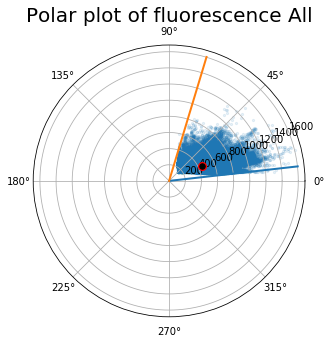

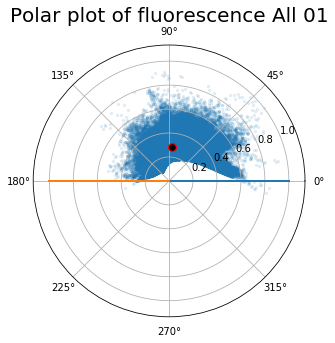

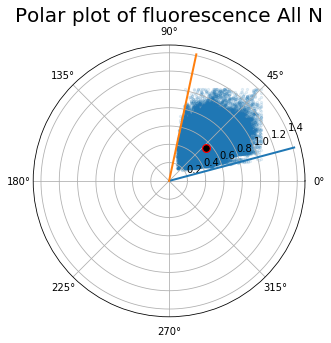

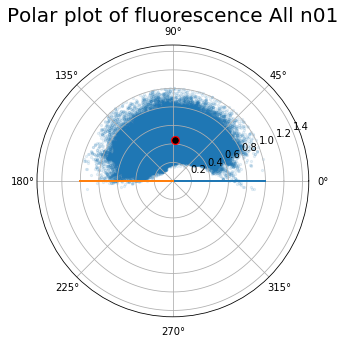

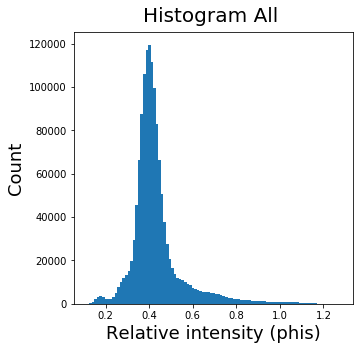

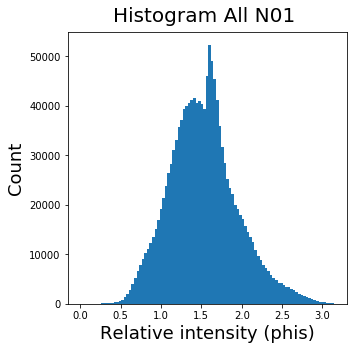

In [23]:

meanPhi=pop_df_plus_limits.phi.mean()
maxPhi=pop_df_plus_limits.phi.max()
minPhi=pop_df_plus_limits.phi.min()

meanRho=pop_df_plus_limits.rho.mean()
maxRho=pop_df_plus_limits.rho.max()
print("Rho:",meanRho,maxRho)

plt=plot_polar_fluorescence(pop_df_plus['phi'],pop_df_plus['rho'],maxPhi,minPhi,meanPhi,meanRho,maxRho,"All")
plt.show()
plt.close()

meanPhi01=pop_df_plus_limits.phi_01.mean()
maxPhi01=pop_df_plus_limits.phi_01.max()
minPhi01=pop_df_plus_limits.phi_01.min()

meanRho01=pop_df_plus.rho_01.mean()
maxRho01=pop_df_plus.rho_01.max()
#print("Rho:",meanRho,maxRho)

plt=plot_polar_fluorescence(pop_df_plus['phi_01'],pop_df_plus['rho_01'],maxPhi01,minPhi01,meanPhi01,meanRho01,maxRho01,"All 01")
plt.show()
plt.close()



meanPhiN=pop_df_plus_limits.phi_N.mean()
maxPhiN=pop_df_plus_limits.phi_N.max()
minPhiN=pop_df_plus_limits.phi_N.min()

meanRhoN=pop_df_plus_limits.rho_N.mean()
maxRhoN=pop_df_plus_limits.rho_N.max()


plt=plot_polar_fluorescence(pop_df_plus['phi_N'],pop_df_plus['rho_N'],maxPhiN,minPhiN,meanPhiN,meanRhoN,maxRhoN,"All N")
plt.show()
plt.close()


meanPhiN01=pop_df_plus_limits.phi_N01.mean()
maxPhiN01=pop_df_plus_limits.phi_N01.max()
minPhiN01=pop_df_plus_limits.phi_N01.min()

meanRhoN01=pop_df_plus_limits.rho_N01.mean()
maxRhoN01=pop_df_plus_limits.rho_N01.max()


plt=plot_polar_fluorescence(pop_df_plus['phi_N01'],pop_df_plus['rho_N01'],maxPhiN01,minPhiN01,meanPhiN01,meanRhoN01,maxRhoN01,"All n01")
plt.show()
plt.close()



phi_range=np.linspace(minPhi,maxPhi,100)
plt=plot_phi_hist(pop_df_plus['phi'],phi_range,"All")
plt.show()
plt.close()

phi_range=np.linspace(minPhiN01,maxPhiN01,100)
plt=plot_phi_hist(pop_df_plus['phi_N01'],phi_range,"All N01")
plt.show()
plt.close()


## Calculate deviation over mean

In [24]:
pop_df_plus_presignal=pop_df_plus[pop_df_plus['frame']<frame_signal_start].copy()
meanPhi01=pop_df_plus_presignal['phi_01'].mean()
meanPhi_N01=pop_df_plus_presignal["phi_N01"].mean()

print(meanPhi,meanPhi_N)

phis=pop_df_plus['phi_01']
phis_N=pop_df_plus['phi_N01']
pos=pop_df_plus['pos']
ids=pop_df_plus['id']
frames=pop_df_plus['frame']


dev_mean=[]
dev_mean_N=[]

for this_phi,this_phiN in zip(phis,phis_N):

    this_dev=(this_phi-meanPhi01)/np.pi

    this_devN=(this_phiN-meanPhi_N01)/np.pi
    
    dev_mean.append(this_dev)
    dev_mean_N.append(this_devN)

tempDF=pd.DataFrame({"pos":pos,"frame":frames,"id":ids,"dev_mean":dev_mean,"dev_mean_N":dev_mean_N})
pop_df_plus=pd.merge(pop_df_plus,tempDF,on=['pos','frame','id'])



pop_df_plus.describe()

0.4318483739572689 0.7151287238297851


frame            id           GFP         DsRed           phi  \
count  1.378943e+06  1.378943e+06  1.378943e+06  1.378943e+06  1.378943e+06   
mean   4.997723e+01  2.095342e+02  4.095756e+02  1.811192e+02  4.322766e-01   
std    3.315677e+01  1.377734e+02  1.043754e+02  3.582410e+01  1.210205e-01   
min    1.000000e+00  0.000000e+00  1.049180e+02  1.017510e+02  8.676861e-02   
25%    2.100000e+01  9.600000e+01  3.452805e+02  1.593000e+02  3.725150e-01   
50%    4.500000e+01  1.940000e+02  4.024080e+02  1.744410e+02  4.078546e-01   
75%    7.700000e+01  3.020000e+02  4.669000e+02  1.947245e+02  4.530316e-01   
max    1.160000e+02  6.300000e+02  1.555690e+03  9.251030e+02  1.358418e+00   

                rho        relInt        absInt         GFP_N       DsRed_N  \
count  1.378943e+06  1.378943e+06  1.378943e+06  1.378943e+06  1.378943e+06   
mean   4.505766e+02 -1.141216e-02  4.505766e+02  4.030953e-01  3.506870e-01   
std    9.856294e+01  2.765064e-01  9.856294e+01  1.083169e-01  8.835759e-02   
min    1.503636e+02 -3.403171e+00  1.503636e+02  7.587566e-02  1.145818e-01   
25%    3.857365e+02 -9.397118e-02  3.857365e+02  3.287539e-01  2.898597e-01   
50%    4.405226e+02  1.049818e-02  4.405226e+02  3.975185e-01  3.400407e-01   
75%    5.040392e+02  1.122531e-01  5.040392e+02  4.713055e-01  4.034041e-01   
max    1.603088e+03  2.440915e+00  1.603088e+03  1.000000e+00  1.000000e+00   

              phi_N         rho_N       phi_rot        phi_01        rho_01  \
count  1.378943e+06  1.378943e+06  1.378943e+06  1.378943e+06  1.378943e+06   
mean   7.206550e-01  5.401235e-01  1.577584e+00  1.475257e+00  2.810680e-01   
std    1.485554e-01  1.152099e-01  1.210205e-01  3.347579e-01  6.148319e-02   
min    2.321033e-01  1.606657e-01  1.232076e+00 -1.284134e-01  9.379622e-02   
25%    6.198501e-01  4.609158e-01  1.517823e+00  1.305051e+00  2.406209e-01   
50%    6.984013e-01  5.316918e-01  1.553162e+00  1.482334e+00  2.747963e-01   
75%    7.958208e-01  6.085950e-01  1.598339e+00  1.621580e+00  3.144178e-01   
max    1.403747e+00  1.414214e+00  2.503725e+00  3.290924e+00  1.000000e+00   

           phi_Nrot       phi_N01       rho_N01      dev_mean    dev_mean_N  
count  1.378943e+06  1.378943e+06  1.378943e+06  1.378943e+06  1.378943e+06  
mean   1.576323e+00  1.529191e+00  4.447298e-01  4.605208e-03  4.975317e-03  
std    1.485554e-01  4.205248e-01  9.826833e-02  1.065568e-01  1.338572e-01  
min    1.087771e+00 -9.962102e-02  1.370333e-01 -5.058590e-01 -5.134916e-01  
25%    1.475518e+00  1.241300e+00  3.768036e-01 -4.957316e-02 -8.666322e-02  
50%    1.554069e+00  1.512949e+00  4.394299e-01  6.857791e-03 -1.946857e-04  
75%    1.651488e+00  1.767605e+00  5.068549e-01  5.118113e-02  8.086492e-02  
max    2.259414e+00  3.250345e+00  1.000000e+00  5.825500e-01  5.528355e-01

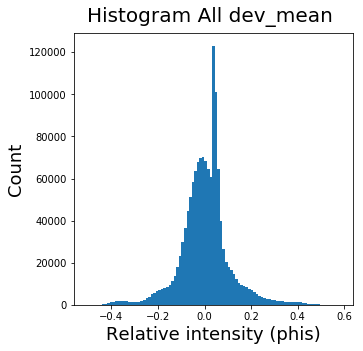

In [25]:

phi_range=np.linspace(pop_df_plus['dev_mean'].min(),pop_df_plus['dev_mean'].max(),100)
plt=plot_phi_hist(pop_df_plus['dev_mean'],phi_range,"All dev_mean")
plt.show()
plt.close()

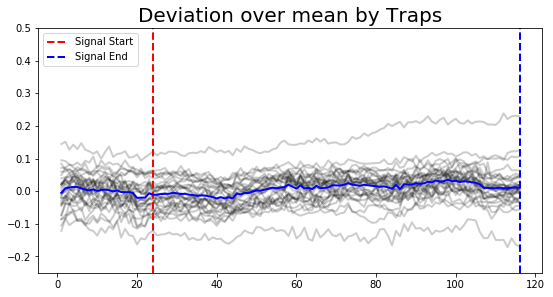

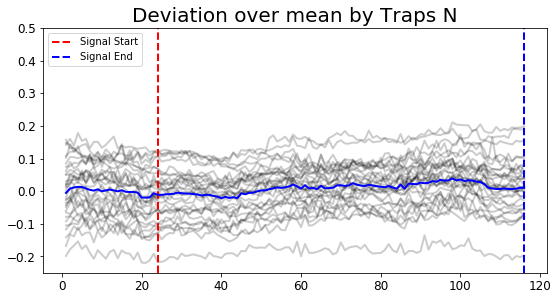

In [26]:
fig, ax = plt.subplots(ncols=1, figsize=(10,4.5))
fig.subplots_adjust(left=0.2) # or whatever

plt.rcParams.update({'font.size': 12})
pop_mean_dev=[]

ylim_up=1
ylim_down=-1

for frame in frames_list:
    this_frame_df=pop_df_plus[pop_df_plus['frame']==frame]
    this_frame_dev=this_frame_df['dev_mean'].mean()
    pop_mean_dev.append(this_frame_dev)

    
ax.plot(frames_list,pop_mean_dev,c='b',zorder=3)


#c=0
for trap in list_pos:
    trap_df=pop_df_plus[pop_df_plus['pos']==trap].copy()
    
    
    trap_frame_dev=[]
    for frame in frames_list:
        this_trap_frame_df=trap_df[trap_df['frame']==frame]
        this_trap_frame_dev=this_trap_frame_df['dev_mean'].mean()
        trap_frame_dev.append(this_trap_frame_dev)
    ax.plot(frames_list,trap_frame_dev,c='k',alpha=.2)

ax.set_ylim(top=.5,bottom=-.25)
ax.axvline(x=frame_signal_start,color='r',linestyle='dashed',label='Signal Start')
ax.axvline(x=frame_signal_end,color='b',linestyle='dashed',label='Signal End')
#ax.axvline(frame_signal_start,ylim_down,ylim_down,colors='k',linestyles='dashed', label='sds')
ax.set_title('Deviation over mean by Traps')
ax.legend(fontsize='small')
plt.show()
plt.close()
################################################################################################
fig, ax = plt.subplots(ncols=1, figsize=(10,4.5))
fig.subplots_adjust(left=0.2) # or whatever

plt.rcParams.update({'font.size': 12})

pop_mean_dev=[]

ylim_up=1
ylim_down=-1

for frame in frames_list:
    this_frame_df=pop_df_plus[pop_df_plus['frame']==frame]
    this_frame_dev=this_frame_df['dev_mean_N'].mean()
    pop_mean_dev.append(this_frame_dev)

    
ax.plot(frames_list,pop_mean_dev,c='b',zorder=3)


#c=0
for trap in list_pos:
    trap_df=pop_df_plus[pop_df_plus['pos']==trap].copy()
    
    
    trap_frame_dev=[]
    for frame in frames_list:
        this_trap_frame_df=trap_df[trap_df['frame']==frame]
        this_trap_frame_dev=this_trap_frame_df['dev_mean_N'].mean()
        trap_frame_dev.append(this_trap_frame_dev)
    ax.plot(frames_list,trap_frame_dev,c='k',alpha=.2)

ax.set_ylim(top=.5,bottom=-.25)
ax.axvline(x=frame_signal_start,color='r',linestyle='dashed',label='Signal Start')
ax.axvline(x=frame_signal_end,color='b',linestyle='dashed',label='Signal End')
#ax.axvline(frame_signal_start,ylim_down,ylim_down,colors='k',linestyles='dashed', label='sds')
ax.set_title('Deviation over mean by Traps N')
ax.legend(fontsize='small')
plt.show()
plt.close()

## Save RelF Data

In [27]:
export_list=[relIntensityPath,normDataPath,normDataNPath]
relInt_list=["relInt","phi_01","phi_N01"]
#relInt_list=["relInt","dev_mean","dev_mean_N"] ?
absInt_list=["absInt","rho_01","rho_N01"]


for pos in list_pos:
    df_pos=pop_df_plus[pop_df_plus['pos']==pos]
    for frame in frames_list:
        df_pos_frame=df_pos[df_pos["frame"]==frame]
        
        ids=df_pos_frame['id']
        imgsGFP=df_pos_frame['imgGFP']
        imgsDsRed=df_pos_frame['imgDsRed']
        this_pos=df_pos_frame['pos']
        this_frame=df_pos_frame['frame']
        this_label=df_pos_frame['label']
        this_GFP=df_pos_frame['GFP']
        this_DsRed=df_pos_frame['DsRed']
        
        framestr=str(frame).zfill(3)
        fileNamep="%s_%s_%s.txt"%(expeLabel,pos,framestr)
        
        for i in range(len(export_list)):
            exportPath=export_list[i]
            relInt_type=relInt_list[i]
            absInt_type=absInt_list[i]
            
            this_relInt=df_pos_frame[relInt_type]
            this_absInt=df_pos_frame[absInt_type]
            
            rows=zip(ids,imgsGFP,imgsDsRed,this_pos,this_frame,this_label,this_GFP,this_DsRed,this_relInt,this_absInt)
                 
            outPath=os.path.join(exportPath,pos)
            if not os.path.exists(outPath):
                os.mkdir(outPath)
            
            fileName=os.path.join(outPath,fileNamep)
            toFileData(fileName, rows)
            print(fileName)
        #print(x)

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy01/HT13-Sine-2hr_xy01_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy01/HT13-Sine-2hr_xy01_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy01/HT13-Sine-2hr_xy01_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy01/HT13-Sine-2hr_xy01_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy01/HT13-Sine-2hr_xy01_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy01/HT13-Sine-2hr_xy01_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy01/HT13-Sine-2hr_xy01_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy01/HT13-Sine-2hr_xy01_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy01/HT13-Sine-2hr_xy01_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy01/HT13-Sine-2hr_xy01_032.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy01/HT13-Sine-2hr_xy01_032.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy01/HT13-Sine-2hr_xy01_033.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy01/HT13-Sine-2hr_xy01_033.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy01/HT13-Sine-2hr_xy01_033.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy01/HT13-Sine-2hr_xy01_034.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy01/HT13-Sine-2hr_xy01_034.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy01/HT13-Sine-2hr_xy01_034.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy01/HT13-Sine-2hr_xy01_035.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy01/HT13-Sine-2hr_xy01_073.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy01/HT13-Sine-2hr_xy01_073.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy01/HT13-Sine-2hr_xy01_073.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy01/HT13-Sine-2hr_xy01_074.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy01/HT13-Sine-2hr_xy01_074.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy01/HT13-Sine-2hr_xy01_074.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy01/HT13-Sine-2hr_xy01_075.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy01/HT13-Sine-2hr_xy01_075.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy01/HT13-Sine-2hr_xy01_075.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy02/HT13-Sine-2hr_xy02_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy02/HT13-Sine-2hr_xy02_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy02/HT13-Sine-2hr_xy02_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy02/HT13-Sine-2hr_xy02_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy02/HT13-Sine-2hr_xy02_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy02/HT13-Sine-2hr_xy02_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy02/HT13-Sine-2hr_xy02_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy02/HT13-Sine-2hr_xy02_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy02/HT13-Sine-2hr_xy02_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy02/HT13-Sine-2hr_xy02_037.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy02/HT13-Sine-2hr_xy02_038.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy02/HT13-Sine-2hr_xy02_038.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy02/HT13-Sine-2hr_xy02_038.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy02/HT13-Sine-2hr_xy02_039.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy02/HT13-Sine-2hr_xy02_039.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy02/HT13-Sine-2hr_xy02_039.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy02/HT13-Sine-2hr_xy02_040.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy02/HT13-Sine-2hr_xy02_040.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/x

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy02/HT13-Sine-2hr_xy02_082.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy02/HT13-Sine-2hr_xy02_082.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy02/HT13-Sine-2hr_xy02_083.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy02/HT13-Sine-2hr_xy02_083.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy02/HT13-Sine-2hr_xy02_083.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy02/HT13-Sine-2hr_xy02_084.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy02/HT13-Sine-2hr_xy02_084.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy02/HT13-Sine-2hr_xy02_084.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy02/HT13-Sine-2hr_xy02_085.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy03/HT13-Sine-2hr_xy03_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy03/HT13-Sine-2hr_xy03_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy03/HT13-Sine-2hr_xy03_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy03/HT13-Sine-2hr_xy03_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy03/HT13-Sine-2hr_xy03_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy03/HT13-Sine-2hr_xy03_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy03/HT13-Sine-2hr_xy03_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy03/HT13-Sine-2hr_xy03_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy03/HT13-Sine-2hr_xy03_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy03/HT13-Sine-2hr_xy03_034.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy03/HT13-Sine-2hr_xy03_035.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy03/HT13-Sine-2hr_xy03_035.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy03/HT13-Sine-2hr_xy03_035.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy03/HT13-Sine-2hr_xy03_036.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy03/HT13-Sine-2hr_xy03_036.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy03/HT13-Sine-2hr_xy03_036.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy03/HT13-Sine-2hr_xy03_037.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy03/HT13-Sine-2hr_xy03_037.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/x

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy03/HT13-Sine-2hr_xy03_079.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy03/HT13-Sine-2hr_xy03_080.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy03/HT13-Sine-2hr_xy03_080.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy03/HT13-Sine-2hr_xy03_080.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy03/HT13-Sine-2hr_xy03_081.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy03/HT13-Sine-2hr_xy03_081.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy03/HT13-Sine-2hr_xy03_081.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy03/HT13-Sine-2hr_xy03_082.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy03/HT13-Sine-2hr_xy03_082.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/x

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy05/HT13-Sine-2hr_xy05_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy05/HT13-Sine-2hr_xy05_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy05/HT13-Sine-2hr_xy05_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy05/HT13-Sine-2hr_xy05_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy05/HT13-Sine-2hr_xy05_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy05/HT13-Sine-2hr_xy05_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy05/HT13-Sine-2hr_xy05_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy05/HT13-Sine-2hr_xy05_004.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy05/HT13-Sine-2hr_xy05_004.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/x

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy05/HT13-Sine-2hr_xy05_038.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy05/HT13-Sine-2hr_xy05_038.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy05/HT13-Sine-2hr_xy05_039.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy05/HT13-Sine-2hr_xy05_039.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy05/HT13-Sine-2hr_xy05_039.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy05/HT13-Sine-2hr_xy05_040.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy05/HT13-Sine-2hr_xy05_040.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy05/HT13-Sine-2hr_xy05_040.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy05/HT13-Sine-2hr_xy05_041.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy05/HT13-Sine-2hr_xy05_087.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy05/HT13-Sine-2hr_xy05_087.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy05/HT13-Sine-2hr_xy05_087.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy05/HT13-Sine-2hr_xy05_088.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy05/HT13-Sine-2hr_xy05_088.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy05/HT13-Sine-2hr_xy05_088.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy05/HT13-Sine-2hr_xy05_089.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy05/HT13-Sine-2hr_xy05_089.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy05/HT13-Sine-2hr_xy05_089.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy06/HT13-Sine-2hr_xy06_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy06/HT13-Sine-2hr_xy06_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy06/HT13-Sine-2hr_xy06_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy06/HT13-Sine-2hr_xy06_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy06/HT13-Sine-2hr_xy06_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy06/HT13-Sine-2hr_xy06_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy06/HT13-Sine-2hr_xy06_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy06/HT13-Sine-2hr_xy06_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy06/HT13-Sine-2hr_xy06_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy06/HT13-Sine-2hr_xy06_035.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy06/HT13-Sine-2hr_xy06_035.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy06/HT13-Sine-2hr_xy06_035.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy06/HT13-Sine-2hr_xy06_036.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy06/HT13-Sine-2hr_xy06_036.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy06/HT13-Sine-2hr_xy06_036.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy06/HT13-Sine-2hr_xy06_037.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy06/HT13-Sine-2hr_xy06_037.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy06/HT13-Sine-2hr_xy06_037.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy06/HT13-Sine-2hr_xy06_082.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy06/HT13-Sine-2hr_xy06_083.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy06/HT13-Sine-2hr_xy06_083.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy06/HT13-Sine-2hr_xy06_083.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy06/HT13-Sine-2hr_xy06_084.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy06/HT13-Sine-2hr_xy06_084.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy06/HT13-Sine-2hr_xy06_084.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy06/HT13-Sine-2hr_xy06_085.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy06/HT13-Sine-2hr_xy06_085.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/x

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy07/HT13-Sine-2hr_xy07_005.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy07/HT13-Sine-2hr_xy07_005.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy07/HT13-Sine-2hr_xy07_006.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy07/HT13-Sine-2hr_xy07_006.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy07/HT13-Sine-2hr_xy07_006.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy07/HT13-Sine-2hr_xy07_007.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy07/HT13-Sine-2hr_xy07_007.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy07/HT13-Sine-2hr_xy07_007.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy07/HT13-Sine-2hr_xy07_008.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy07/HT13-Sine-2hr_xy07_043.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy07/HT13-Sine-2hr_xy07_043.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy07/HT13-Sine-2hr_xy07_044.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy07/HT13-Sine-2hr_xy07_044.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy07/HT13-Sine-2hr_xy07_044.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy07/HT13-Sine-2hr_xy07_045.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy07/HT13-Sine-2hr_xy07_045.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy07/HT13-Sine-2hr_xy07_045.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy07/HT13-Sine-2hr_xy07_046.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy07/HT13-Sine-2hr_xy07_087.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy07/HT13-Sine-2hr_xy07_087.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy07/HT13-Sine-2hr_xy07_087.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy07/HT13-Sine-2hr_xy07_088.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy07/HT13-Sine-2hr_xy07_088.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy07/HT13-Sine-2hr_xy07_088.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy07/HT13-Sine-2hr_xy07_089.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy07/HT13-Sine-2hr_xy07_089.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy07/HT13-Sine-2hr_xy07_089.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy08/HT13-Sine-2hr_xy08_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy08/HT13-Sine-2hr_xy08_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy08/HT13-Sine-2hr_xy08_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy08/HT13-Sine-2hr_xy08_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy08/HT13-Sine-2hr_xy08_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy08/HT13-Sine-2hr_xy08_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy08/HT13-Sine-2hr_xy08_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy08/HT13-Sine-2hr_xy08_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy08/HT13-Sine-2hr_xy08_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy08/HT13-Sine-2hr_xy08_034.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy08/HT13-Sine-2hr_xy08_034.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy08/HT13-Sine-2hr_xy08_034.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy08/HT13-Sine-2hr_xy08_035.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy08/HT13-Sine-2hr_xy08_035.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy08/HT13-Sine-2hr_xy08_035.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy08/HT13-Sine-2hr_xy08_036.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy08/HT13-Sine-2hr_xy08_036.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy08/HT13-Sine-2hr_xy08_036.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy08/HT13-Sine-2hr_xy08_078.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy08/HT13-Sine-2hr_xy08_078.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy08/HT13-Sine-2hr_xy08_079.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy08/HT13-Sine-2hr_xy08_079.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy08/HT13-Sine-2hr_xy08_079.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy08/HT13-Sine-2hr_xy08_080.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy08/HT13-Sine-2hr_xy08_080.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy08/HT13-Sine-2hr_xy08_080.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy08/HT13-Sine-2hr_xy08_081.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy09/HT13-Sine-2hr_xy09_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy09/HT13-Sine-2hr_xy09_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy09/HT13-Sine-2hr_xy09_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy09/HT13-Sine-2hr_xy09_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy09/HT13-Sine-2hr_xy09_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy09/HT13-Sine-2hr_xy09_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy09/HT13-Sine-2hr_xy09_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy09/HT13-Sine-2hr_xy09_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy09/HT13-Sine-2hr_xy09_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy09/HT13-Sine-2hr_xy09_033.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy09/HT13-Sine-2hr_xy09_033.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy09/HT13-Sine-2hr_xy09_034.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy09/HT13-Sine-2hr_xy09_034.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy09/HT13-Sine-2hr_xy09_034.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy09/HT13-Sine-2hr_xy09_035.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy09/HT13-Sine-2hr_xy09_035.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy09/HT13-Sine-2hr_xy09_035.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy09/HT13-Sine-2hr_xy09_036.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy09/HT13-Sine-2hr_xy09_076.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy09/HT13-Sine-2hr_xy09_077.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy09/HT13-Sine-2hr_xy09_077.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy09/HT13-Sine-2hr_xy09_077.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy09/HT13-Sine-2hr_xy09_078.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy09/HT13-Sine-2hr_xy09_078.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy09/HT13-Sine-2hr_xy09_078.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy09/HT13-Sine-2hr_xy09_079.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy09/HT13-Sine-2hr_xy09_079.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/x

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy10/HT13-Sine-2hr_xy10_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy10/HT13-Sine-2hr_xy10_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy10/HT13-Sine-2hr_xy10_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy10/HT13-Sine-2hr_xy10_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy10/HT13-Sine-2hr_xy10_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy10/HT13-Sine-2hr_xy10_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy10/HT13-Sine-2hr_xy10_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy10/HT13-Sine-2hr_xy10_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy10/HT13-Sine-2hr_xy10_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy10/HT13-Sine-2hr_xy10_040.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy10/HT13-Sine-2hr_xy10_040.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy10/HT13-Sine-2hr_xy10_041.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy10/HT13-Sine-2hr_xy10_041.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy10/HT13-Sine-2hr_xy10_041.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy10/HT13-Sine-2hr_xy10_042.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy10/HT13-Sine-2hr_xy10_042.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy10/HT13-Sine-2hr_xy10_042.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy10/HT13-Sine-2hr_xy10_043.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy10/HT13-Sine-2hr_xy10_091.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy10/HT13-Sine-2hr_xy10_092.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy10/HT13-Sine-2hr_xy10_092.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy10/HT13-Sine-2hr_xy10_092.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy10/HT13-Sine-2hr_xy10_093.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy10/HT13-Sine-2hr_xy10_093.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy10/HT13-Sine-2hr_xy10_093.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy10/HT13-Sine-2hr_xy10_094.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy10/HT13-Sine-2hr_xy10_094.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/x

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy11/HT13-Sine-2hr_xy11_004.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy11/HT13-Sine-2hr_xy11_004.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy11/HT13-Sine-2hr_xy11_004.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy11/HT13-Sine-2hr_xy11_005.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy11/HT13-Sine-2hr_xy11_005.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy11/HT13-Sine-2hr_xy11_005.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy11/HT13-Sine-2hr_xy11_006.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy11/HT13-Sine-2hr_xy11_006.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy11/HT13-Sine-2hr_xy11_006.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy11/HT13-Sine-2hr_xy11_036.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy11/HT13-Sine-2hr_xy11_036.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy11/HT13-Sine-2hr_xy11_036.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy11/HT13-Sine-2hr_xy11_037.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy11/HT13-Sine-2hr_xy11_037.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy11/HT13-Sine-2hr_xy11_037.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy11/HT13-Sine-2hr_xy11_038.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy11/HT13-Sine-2hr_xy11_038.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy11/HT13-Sine-2hr_xy11_038.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy11/HT13-Sine-2hr_xy11_081.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy11/HT13-Sine-2hr_xy11_081.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy11/HT13-Sine-2hr_xy11_081.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy11/HT13-Sine-2hr_xy11_082.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy11/HT13-Sine-2hr_xy11_082.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy11/HT13-Sine-2hr_xy11_082.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy11/HT13-Sine-2hr_xy11_083.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy11/HT13-Sine-2hr_xy11_083.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy11/HT13-Sine-2hr_xy11_083.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy12/HT13-Sine-2hr_xy12_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy12/HT13-Sine-2hr_xy12_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy12/HT13-Sine-2hr_xy12_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy12/HT13-Sine-2hr_xy12_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy12/HT13-Sine-2hr_xy12_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy12/HT13-Sine-2hr_xy12_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy12/HT13-Sine-2hr_xy12_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy12/HT13-Sine-2hr_xy12_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy12/HT13-Sine-2hr_xy12_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy12/HT13-Sine-2hr_xy12_034.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy12/HT13-Sine-2hr_xy12_035.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy12/HT13-Sine-2hr_xy12_035.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy12/HT13-Sine-2hr_xy12_035.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy12/HT13-Sine-2hr_xy12_036.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy12/HT13-Sine-2hr_xy12_036.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy12/HT13-Sine-2hr_xy12_036.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy12/HT13-Sine-2hr_xy12_037.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy12/HT13-Sine-2hr_xy12_037.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/x

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy12/HT13-Sine-2hr_xy12_077.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy12/HT13-Sine-2hr_xy12_077.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy12/HT13-Sine-2hr_xy12_078.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy12/HT13-Sine-2hr_xy12_078.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy12/HT13-Sine-2hr_xy12_078.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy12/HT13-Sine-2hr_xy12_079.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy12/HT13-Sine-2hr_xy12_079.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy12/HT13-Sine-2hr_xy12_079.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy12/HT13-Sine-2hr_xy12_080.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy13/HT13-Sine-2hr_xy13_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy13/HT13-Sine-2hr_xy13_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy13/HT13-Sine-2hr_xy13_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy13/HT13-Sine-2hr_xy13_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy13/HT13-Sine-2hr_xy13_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy13/HT13-Sine-2hr_xy13_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy13/HT13-Sine-2hr_xy13_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy13/HT13-Sine-2hr_xy13_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy13/HT13-Sine-2hr_xy13_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy13/HT13-Sine-2hr_xy13_039.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy13/HT13-Sine-2hr_xy13_039.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy13/HT13-Sine-2hr_xy13_039.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy13/HT13-Sine-2hr_xy13_040.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy13/HT13-Sine-2hr_xy13_040.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy13/HT13-Sine-2hr_xy13_040.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy13/HT13-Sine-2hr_xy13_041.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy13/HT13-Sine-2hr_xy13_041.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy13/HT13-Sine-2hr_xy13_041.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy13/HT13-Sine-2hr_xy13_088.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy13/HT13-Sine-2hr_xy13_088.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy13/HT13-Sine-2hr_xy13_088.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy13/HT13-Sine-2hr_xy13_089.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy13/HT13-Sine-2hr_xy13_089.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy13/HT13-Sine-2hr_xy13_089.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy13/HT13-Sine-2hr_xy13_090.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy13/HT13-Sine-2hr_xy13_090.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy13/HT13-Sine-2hr_xy13_090.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy14/HT13-Sine-2hr_xy14_004.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy14/HT13-Sine-2hr_xy14_004.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy14/HT13-Sine-2hr_xy14_004.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy14/HT13-Sine-2hr_xy14_005.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy14/HT13-Sine-2hr_xy14_005.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy14/HT13-Sine-2hr_xy14_005.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy14/HT13-Sine-2hr_xy14_006.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy14/HT13-Sine-2hr_xy14_006.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy14/HT13-Sine-2hr_xy14_006.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy14/HT13-Sine-2hr_xy14_038.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy14/HT13-Sine-2hr_xy14_038.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy14/HT13-Sine-2hr_xy14_038.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy14/HT13-Sine-2hr_xy14_039.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy14/HT13-Sine-2hr_xy14_039.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy14/HT13-Sine-2hr_xy14_039.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy14/HT13-Sine-2hr_xy14_040.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy14/HT13-Sine-2hr_xy14_040.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy14/HT13-Sine-2hr_xy14_040.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy14/HT13-Sine-2hr_xy14_108.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy14/HT13-Sine-2hr_xy14_108.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy14/HT13-Sine-2hr_xy14_109.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy14/HT13-Sine-2hr_xy14_109.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy14/HT13-Sine-2hr_xy14_109.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy14/HT13-Sine-2hr_xy14_110.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy14/HT13-Sine-2hr_xy14_110.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy14/HT13-Sine-2hr_xy14_110.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy14/HT13-Sine-2hr_xy14_111.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy15/HT13-Sine-2hr_xy15_036.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy15/HT13-Sine-2hr_xy15_037.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy15/HT13-Sine-2hr_xy15_037.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy15/HT13-Sine-2hr_xy15_037.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy15/HT13-Sine-2hr_xy15_038.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy15/HT13-Sine-2hr_xy15_038.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy15/HT13-Sine-2hr_xy15_038.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy15/HT13-Sine-2hr_xy15_039.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy15/HT13-Sine-2hr_xy15_039.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/x

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy15/HT13-Sine-2hr_xy15_081.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy15/HT13-Sine-2hr_xy15_082.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy15/HT13-Sine-2hr_xy15_082.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy15/HT13-Sine-2hr_xy15_082.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy15/HT13-Sine-2hr_xy15_083.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy15/HT13-Sine-2hr_xy15_083.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy15/HT13-Sine-2hr_xy15_083.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy15/HT13-Sine-2hr_xy15_084.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy15/HT13-Sine-2hr_xy15_084.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/x

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy16/HT13-Sine-2hr_xy16_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy16/HT13-Sine-2hr_xy16_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy16/HT13-Sine-2hr_xy16_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy16/HT13-Sine-2hr_xy16_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy16/HT13-Sine-2hr_xy16_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy16/HT13-Sine-2hr_xy16_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy16/HT13-Sine-2hr_xy16_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy16/HT13-Sine-2hr_xy16_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy16/HT13-Sine-2hr_xy16_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy16/HT13-Sine-2hr_xy16_028.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy16/HT13-Sine-2hr_xy16_028.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy16/HT13-Sine-2hr_xy16_029.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy16/HT13-Sine-2hr_xy16_029.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy16/HT13-Sine-2hr_xy16_029.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy16/HT13-Sine-2hr_xy16_030.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy16/HT13-Sine-2hr_xy16_030.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy16/HT13-Sine-2hr_xy16_030.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy16/HT13-Sine-2hr_xy16_031.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy16/HT13-Sine-2hr_xy16_073.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy16/HT13-Sine-2hr_xy16_073.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy16/HT13-Sine-2hr_xy16_073.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy16/HT13-Sine-2hr_xy16_074.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy16/HT13-Sine-2hr_xy16_074.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy16/HT13-Sine-2hr_xy16_074.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy16/HT13-Sine-2hr_xy16_075.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy16/HT13-Sine-2hr_xy16_075.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy16/HT13-Sine-2hr_xy16_075.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy17/HT13-Sine-2hr_xy17_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy17/HT13-Sine-2hr_xy17_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy17/HT13-Sine-2hr_xy17_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy17/HT13-Sine-2hr_xy17_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy17/HT13-Sine-2hr_xy17_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy17/HT13-Sine-2hr_xy17_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy17/HT13-Sine-2hr_xy17_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy17/HT13-Sine-2hr_xy17_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy17/HT13-Sine-2hr_xy17_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy17/HT13-Sine-2hr_xy17_033.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy17/HT13-Sine-2hr_xy17_033.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy17/HT13-Sine-2hr_xy17_034.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy17/HT13-Sine-2hr_xy17_034.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy17/HT13-Sine-2hr_xy17_034.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy17/HT13-Sine-2hr_xy17_035.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy17/HT13-Sine-2hr_xy17_035.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy17/HT13-Sine-2hr_xy17_035.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy17/HT13-Sine-2hr_xy17_036.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy17/HT13-Sine-2hr_xy17_061.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy17/HT13-Sine-2hr_xy17_062.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy17/HT13-Sine-2hr_xy17_062.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy17/HT13-Sine-2hr_xy17_062.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy17/HT13-Sine-2hr_xy17_063.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy17/HT13-Sine-2hr_xy17_063.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy17/HT13-Sine-2hr_xy17_063.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy17/HT13-Sine-2hr_xy17_064.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy17/HT13-Sine-2hr_xy17_064.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/x

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy17/HT13-Sine-2hr_xy17_094.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy17/HT13-Sine-2hr_xy17_094.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy17/HT13-Sine-2hr_xy17_094.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy17/HT13-Sine-2hr_xy17_095.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy17/HT13-Sine-2hr_xy17_095.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy17/HT13-Sine-2hr_xy17_095.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy17/HT13-Sine-2hr_xy17_096.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy17/HT13-Sine-2hr_xy17_096.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy17/HT13-Sine-2hr_xy17_096.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy18/HT13-Sine-2hr_xy18_006.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy18/HT13-Sine-2hr_xy18_006.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy18/HT13-Sine-2hr_xy18_007.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy18/HT13-Sine-2hr_xy18_007.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy18/HT13-Sine-2hr_xy18_007.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy18/HT13-Sine-2hr_xy18_008.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy18/HT13-Sine-2hr_xy18_008.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy18/HT13-Sine-2hr_xy18_008.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy18/HT13-Sine-2hr_xy18_009.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy18/HT13-Sine-2hr_xy18_041.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy18/HT13-Sine-2hr_xy18_042.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy18/HT13-Sine-2hr_xy18_042.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy18/HT13-Sine-2hr_xy18_042.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy18/HT13-Sine-2hr_xy18_043.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy18/HT13-Sine-2hr_xy18_043.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy18/HT13-Sine-2hr_xy18_043.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy18/HT13-Sine-2hr_xy18_044.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy18/HT13-Sine-2hr_xy18_044.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/x

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy18/HT13-Sine-2hr_xy18_087.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy18/HT13-Sine-2hr_xy18_088.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy18/HT13-Sine-2hr_xy18_088.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy18/HT13-Sine-2hr_xy18_088.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy18/HT13-Sine-2hr_xy18_089.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy18/HT13-Sine-2hr_xy18_089.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy18/HT13-Sine-2hr_xy18_089.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy18/HT13-Sine-2hr_xy18_090.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy18/HT13-Sine-2hr_xy18_090.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/x

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy19/HT13-Sine-2hr_xy19_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy19/HT13-Sine-2hr_xy19_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy19/HT13-Sine-2hr_xy19_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy19/HT13-Sine-2hr_xy19_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy19/HT13-Sine-2hr_xy19_004.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy19/HT13-Sine-2hr_xy19_004.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy19/HT13-Sine-2hr_xy19_004.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy19/HT13-Sine-2hr_xy19_005.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy19/HT13-Sine-2hr_xy19_005.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/x

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy19/HT13-Sine-2hr_xy19_039.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy19/HT13-Sine-2hr_xy19_039.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy19/HT13-Sine-2hr_xy19_039.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy19/HT13-Sine-2hr_xy19_040.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy19/HT13-Sine-2hr_xy19_040.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy19/HT13-Sine-2hr_xy19_040.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy19/HT13-Sine-2hr_xy19_041.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy19/HT13-Sine-2hr_xy19_041.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy19/HT13-Sine-2hr_xy19_041.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy19/HT13-Sine-2hr_xy19_086.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy19/HT13-Sine-2hr_xy19_086.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy19/HT13-Sine-2hr_xy19_086.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy19/HT13-Sine-2hr_xy19_087.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy19/HT13-Sine-2hr_xy19_087.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy19/HT13-Sine-2hr_xy19_087.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy19/HT13-Sine-2hr_xy19_088.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy19/HT13-Sine-2hr_xy19_088.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy19/HT13-Sine-2hr_xy19_088.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy20/HT13-Sine-2hr_xy20_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy20/HT13-Sine-2hr_xy20_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy20/HT13-Sine-2hr_xy20_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy20/HT13-Sine-2hr_xy20_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy20/HT13-Sine-2hr_xy20_004.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy20/HT13-Sine-2hr_xy20_004.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy20/HT13-Sine-2hr_xy20_004.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy20/HT13-Sine-2hr_xy20_005.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy20/HT13-Sine-2hr_xy20_005.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/x

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy20/HT13-Sine-2hr_xy20_042.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy20/HT13-Sine-2hr_xy20_042.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy20/HT13-Sine-2hr_xy20_043.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy20/HT13-Sine-2hr_xy20_043.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy20/HT13-Sine-2hr_xy20_043.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy20/HT13-Sine-2hr_xy20_044.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy20/HT13-Sine-2hr_xy20_044.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy20/HT13-Sine-2hr_xy20_044.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy20/HT13-Sine-2hr_xy20_045.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy20/HT13-Sine-2hr_xy20_102.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy20/HT13-Sine-2hr_xy20_102.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy20/HT13-Sine-2hr_xy20_102.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy20/HT13-Sine-2hr_xy20_103.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy20/HT13-Sine-2hr_xy20_103.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy20/HT13-Sine-2hr_xy20_103.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy20/HT13-Sine-2hr_xy20_104.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy20/HT13-Sine-2hr_xy20_104.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy20/HT13-Sine-2hr_xy20_104.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy21/HT13-Sine-2hr_xy21_016.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy21/HT13-Sine-2hr_xy21_016.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy21/HT13-Sine-2hr_xy21_016.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy21/HT13-Sine-2hr_xy21_017.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy21/HT13-Sine-2hr_xy21_017.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy21/HT13-Sine-2hr_xy21_017.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy21/HT13-Sine-2hr_xy21_018.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy21/HT13-Sine-2hr_xy21_018.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy21/HT13-Sine-2hr_xy21_018.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy21/HT13-Sine-2hr_xy21_056.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy21/HT13-Sine-2hr_xy21_056.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy21/HT13-Sine-2hr_xy21_056.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy21/HT13-Sine-2hr_xy21_057.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy21/HT13-Sine-2hr_xy21_057.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy21/HT13-Sine-2hr_xy21_057.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy21/HT13-Sine-2hr_xy21_058.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy21/HT13-Sine-2hr_xy21_058.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy21/HT13-Sine-2hr_xy21_058.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy22/HT13-Sine-2hr_xy22_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy22/HT13-Sine-2hr_xy22_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy22/HT13-Sine-2hr_xy22_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy22/HT13-Sine-2hr_xy22_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy22/HT13-Sine-2hr_xy22_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy22/HT13-Sine-2hr_xy22_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy22/HT13-Sine-2hr_xy22_004.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy22/HT13-Sine-2hr_xy22_004.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy22/HT13-Sine-2hr_xy22_004.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy22/HT13-Sine-2hr_xy22_034.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy22/HT13-Sine-2hr_xy22_035.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy22/HT13-Sine-2hr_xy22_035.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy22/HT13-Sine-2hr_xy22_035.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy22/HT13-Sine-2hr_xy22_036.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy22/HT13-Sine-2hr_xy22_036.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy22/HT13-Sine-2hr_xy22_036.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy22/HT13-Sine-2hr_xy22_037.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy22/HT13-Sine-2hr_xy22_037.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/x

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy22/HT13-Sine-2hr_xy22_078.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy22/HT13-Sine-2hr_xy22_079.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy22/HT13-Sine-2hr_xy22_079.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy22/HT13-Sine-2hr_xy22_079.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy22/HT13-Sine-2hr_xy22_080.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy22/HT13-Sine-2hr_xy22_080.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy22/HT13-Sine-2hr_xy22_080.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy22/HT13-Sine-2hr_xy22_081.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy22/HT13-Sine-2hr_xy22_081.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/x

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy23/HT13-Sine-2hr_xy23_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy23/HT13-Sine-2hr_xy23_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy23/HT13-Sine-2hr_xy23_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy23/HT13-Sine-2hr_xy23_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy23/HT13-Sine-2hr_xy23_004.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy23/HT13-Sine-2hr_xy23_004.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy23/HT13-Sine-2hr_xy23_004.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy23/HT13-Sine-2hr_xy23_005.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy23/HT13-Sine-2hr_xy23_005.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/x

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy23/HT13-Sine-2hr_xy23_036.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy23/HT13-Sine-2hr_xy23_037.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy23/HT13-Sine-2hr_xy23_037.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy23/HT13-Sine-2hr_xy23_037.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy23/HT13-Sine-2hr_xy23_038.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy23/HT13-Sine-2hr_xy23_038.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy23/HT13-Sine-2hr_xy23_038.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy23/HT13-Sine-2hr_xy23_039.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy23/HT13-Sine-2hr_xy23_039.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/x

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy23/HT13-Sine-2hr_xy23_081.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy23/HT13-Sine-2hr_xy23_081.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy23/HT13-Sine-2hr_xy23_081.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy23/HT13-Sine-2hr_xy23_082.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy23/HT13-Sine-2hr_xy23_082.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy23/HT13-Sine-2hr_xy23_082.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy23/HT13-Sine-2hr_xy23_083.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy23/HT13-Sine-2hr_xy23_083.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy23/HT13-Sine-2hr_xy23_083.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy24/HT13-Sine-2hr_xy24_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy24/HT13-Sine-2hr_xy24_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy24/HT13-Sine-2hr_xy24_001.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy24/HT13-Sine-2hr_xy24_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy24/HT13-Sine-2hr_xy24_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy24/HT13-Sine-2hr_xy24_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy24/HT13-Sine-2hr_xy24_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy24/HT13-Sine-2hr_xy24_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy24/HT13-Sine-2hr_xy24_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy24/HT13-Sine-2hr_xy24_037.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy24/HT13-Sine-2hr_xy24_037.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy24/HT13-Sine-2hr_xy24_037.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy24/HT13-Sine-2hr_xy24_038.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy24/HT13-Sine-2hr_xy24_038.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy24/HT13-Sine-2hr_xy24_038.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy24/HT13-Sine-2hr_xy24_039.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy24/HT13-Sine-2hr_xy24_039.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy24/HT13-Sine-2hr_xy24_039.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy24/HT13-Sine-2hr_xy24_089.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy24/HT13-Sine-2hr_xy24_089.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy24/HT13-Sine-2hr_xy24_089.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy24/HT13-Sine-2hr_xy24_090.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy24/HT13-Sine-2hr_xy24_090.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy24/HT13-Sine-2hr_xy24_090.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy24/HT13-Sine-2hr_xy24_091.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy24/HT13-Sine-2hr_xy24_091.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy24/HT13-Sine-2hr_xy24_091.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy25/HT13-Sine-2hr_xy25_008.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy25/HT13-Sine-2hr_xy25_008.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy25/HT13-Sine-2hr_xy25_008.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy25/HT13-Sine-2hr_xy25_009.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy25/HT13-Sine-2hr_xy25_009.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy25/HT13-Sine-2hr_xy25_009.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy25/HT13-Sine-2hr_xy25_010.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy25/HT13-Sine-2hr_xy25_010.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy25/HT13-Sine-2hr_xy25_010.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy25/HT13-Sine-2hr_xy25_048.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy25/HT13-Sine-2hr_xy25_049.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy25/HT13-Sine-2hr_xy25_049.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy25/HT13-Sine-2hr_xy25_049.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy25/HT13-Sine-2hr_xy25_050.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy25/HT13-Sine-2hr_xy25_050.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy25/HT13-Sine-2hr_xy25_050.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy25/HT13-Sine-2hr_xy25_051.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy25/HT13-Sine-2hr_xy25_051.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/x

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy25/HT13-Sine-2hr_xy25_093.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy25/HT13-Sine-2hr_xy25_093.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy25/HT13-Sine-2hr_xy25_093.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy25/HT13-Sine-2hr_xy25_094.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy25/HT13-Sine-2hr_xy25_094.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy25/HT13-Sine-2hr_xy25_094.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy25/HT13-Sine-2hr_xy25_095.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy25/HT13-Sine-2hr_xy25_095.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy25/HT13-Sine-2hr_xy25_095.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy26/HT13-Sine-2hr_xy26_005.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy26/HT13-Sine-2hr_xy26_005.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy26/HT13-Sine-2hr_xy26_006.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy26/HT13-Sine-2hr_xy26_006.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy26/HT13-Sine-2hr_xy26_006.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy26/HT13-Sine-2hr_xy26_007.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy26/HT13-Sine-2hr_xy26_007.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy26/HT13-Sine-2hr_xy26_007.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy26/HT13-Sine-2hr_xy26_008.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy26/HT13-Sine-2hr_xy26_044.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy26/HT13-Sine-2hr_xy26_044.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy26/HT13-Sine-2hr_xy26_044.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy26/HT13-Sine-2hr_xy26_045.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy26/HT13-Sine-2hr_xy26_045.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy26/HT13-Sine-2hr_xy26_045.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy26/HT13-Sine-2hr_xy26_046.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy26/HT13-Sine-2hr_xy26_046.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy26/HT13-Sine-2hr_xy26_046.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy26/HT13-Sine-2hr_xy26_091.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy26/HT13-Sine-2hr_xy26_091.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy26/HT13-Sine-2hr_xy26_091.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy26/HT13-Sine-2hr_xy26_092.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy26/HT13-Sine-2hr_xy26_092.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy26/HT13-Sine-2hr_xy26_092.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy26/HT13-Sine-2hr_xy26_093.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy26/HT13-Sine-2hr_xy26_093.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy26/HT13-Sine-2hr_xy26_093.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy27/HT13-Sine-2hr_xy27_005.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy27/HT13-Sine-2hr_xy27_005.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy27/HT13-Sine-2hr_xy27_005.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy27/HT13-Sine-2hr_xy27_006.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy27/HT13-Sine-2hr_xy27_006.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy27/HT13-Sine-2hr_xy27_006.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy27/HT13-Sine-2hr_xy27_007.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy27/HT13-Sine-2hr_xy27_007.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy27/HT13-Sine-2hr_xy27_007.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy27/HT13-Sine-2hr_xy27_041.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy27/HT13-Sine-2hr_xy27_041.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy27/HT13-Sine-2hr_xy27_042.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy27/HT13-Sine-2hr_xy27_042.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy27/HT13-Sine-2hr_xy27_042.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy27/HT13-Sine-2hr_xy27_043.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy27/HT13-Sine-2hr_xy27_043.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy27/HT13-Sine-2hr_xy27_043.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy27/HT13-Sine-2hr_xy27_044.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy27/HT13-Sine-2hr_xy27_091.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy27/HT13-Sine-2hr_xy27_091.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy27/HT13-Sine-2hr_xy27_091.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy27/HT13-Sine-2hr_xy27_092.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy27/HT13-Sine-2hr_xy27_092.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy27/HT13-Sine-2hr_xy27_092.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy27/HT13-Sine-2hr_xy27_093.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy27/HT13-Sine-2hr_xy27_093.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy27/HT13-Sine-2hr_xy27_093.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy28/HT13-Sine-2hr_xy28_009.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy28/HT13-Sine-2hr_xy28_009.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy28/HT13-Sine-2hr_xy28_010.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy28/HT13-Sine-2hr_xy28_010.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy28/HT13-Sine-2hr_xy28_010.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy28/HT13-Sine-2hr_xy28_011.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy28/HT13-Sine-2hr_xy28_011.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy28/HT13-Sine-2hr_xy28_011.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy28/HT13-Sine-2hr_xy28_012.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy28/HT13-Sine-2hr_xy28_049.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy28/HT13-Sine-2hr_xy28_049.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy28/HT13-Sine-2hr_xy28_049.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy28/HT13-Sine-2hr_xy28_050.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy28/HT13-Sine-2hr_xy28_050.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy28/HT13-Sine-2hr_xy28_050.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy28/HT13-Sine-2hr_xy28_051.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy28/HT13-Sine-2hr_xy28_051.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy28/HT13-Sine-2hr_xy28_051.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy28/HT13-Sine-2hr_xy28_099.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy28/HT13-Sine-2hr_xy28_099.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy28/HT13-Sine-2hr_xy28_100.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy28/HT13-Sine-2hr_xy28_100.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy28/HT13-Sine-2hr_xy28_100.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy28/HT13-Sine-2hr_xy28_101.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy28/HT13-Sine-2hr_xy28_101.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy28/HT13-Sine-2hr_xy28_101.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy28/HT13-Sine-2hr_xy28_102.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy29/HT13-Sine-2hr_xy29_044.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy29/HT13-Sine-2hr_xy29_044.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy29/HT13-Sine-2hr_xy29_044.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy29/HT13-Sine-2hr_xy29_045.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy29/HT13-Sine-2hr_xy29_045.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy29/HT13-Sine-2hr_xy29_045.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy29/HT13-Sine-2hr_xy29_046.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy29/HT13-Sine-2hr_xy29_046.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy29/HT13-Sine-2hr_xy29_046.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy29/HT13-Sine-2hr_xy29_087.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy29/HT13-Sine-2hr_xy29_088.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy29/HT13-Sine-2hr_xy29_088.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy29/HT13-Sine-2hr_xy29_088.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy29/HT13-Sine-2hr_xy29_089.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy29/HT13-Sine-2hr_xy29_089.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy29/HT13-Sine-2hr_xy29_089.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy29/HT13-Sine-2hr_xy29_090.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy29/HT13-Sine-2hr_xy29_090.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/x

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy30/HT13-Sine-2hr_xy30_002.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy30/HT13-Sine-2hr_xy30_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy30/HT13-Sine-2hr_xy30_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy30/HT13-Sine-2hr_xy30_003.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy30/HT13-Sine-2hr_xy30_004.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy30/HT13-Sine-2hr_xy30_004.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy30/HT13-Sine-2hr_xy30_004.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy30/HT13-Sine-2hr_xy30_005.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy30/HT13-Sine-2hr_xy30_005.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/x

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy30/HT13-Sine-2hr_xy30_038.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy30/HT13-Sine-2hr_xy30_038.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy30/HT13-Sine-2hr_xy30_039.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy30/HT13-Sine-2hr_xy30_039.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy30/HT13-Sine-2hr_xy30_039.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy30/HT13-Sine-2hr_xy30_040.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy30/HT13-Sine-2hr_xy30_040.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy30/HT13-Sine-2hr_xy30_040.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy30/HT13-Sine-2hr_xy30_041.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy30/HT13-Sine-2hr_xy30_087.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy30/HT13-Sine-2hr_xy30_087.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy30/HT13-Sine-2hr_xy30_087.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy30/HT13-Sine-2hr_xy30_088.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy30/HT13-Sine-2hr_xy30_088.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy30/HT13-Sine-2hr_xy30_088.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy30/HT13-Sine-2hr_xy30_089.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy30/HT13-Sine-2hr_xy30_089.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy30/HT13-Sine-2hr_xy30_089.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy31/HT13-Sine-2hr_xy31_004.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy31/HT13-Sine-2hr_xy31_004.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy31/HT13-Sine-2hr_xy31_005.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy31/HT13-Sine-2hr_xy31_005.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy31/HT13-Sine-2hr_xy31_005.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy31/HT13-Sine-2hr_xy31_006.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy31/HT13-Sine-2hr_xy31_006.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy31/HT13-Sine-2hr_xy31_006.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy31/HT13-Sine-2hr_xy31_007.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy31/HT13-Sine-2hr_xy31_042.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy31/HT13-Sine-2hr_xy31_042.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy31/HT13-Sine-2hr_xy31_042.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy31/HT13-Sine-2hr_xy31_043.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy31/HT13-Sine-2hr_xy31_043.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy31/HT13-Sine-2hr_xy31_043.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy31/HT13-Sine-2hr_xy31_044.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy31/HT13-Sine-2hr_xy31_044.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy31/HT13-Sine-2hr_xy31_044.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy31/HT13-Sine-2hr_xy31_092.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy31/HT13-Sine-2hr_xy31_092.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy31/HT13-Sine-2hr_xy31_092.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy31/HT13-Sine-2hr_xy31_093.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy31/HT13-Sine-2hr_xy31_093.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy31/HT13-Sine-2hr_xy31_093.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy31/HT13-Sine-2hr_xy31_094.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy31/HT13-Sine-2hr_xy31_094.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy31/HT13-Sine-2hr_xy31_094.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy32/HT13-Sine-2hr_xy32_011.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy32/HT13-Sine-2hr_xy32_012.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy32/HT13-Sine-2hr_xy32_012.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy32/HT13-Sine-2hr_xy32_012.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy32/HT13-Sine-2hr_xy32_013.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy32/HT13-Sine-2hr_xy32_013.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy32/HT13-Sine-2hr_xy32_013.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy32/HT13-Sine-2hr_xy32_014.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy32/HT13-Sine-2hr_xy32_014.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/x

/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy32/HT13-Sine-2hr_xy32_065.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy32/HT13-Sine-2hr_xy32_065.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy32/HT13-Sine-2hr_xy32_065.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy32/HT13-Sine-2hr_xy32_066.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy32/HT13-Sine-2hr_xy32_066.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy32/HT13-Sine-2hr_xy32_066.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeIntensity/xy32/HT13-Sine-2hr_xy32_067.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normData/xy32/HT13-Sine-2hr_xy32_067.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/normDataN/xy32/HT13-Sine-2hr_xy32_067.txt
/home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/data/relativeInt

## Time-series normalization

(before the antibiotic is introduced)

In [28]:
nodrug_t=range(t_experiment_start,t_signal_start)
nodrug_frame=range(frame_experiment_start,frame_signal_start)
print("No-drug interval (frames): %s"%nodrug_frame)
print("No-drug interval (mins): %s"%nodrug_t)

filter_t=filterFrames(data_frame, nodrug_frame)
meanGFP= np.mean(data_GFP[filter_t])
meanDsRed= np.mean(data_DsRed[filter_t])
print("meanGFP=%s\tmeanDsRed=%s"%(meanGFP, meanDsRed))

meanPhi= np.mean(data_phi[filter_t])
meanRho= np.mean(data_rho[filter_t])
print("meanPhi=%s\tmeanRho=%s"%(meanPhi, meanRho))

frames=range(int(frame_experiment_start),int(frame_experiment_end+1))
filter_t=filterFrames(data_frame, frames)

minGFP= np.min(data_GFP[filter_t])
minDsRed= np.min(data_DsRed[filter_t])
print("minGFP:%s\t\tminDsRed:%s"%(minGFP, minDsRed))

maxGFP=np.max(data_GFP[filter_t])
maxDsRed= np.max(data_DsRed[filter_t])
print("maxGFP:%s\t\tmaxDsRed:%s"%(maxGFP, maxDsRed))



# minPhi= np.min(data_phi[filter_t])
# minRho= np.min(data_rho[filter_t])
# print("minPhi:%s\t\tminRho:%s"%(minPhi, minRho))

# maxPhi= np.max(data_phi[filter_t])
# maxRho= np.max(data_rho[filter_t])
# print("maxPhi:%s\t\tmaxRho:%s"%(maxPhi, maxRho))




No-drug interval (frames): range(1, 24)
No-drug interval (mins): range(0, 115)
meanGFP=427.4606441873854	meanDsRed=186.80324705312745
meanPhi=0.425488667992264	meanRho=468.9102788268903
minGFP:104.918		minDsRed:101.751
maxGFP:1555.69		maxDsRed:925.103


## Relative frequencies as a function of time

Deviation over the mean for each channel



### Using Data Frame

In [29]:
meanPhi=pop_df_plus_presignal['phi_01'].mean()
meanPhi_N=pop_df_plus_presignal["phi_N01"].mean()



phis=pop_df_plus['dev_mean'].copy()
phis_N=pop_df_plus['dev_mean_N'].copy()

meanPhi=meanPhi/np.pi
meanPhi_N=meanPhi_N/np.pi
#phis=phis/np.pi

data_phi=np.asarray(phis)
data_phi_N=np.asarray(phis_N)



bin_num=41
bin_max =.75
bin_min=-.75
bin_size = (bin_max-bin_min)/bin_num; 



N = (bin_max-bin_min)/bin_size; Nplus1 = N + 1
bin_list = np.linspace(bin_min, bin_max, Nplus1)

total_cells=0
x_devmeans=[]
y_devmeans=[]

freqs=[]
freqs_phi=[]
freqs_phi_N=[]

dist_relfreqs=[]
dist_relfreqs_phi=[]
dist_relfreqs_phi_N=[]

html_table=[]

frames=range(int(frame_experiment_start),int(frame_experiment_end+1))

for t, frame in enumerate(frames):
    filter_t=filterFrames(data_frame, [frame])
    
    this_GFP=data_GFP[filter_t]
    this_DsRed=data_DsRed[filter_t]
    this_phi=data_phi[filter_t]
    this_phi_N=data_phi_N[filter_t]
    
    relF=[((r)/(meanDsRed))-((g)/(meanGFP)) for g, r in zip(this_GFP, this_DsRed)]
    relF_phi=this_phi
    relF_phi_N=this_phi_N

    this_xmean= np.mean(this_GFP)/meanGFP
    this_ymean= np.mean(this_DsRed)/meanDsRed
    this_freq=(this_ymean)-(this_xmean)
    
    
    this_freq_phi=np.mean(this_phi)
    this_freq_phi_N=np.mean(this_phi_N)
    
    this_cells=this_GFP.size
    total_cells=total_cells+this_cells
    
    ####  Fix not adquired data     
    if(frame>=notcaptured_start and frame<=notcaptured_end):
        this_xmean= meanGFP
        this_ymean= meanDsRed
        #this_freq=(this_ymean)-(this_xmean)
        this_freq=0
        relF=[0 for g, r in zip(this_GFP, this_DsRed)]
    
    #print("t:%s\tMeanGFP:%.1f (%.3f)\tMeanDsRed:%.1f (%.3f)\tRelFreq:%.4f\tRelFreqP:%.4f\tnumCells:%s"%(times[t],np.mean(this_GFP),this_xmean,np.mean(this_DsRed),this_ymean,this_freq,this_freq_phi, this_cells))
    
    x_devmeans.append(this_xmean)
    y_devmeans.append(this_ymean)
    
    freqs.append(this_freq)
    freqs_phi.append(this_freq_phi)
    freqs_phi_N.append(this_freq_phi_N)
    
    html_row=("%s,%.1f,%.3f,%.1f,%.3f,%.4f,%.4f,%.4f,%s"%(times[t],np.mean(this_GFP),this_xmean,np.mean(this_DsRed),this_ymean,this_freq,this_freq_phi,this_freq_phi_N,this_cells)).split(",")
    html_table.append(html_row)
    
    #Compute frequency distribution
    weights = np.ones_like(relF)/len(relF)
    n, bins, patches = plt.hist(relF, bins=bin_list,  facecolor='black', alpha=1, weights=weights,normed=1) #
    #plt.show()
    plt.close()
    dist_relfreqs.append(n.tolist())
    
    weights = np.ones_like(relF_phi)/len(relF_phi)
    n, bins, patches = plt.hist(relF_phi, bins=bin_list,  facecolor='black', alpha=1, weights=weights,normed=1) #
    #plt.show()
    plt.close()
    dist_relfreqs_phi.append(n.tolist())
    
    weights = np.ones_like(relF_phi_N)/len(relF_phi_N)
    n, bins, patches = plt.hist(relF_phi_N, bins=bin_list,  facecolor='black', alpha=1, weights=weights,normed=1) #
    #plt.show()
    plt.close()
    dist_relfreqs_phi_N.append(n.tolist())

    
    
    
dist_relfreqs=np.array([np.array(xi) for xi in dist_relfreqs])
dist_relfreqs_phi=np.array([np.array(xi) for xi in dist_relfreqs_phi])
dist_relfreqs_phi_N=np.array([np.array(xi) for xi in dist_relfreqs_phi_N])




/home/esb/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/esb/.anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [ ]:
### Fix not captured data

dist_relfreqs2=dist_relfreqs.copy()
for i, this_f in enumerate(dist_relfreqs2):
    if(i>=notcaptured_start-1 and i<=notcaptured_end-1):
        for j,x in enumerate(this_f):
            this_f[j]=0.
        dist_relfreqs2[i]=this_f.copy()
        print(i,this_f,this2)


        
dist_relfreqs=dist_relfreqs2.copy()
y_min=0
y_max=1.1*np.max(dist_relfreqs)
y_max


In [ ]:

display(HTML(
    '<table><tr><td>time (min)</td><td>Mean(GFP)</td><td>Mean(GFP)/Baseline(GFP)</td><td>Mean(DsRed)</td><td>Mean(DsRed)/Baseline(DsRed)</td><td width="15%">Relative Frequency</td><td width="15%">Relative Frequency phi</td><td>Number of Cells</td></tr><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
        '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in html_table)
    )
))

## Deviation over the mean


Aggregate cells from all traps.  
Normalize time-series with respect to population-level mean.


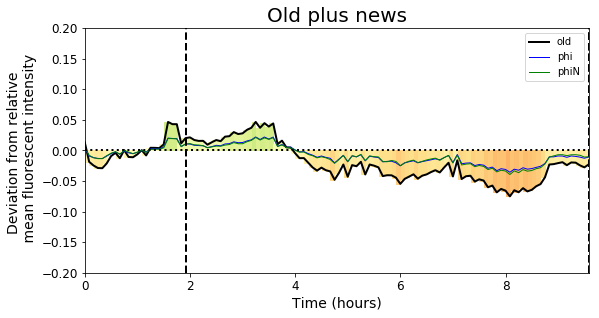


Saved as /home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/figures/HT13-Sine-2hr_time_v_intensity.tif


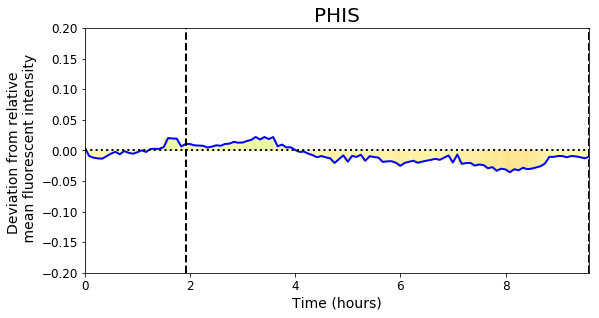


Saved as /home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/figures/HT13-Sine-2hr_time_v_intensity.tif


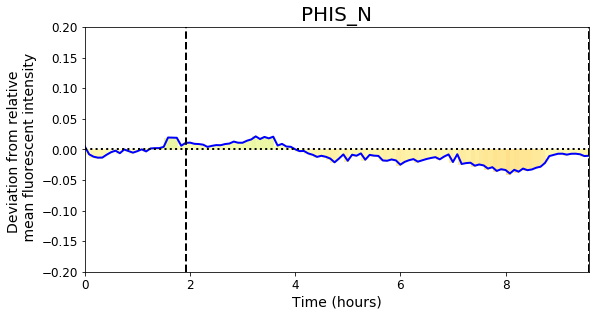


Saved as /home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/figures/HT13-Sine-2hr_time_v_intensity.tif


In [30]:
interv=1
Ncolors=100

ymin=-.2
ymax=.2

##########################################################33
#Plot figure
fig, ax = plt.subplots(ncols=1, figsize=(10, 4.5))
fig.subplots_adjust(left=0.2) # or whatever

plt.rcParams.update({'font.size': 12})

dx=(frames[1]-frames[0])*frame2min
xdev=[(this_x-frame2min*interv/2) for this_x in times[:]]
ydev=[-this_y for this_y in freqs[:]]
ydev_phi=[-this_y for this_y in freqs_phi[:]]
ydev_phi_N=[-this_y for this_y in freqs_phi_N[:]]

cmap = cm.get_cmap("RdYlGn", Ncolors+1) #generate a jet map with 10 values 
cmap_vals = cmap(np.arange(Ncolors+1))


dy=(ymax+np.abs(ymin))/Ncolors
ls=np.arange(ymin,ymax+dy,dy)
colors=[]
for thisy in ydev:
    thisColor=cmap_vals[find_nearest(ls,thisy),:]
    colors.append(thisColor)

ax.bar(xdev,ydev,0.9*interv*frame2min, color = colors, edgecolor =  colors)
ax.plot(times,ydev,color='black', linewidth=2,label="old")
ax.plot(times,ydev_phi,color='blue', linewidth=1,label="phi")
ax.plot(times,ydev_phi_N,color='green', linewidth=1,label="phiN")

ax.plot([0,t_experiment_end],[0,0], 'k:')

ix=range(t_experiment_start*frame2min,t_experiment_end*frame2min,120)
lx= [int(index/60) for index in ix]
ax.set_xticks(ix)
ax.set_xticklabels(lx)

#Annotates signal
ax.axvline(t_signal_start, color='k', linestyle='--')
ax.axvline(t_signal_end, color='k', linestyle='--')
ax.axvline(t_experiment_end, color='k', linestyle='--')
ax.axis([t_experiment_start,t_experiment_end,ymin,ymax])

#ax.set_axis_bgcolor('white')
ax.set_xlabel('Time (hours)',fontsize=14)
ax.set_ylabel('Deviation from relative \n mean fluorescent intensity',fontsize=14)
ax.set_title(label="Old plus news")
ax.legend(fontsize='small')
figName='%s%s_time_v_intensity.tif'%(figurePath, expeLabel)
plt.savefig(figName)    
plt.show()
print("\nSaved as %s"%figName)


###############################################################################################

#Plot figure
fig, ax = plt.subplots(ncols=1, figsize=(10, 4.5))
fig.subplots_adjust(left=0.2) # or whatever

plt.rcParams.update({'font.size': 12})

dx=(frames[1]-frames[0])*frame2min
xdev=[(this_x-frame2min*interv/2) for this_x in times[:]]

ydev_phi=[-this_y for this_y in freqs_phi[:]]

cmap = cm.get_cmap("RdYlGn", Ncolors+1) #generate a jet map with 10 values 
cmap_vals = cmap(np.arange(Ncolors+1))


dy=(ymax+np.abs(ymin))/Ncolors
ls=np.arange(ymin,ymax+dy,dy)
colors=[]
for thisy in ydev_phi:
    thisColor=cmap_vals[find_nearest(ls,thisy),:]
    colors.append(thisColor)

ax.bar(xdev,ydev_phi,0.9*interv*frame2min, color = colors, edgecolor =  colors)

ax.plot(times,ydev_phi,color='blue', linewidth=2)

ax.plot([0,t_experiment_end],[0,0], 'k:')

ix=range(t_experiment_start*frame2min,t_experiment_end*frame2min,120)
lx= [int(index/60) for index in ix]
ax.set_xticks(ix)
ax.set_xticklabels(lx)

#Annotates signal
ax.axvline(t_signal_start, color='k', linestyle='--')
ax.axvline(t_signal_end, color='k', linestyle='--')
ax.axvline(t_experiment_end, color='k', linestyle='--')
ax.axis([t_experiment_start,t_experiment_end,ymin,ymax])

#ax.set_axis_bgcolor('white')
ax.set_xlabel('Time (hours)',fontsize=14)
ax.set_ylabel('Deviation from relative \n mean fluorescent intensity',fontsize=14)
ax.set_title(label="PHIS")

figName='%s%s_time_v_intensity.tif'%(figurePath, expeLabel)
#plt.savefig(figName)    
plt.show()
plt.close()
print("\nSaved as %s"%figName)
######################################################################
fig, ax = plt.subplots(ncols=1, figsize=(10, 4.5))
fig.subplots_adjust(left=0.2) # or whatever

plt.rcParams.update({'font.size': 12})

dx=(frames[1]-frames[0])*frame2min
xdev=[(this_x-frame2min*interv/2) for this_x in times[:]]

ydev_phi=[-this_y for this_y in freqs_phi_N[:]]

cmap = cm.get_cmap("RdYlGn", Ncolors+1) #generate a jet map with 10 values 
cmap_vals = cmap(np.arange(Ncolors+1))


dy=(ymax+np.abs(ymin))/Ncolors
ls=np.arange(ymin,ymax+dy,dy)
colors=[]
for thisy in ydev_phi:
    thisColor=cmap_vals[find_nearest(ls,thisy),:]
    colors.append(thisColor)

ax.bar(xdev,ydev_phi,0.9*interv*frame2min, color = colors, edgecolor =  colors)

ax.plot(times,ydev_phi,color='blue', linewidth=2)

ax.plot([0,t_experiment_end],[0,0], 'k:')

ix=range(t_experiment_start*frame2min,t_experiment_end*frame2min,120)
lx= [int(index/60) for index in ix]
ax.set_xticks(ix)
ax.set_xticklabels(lx)

#Annotates signal
ax.axvline(t_signal_start, color='k', linestyle='--')
ax.axvline(t_signal_end, color='k', linestyle='--')
ax.axvline(t_experiment_end, color='k', linestyle='--')
ax.axis([t_experiment_start,t_experiment_end,ymin,ymax])

#ax.set_axis_bgcolor('white')
ax.set_xlabel('Time (hours)',fontsize=14)
ax.set_ylabel('Deviation from relative \n mean fluorescent intensity',fontsize=14)
ax.set_title(label="PHIS_N")    
figName='%s%s_time_v_intensity.tif'%(figurePath, expeLabel)
#plt.savefig(figName)    
plt.show()
plt.close()
print("\nSaved as %s"%figName)



### Replicates




In [31]:
#Define time interval for baseline observation
nodrug_t=range(t_experiment_start,t_signal_start)
nodrug_frame=range(frame_experiment_start,frame_signal_start)
filter_t=filterFrames(data_frame, nodrug_frame)
frames=range(int(frame_experiment_start),int(frame_experiment_end+1))

print("No-drug interval (frames): %s"%nodrug_frame)
print("No-drug interval (mins): %s"%nodrug_t)

#Compute fluorescence intensity statistics (population-level)
meanGFP= np.mean(data_GFP[filter_t])
meanDsRed= np.mean(data_DsRed[filter_t])
print("### Population-level:")
print("meanGFP=%s\tmeanDsRed=%s"%(meanGFP, meanDsRed))

minGFP= np.min(data_GFP[filter_t])
minDsRed= np.min(data_DsRed[filter_t])
print("minGFP:%s\t\tminDsRed:%s"%(minGFP, minDsRed))

maxGFP= np.max(data_GFP[filter_t])
maxDsRed= np.max(data_DsRed[filter_t])
print("maxGFP:%s\t\tmaxDsRed:%s"%(maxGFP, maxDsRed))


No-drug interval (frames): range(1, 24)
No-drug interval (mins): range(0, 115)
### Population-level:
meanGFP=427.4606441873854	meanDsRed=186.80324705312745
minGFP:116.143		minDsRed:102.196
maxGFP:1474.027		maxDsRed:768.656


In [32]:
#Compute fluorescence intensity statistics (per trap)
meanGFP_pos=[]   
meanDsRed_pos=[] 
html_table=[]
#print("Positions: %s"%list_pos)
for this_pos in list_pos:
    
    filter_pos=filterPos(data_pos, this_pos)
    
    
    filter_intersect = list(set(filter_pos).intersection(set(filter_t)))
    data_GFP_pos=data_GFP[filter_intersect]
    data_DsRed_pos=data_DsRed[filter_intersect]
    
    meanGFP_pos.append(np.mean(data_GFP_pos))
    meanDsRed_pos.append(np.mean(data_DsRed_pos))
    html_table.append([this_pos, len(filter_intersect), np.mean(data_GFP_pos),  np.mean(data_DsRed_pos)])
    #print("meanGFP_pos%s=%s\tmeanDsRed_pos%s=%s"%(np.mean(data_GFP_pos), this_pos, np.mean(data_DsRed_pos), this_pos))
    
display(HTML(
    '<table><tr><td>pos</td><td>Number of Cells</td><td>Mean(GFP)</td><td>Mean(DsRed)</td></tr><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
        '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in html_table)
    )
))    

In [33]:
total_cells=0
cells_pos=[]
freqs_pos=[]
freqs_phi_pos=[]
freqs_phiN_pos=[]
x_devmeans_pos=[]
y_devmeans_pos=[]
html_table=[]
relF=[]
for p, this_pos in enumerate(list_pos):
    
    filter_pos=filterPos(data_pos, this_pos)
    
    x_devmeans_frames=[]
    y_devmeans_frames=[]
    freqs_frames=[]
    freqs_phi_frames=[]
    freqs_phiN_frames=[]
    cells_frames=[]
    for t, frame in enumerate(frames):
        filter_frame=filterFrames(data_frame, [frame])
        filter_intersect = list(set(filter_pos).intersection(set(filter_frame)))
        
        this_GFP=data_GFP[filter_intersect]
        this_DsRed=data_DsRed[filter_intersect]
        
        this_phi=data_phi[filter_intersect]
        this_phi_N=data_phi_N[filter_intersect]
    
        
        this_xmean= np.mean(this_GFP)/meanGFP_pos[p]
        this_ymean= np.mean(this_DsRed)/meanDsRed_pos[p]
        
        this_freq=(this_ymean)-(this_xmean)
        this_freq_phi=np.mean(this_phi)
        this_freq_phi_N=np.mean(this_phi_N)
        
        
        this_cells=this_GFP.size
        total_cells=total_cells+this_cells

        cells_frames.append(this_cells)
        x_devmeans_frames.append(this_xmean)
        y_devmeans_frames.append(this_ymean)
        
        freqs_frames.append(this_freq)
        freqs_phi_frames.append(this_freq_phi)
        freqs_phiN_frames.append(this_freq_phi_N)
        
        
    freqs_pos.append(freqs_frames)
    freqs_phi_pos.append(freqs_phi_frames)
    freqs_phiN_pos.append(freqs_phiN_frames)
    
    cells_pos.append(cells_frames)
    x_devmeans_pos.append(x_devmeans_frames)
    y_devmeans_pos.append(y_devmeans_frames)
    #print(nana)

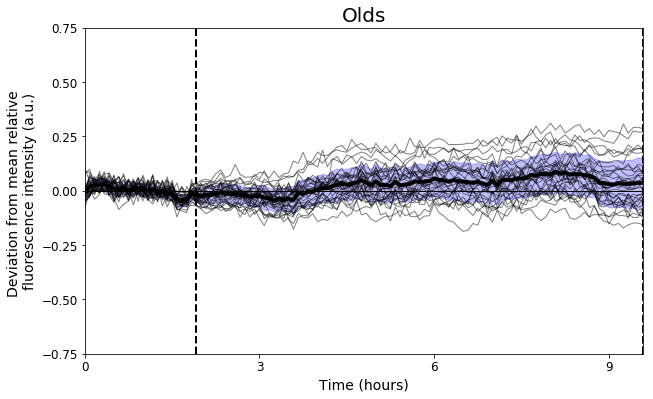

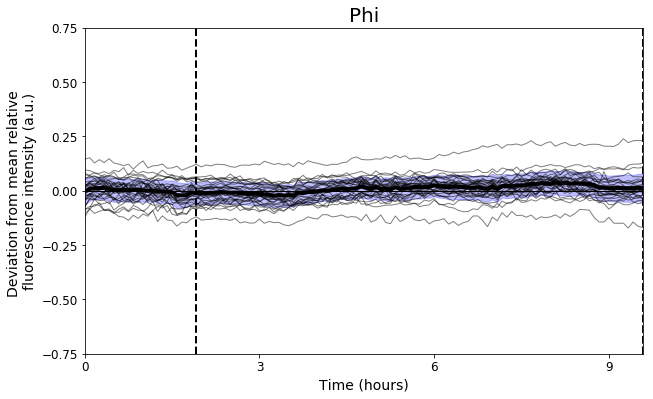

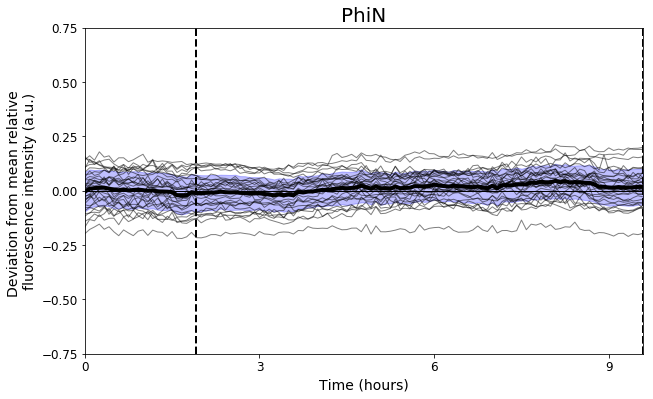

In [34]:
this_maxY=0.75

xh=np.arange(0,len(freqs_pos[p]))*frame2min/60
meanfreq_pos=np.mean(freqs_pos,axis=0)
stdfreq_pos=np.std(freqs_pos,axis=0)

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(10,6))

#Annotates signal
ax.axvline(t_signal_start/60, color='k', linestyle='--')
ax.axvline(t_signal_end/60, color='k', linestyle='--')
ax.axvline(t_experiment_end/60, color='k', linestyle='--')
ax.axhline(0, color='k', linestyle='-',linewidth=1)  

#Plot mean
#pstd0=ax.plot(xh, meanfreq_pos+stdfreq_pos,'k-',linewidth=2)
#pstd1=ax.plot(xh, meanfreq_pos-stdfreq_pos,'k-',linewidth=2)
ax.fill_between(xh, meanfreq_pos-stdfreq_pos, meanfreq_pos+stdfreq_pos, color='blue', alpha=0.25)
pmean=ax.plot(xh, meanfreq_pos,'k-',linewidth=4, label="Population-level mean")
    
    
reps=[]
for p, this_pos in enumerate(list_pos):
    ax.plot(xh, np.array(freqs_pos[p]),'-k',alpha=0.5,linewidth=1, label="pos_%s"%list_pos[p])
    
ax.set_xlabel('Time (hours)', fontsize=14)
ax.set_ylabel('Deviation from mean relative \nfluorescence intensity (a.u.)', fontsize=14)
#ax.axis('tight')
ax.set_xlim( (t_experiment_start/60,t_experiment_end/60) )
ax.set_ylim( (-this_maxY, this_maxY) )
ax.xaxis.set_ticks(np.arange(t_experiment_start/60,(t_experiment_end+1)/60,3))
ax.yaxis.set_ticks(np.arange(-this_maxY,this_maxY+.25,.25))
ax.set_title(label="Olds")
figName='%s%s_DevMeanReps.tif'%(figurePath, expeLabel)
#ax.legend(fontsize='small')
#plt.savefig(figName)
plt.show()
plt.close()
#print("Saved as %s"%figName)

##############################################################################
meanfreq_phi_pos=np.mean(freqs_phi_pos,axis=0)
stdfreq_phi_pos=np.std(freqs_phi_pos,axis=0)

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(10,6))

#Annotates signal
ax.axvline(t_signal_start/60, color='k', linestyle='--')
ax.axvline(t_signal_end/60, color='k', linestyle='--')
ax.axvline(t_experiment_end/60, color='k', linestyle='--')
ax.axhline(0, color='k', linestyle='-',linewidth=1)  

#Plot mean
#pstd0=ax.plot(xh, meanfreq_pos+stdfreq_pos,'k-',linewidth=2)
#pstd1=ax.plot(xh, meanfreq_pos-stdfreq_pos,'k-',linewidth=2)
ax.fill_between(xh, meanfreq_phi_pos-stdfreq_phi_pos, meanfreq_phi_pos+stdfreq_phi_pos, color='blue', alpha=0.25)
pmean=ax.plot(xh, meanfreq_phi_pos,'k-',linewidth=4, label="Population-level mean")
    
    
reps=[]
for p, this_pos in enumerate(list_pos):
    ax.plot(xh, np.array(freqs_phi_pos[p]),'-k',alpha=0.5,linewidth=1, label="pos_%s"%list_pos[p])
    
ax.set_xlabel('Time (hours)', fontsize=14)
ax.set_ylabel('Deviation from mean relative \nfluorescence intensity (a.u.)', fontsize=14)
#ax.axis('tight')
ax.set_xlim( (t_experiment_start/60,t_experiment_end/60) )
ax.set_ylim( (-this_maxY, this_maxY) )
ax.xaxis.set_ticks(np.arange(t_experiment_start/60,(t_experiment_end+1)/60,3))
ax.yaxis.set_ticks(np.arange(-this_maxY,this_maxY+.25,.25))
ax.set_title(label="Phi")
figName='%s%s_DevMeanReps.tif'%(figurePath, expeLabel)
#ax.legend(fontsize='small')
#plt.savefig(figName)
plt.show()
plt.close()
#print("Saved as %s"%figName)

################################################################################
meanfreq_phiN_pos=np.mean(freqs_phiN_pos,axis=0)
stdfreq_phiN_pos=np.std(freqs_phiN_pos,axis=0)



plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(10,6))

#Annotates signal
ax.axvline(t_signal_start/60, color='k', linestyle='--')
ax.axvline(t_signal_end/60, color='k', linestyle='--')
ax.axvline(t_experiment_end/60, color='k', linestyle='--')
ax.axhline(0, color='k', linestyle='-',linewidth=1)  

#Plot mean
#pstd0=ax.plot(xh, meanfreq_pos+stdfreq_pos,'k-',linewidth=2)
#pstd1=ax.plot(xh, meanfreq_pos-stdfreq_pos,'k-',linewidth=2)
ax.fill_between(xh, meanfreq_phiN_pos-stdfreq_phiN_pos, meanfreq_phiN_pos+stdfreq_phiN_pos, color='blue', alpha=0.25)
pmean=ax.plot(xh, meanfreq_phiN_pos,'k-',linewidth=4, label="Population-level mean")
    
    
reps=[]
for p, this_pos in enumerate(list_pos):
    ax.plot(xh, np.array(freqs_phiN_pos[p]),'-k',alpha=0.5,linewidth=1, label="pos_%s"%list_pos[p])
    
ax.set_xlabel('Time (hours)', fontsize=14)
ax.set_ylabel('Deviation from mean relative \nfluorescence intensity (a.u.)', fontsize=14)
#ax.axis('tight')
ax.set_xlim( (t_experiment_start/60,t_experiment_end/60) )
ax.set_ylim( (-this_maxY, this_maxY) )
ax.xaxis.set_ticks(np.arange(t_experiment_start/60,(t_experiment_end+1)/60,3))
ax.yaxis.set_ticks(np.arange(-this_maxY,this_maxY+.25,.25))
ax.set_title(label="PhiN")
figName='%s%s_DevMeanReps.tif'%(figurePath, expeLabel)
#ax.legend(fontsize='small')
#plt.savefig(figName)
plt.show()
plt.close()
#print("Saved as %s"%figName)


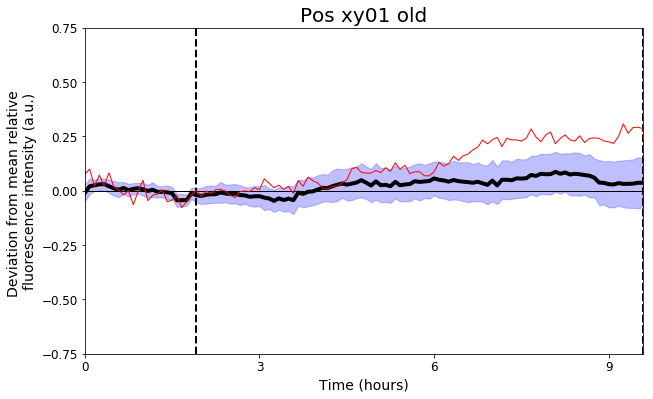

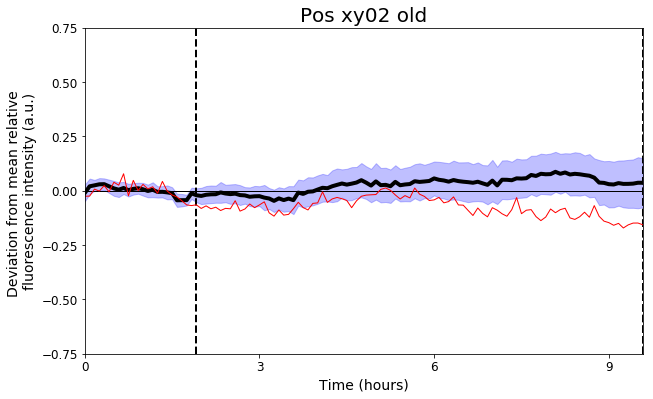

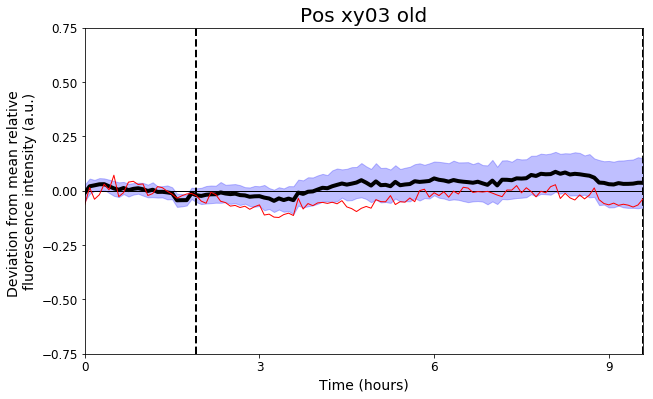

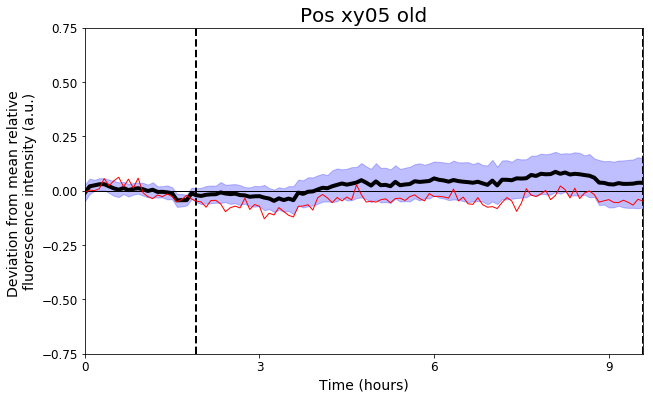

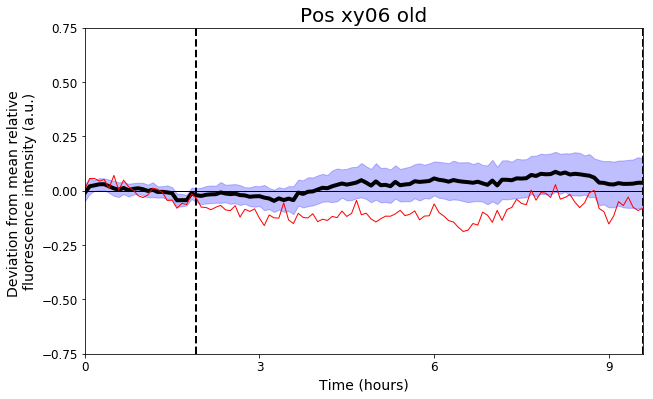

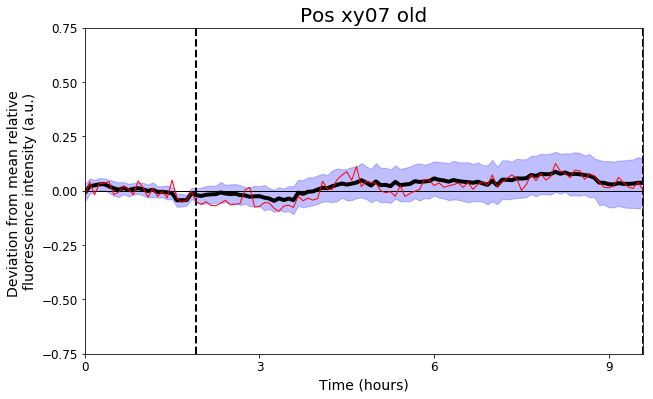

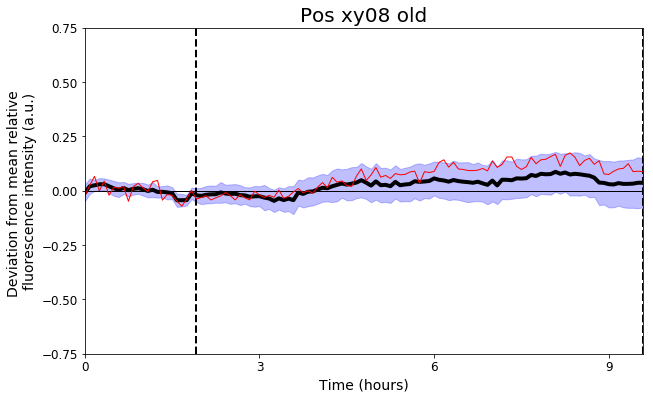

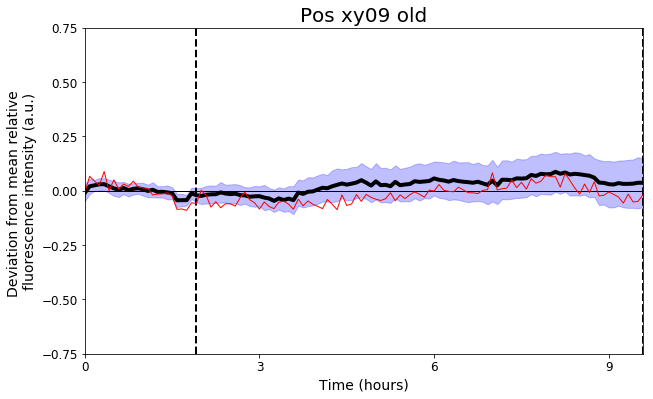

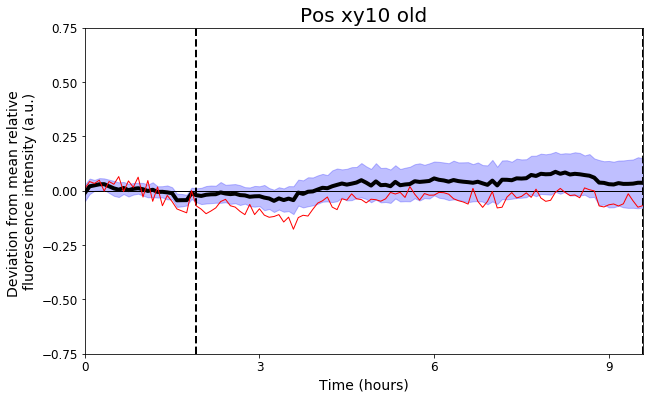

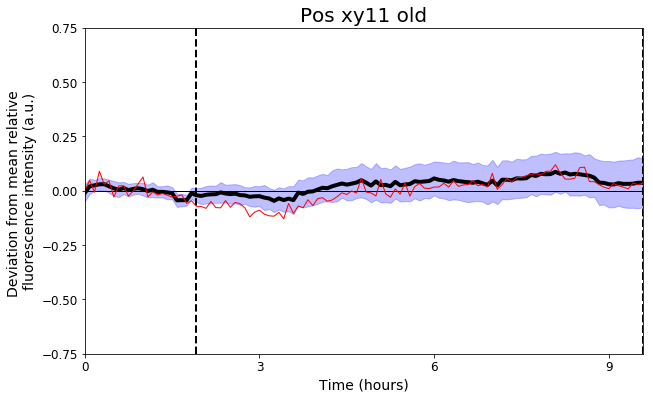

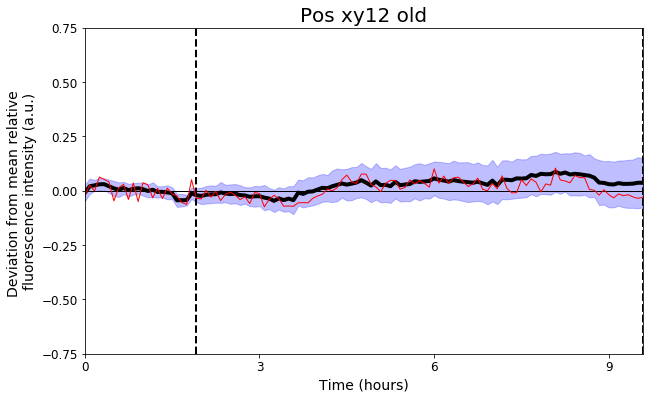

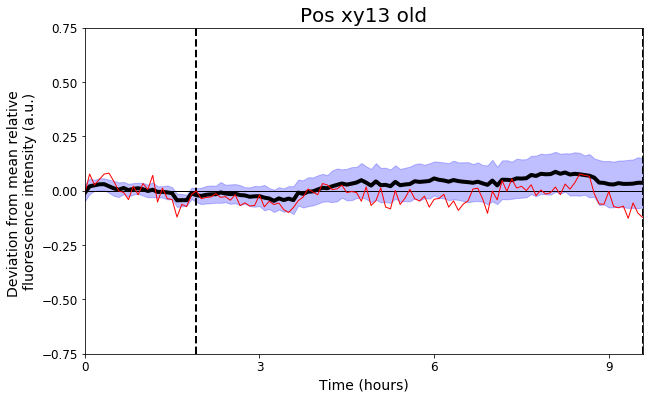

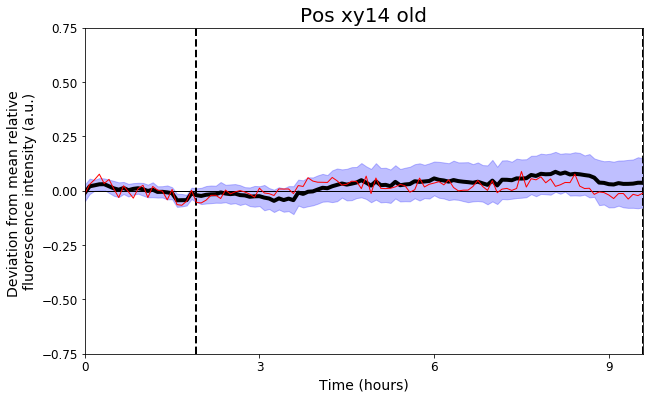

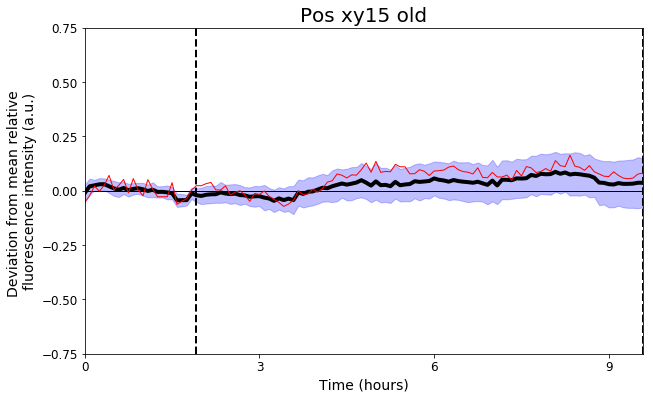

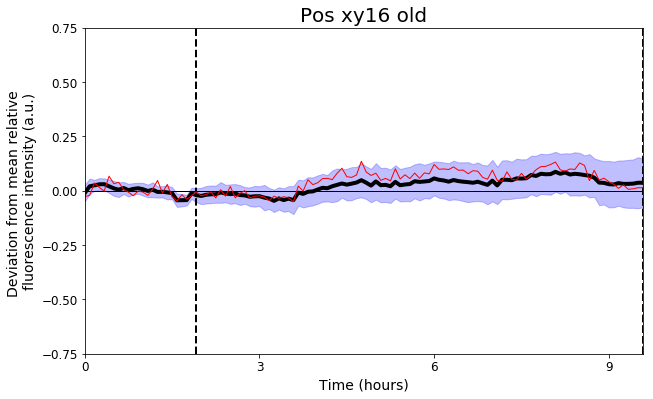

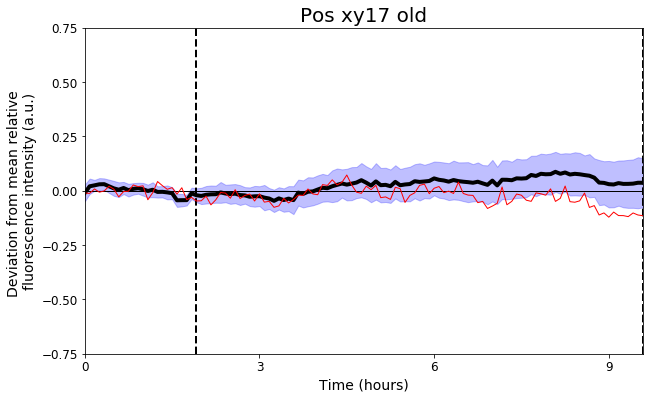

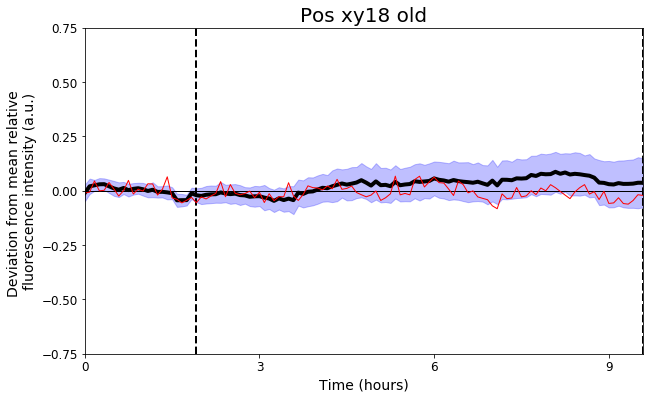

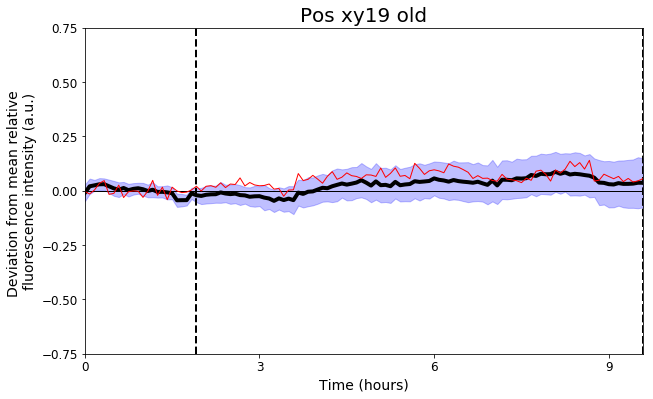

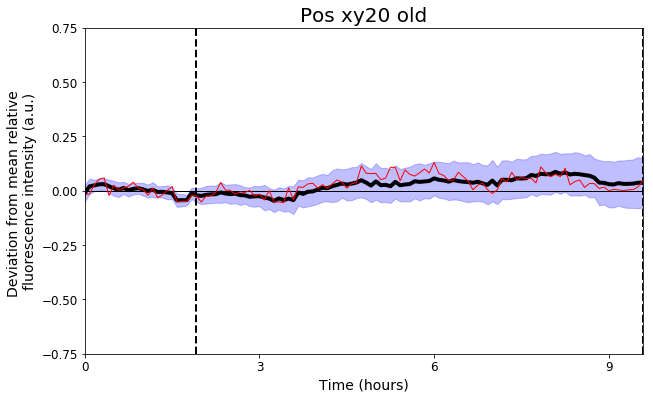

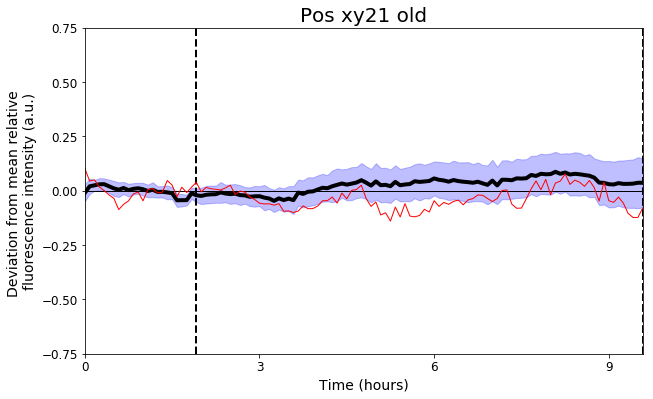

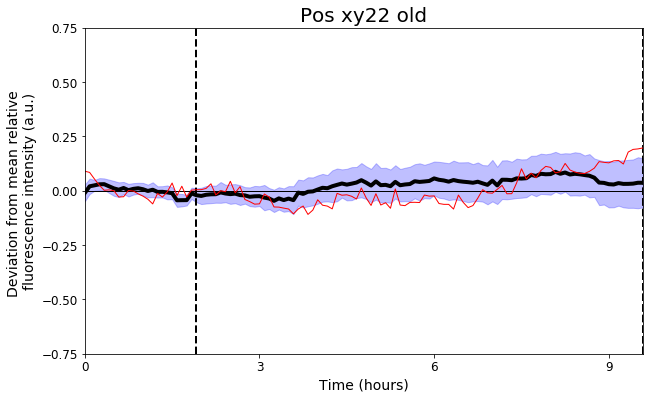

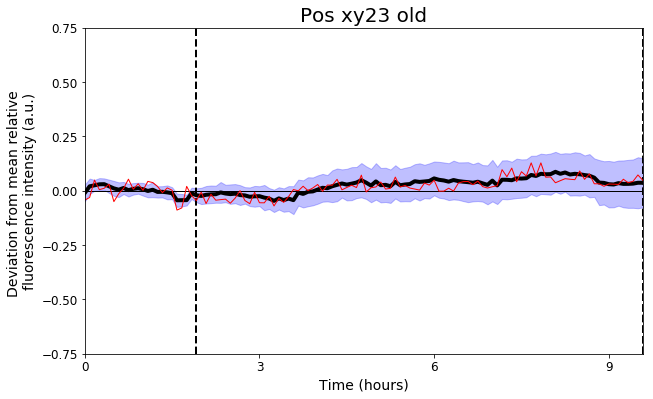

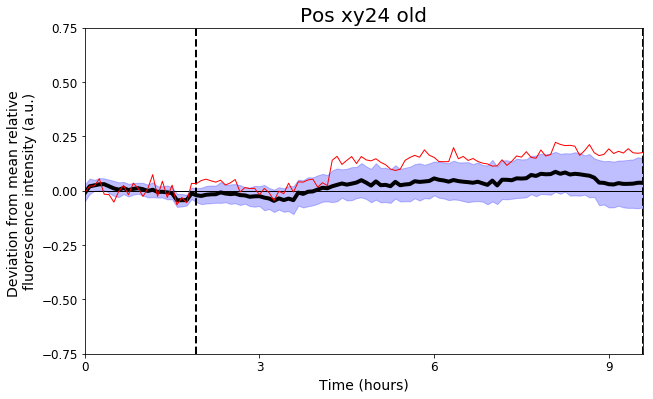

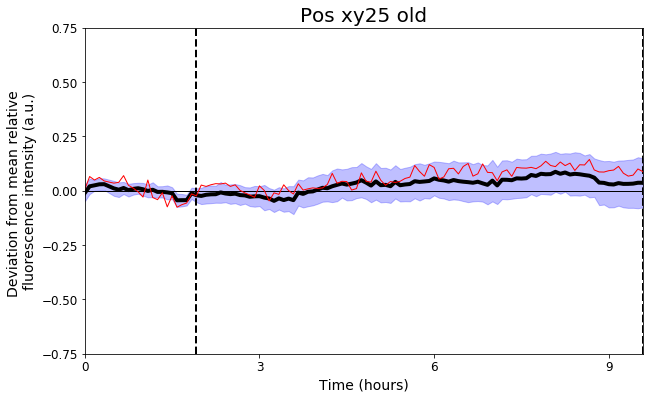

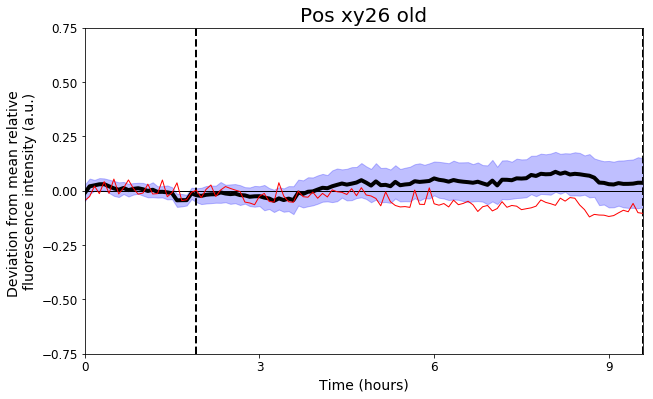

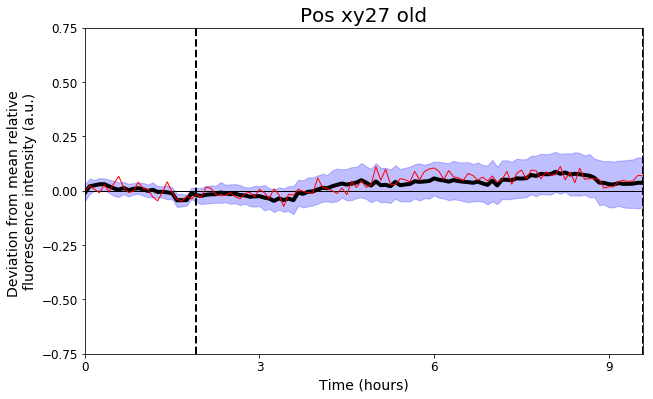

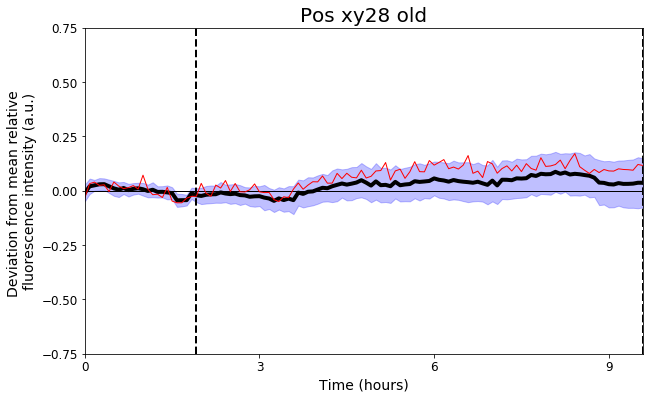

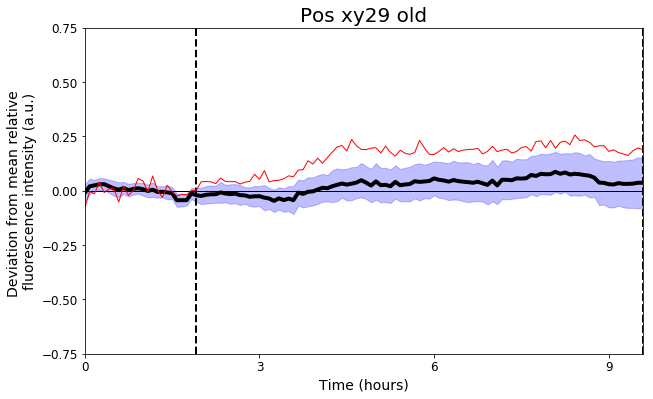

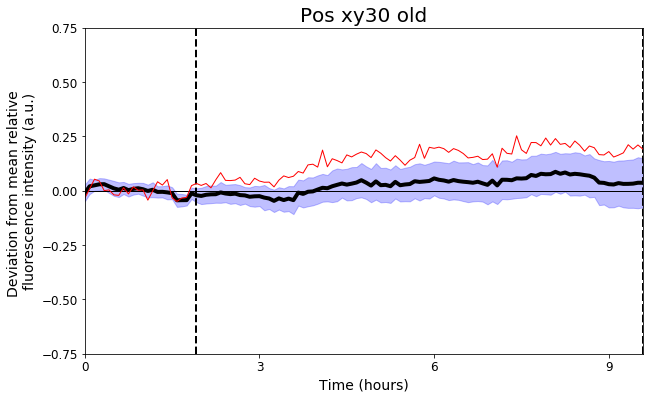

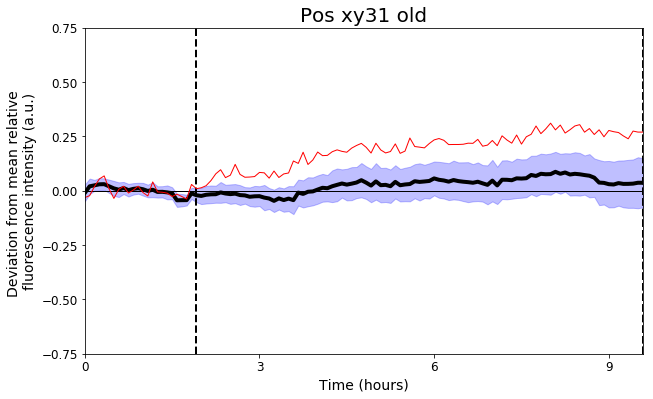

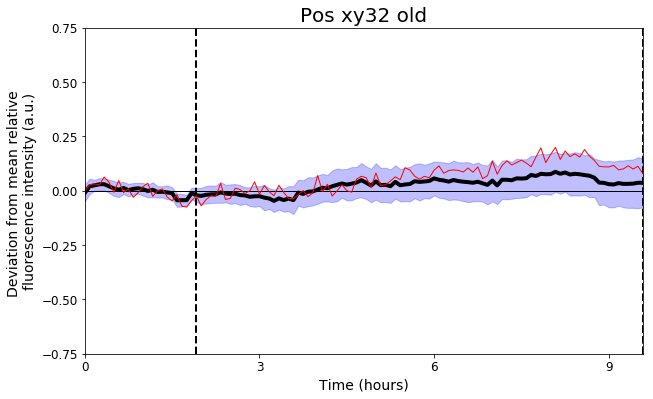

In [35]:

xh=np.arange(0,len(freqs_pos[p]))*frame2min/60
meanfreq_pos=np.mean(freqs_pos,axis=0)
stdfreq_pos=np.std(freqs_pos,axis=0)

plt.rcParams.update({'font.size': 12})

    
# reps=[]
for p, this_pos in enumerate(list_pos):
    fig, ax_i = plt.subplots(figsize=(10,6))

#Annotates signal
    ax_i.axvline(t_signal_start/60, color='k', linestyle='--')
    ax_i.axvline(t_signal_end/60, color='k', linestyle='--')
    ax_i.axvline(t_experiment_end/60, color='k', linestyle='--')
    ax_i.axhline(0, color='k', linestyle='-',linewidth=1)  

#Plot mean
#pstd0=ax.plot(xh, meanfreq_pos+stdfreq_pos,'k-',linewidth=2)
#pstd1=ax.plot(xh, meanfreq_pos-stdfreq_pos,'k-',linewidth=2)
    ax_i.fill_between(xh, meanfreq_pos-stdfreq_pos, meanfreq_pos+stdfreq_pos, color='blue', alpha=0.25)
    pmean=ax_i.plot(xh, meanfreq_pos,'k-',linewidth=4, label="Population-level mean")

    
    ax_i.plot(xh, np.array(freqs_pos[p]),'-r',alpha=1,linewidth=1, label="pos_%s"%list_pos[p])
    
    ax_i.set_xlabel('Time (hours)', fontsize=14)
    ax_i.set_ylabel('Deviation from mean relative \nfluorescence intensity (a.u.)', fontsize=14)
#ax.axis('tight')
    ax_i.set_xlim( (t_experiment_start/60,t_experiment_end/60) )
    ax_i.set_ylim( (-this_maxY, this_maxY) )
    ax_i.xaxis.set_ticks(np.arange(t_experiment_start/60,(t_experiment_end+1)/60,3))
    ax_i.yaxis.set_ticks(np.arange(-this_maxY,this_maxY+.25,.25))
    ax_i.set_title('Pos %s old'%(this_pos))

    #figName='%s%s_DevMeanReps_%s.tif'%(figurePathDM, expeLabel,this_pos)
    #plt.savefig(figName)
    plt.show()
    
    #print("Saved as %s"%figName)
    #print(nana)


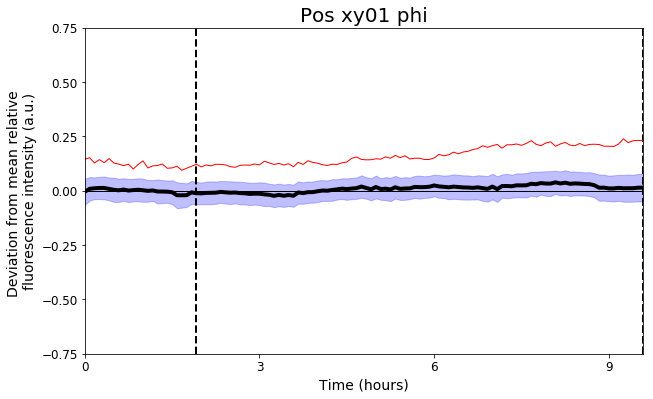

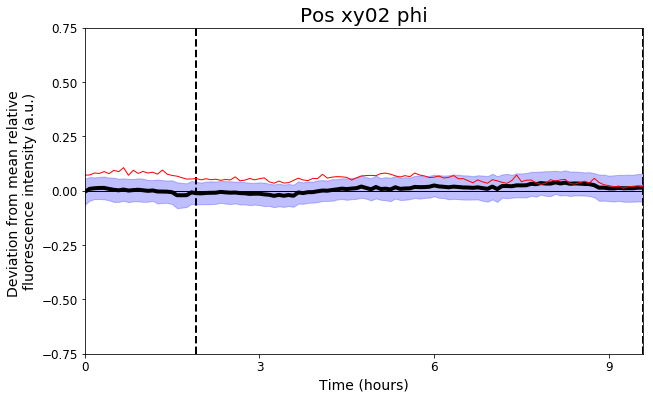

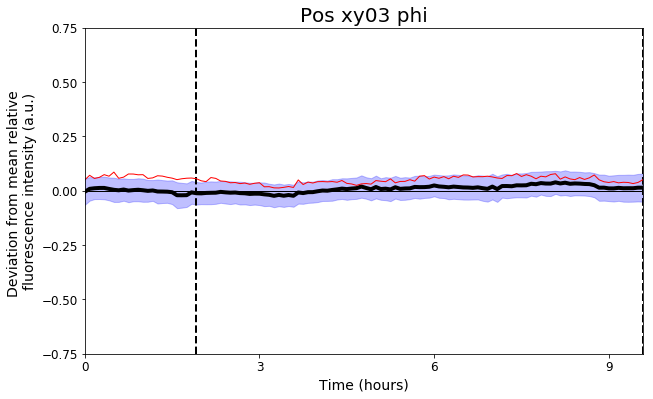

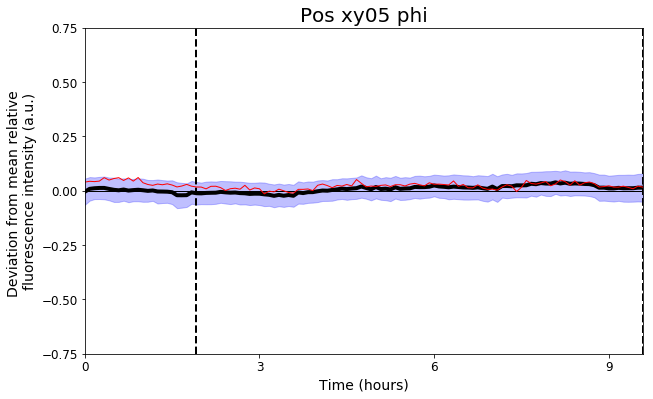

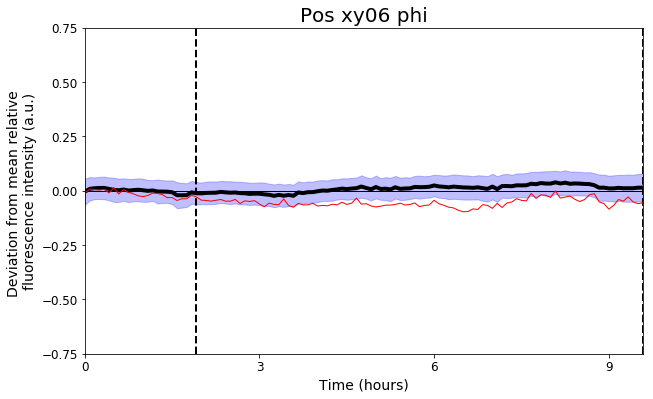

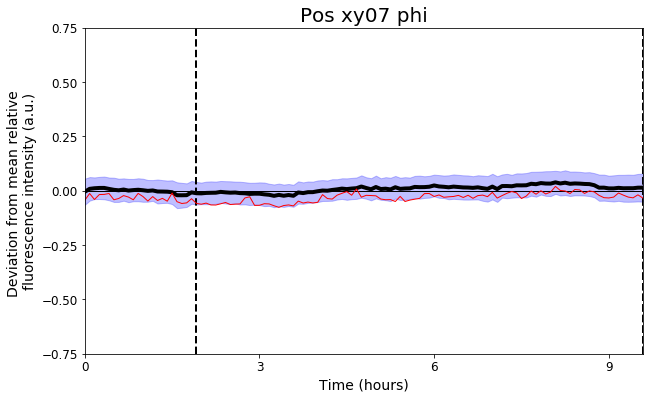

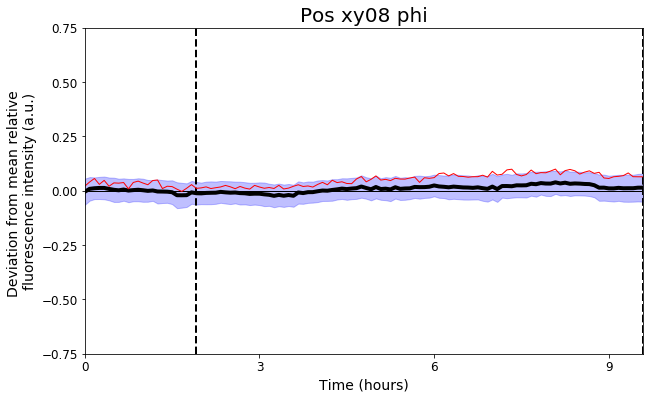

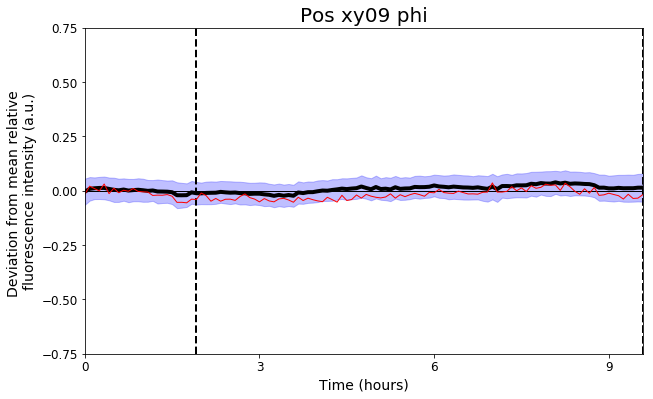

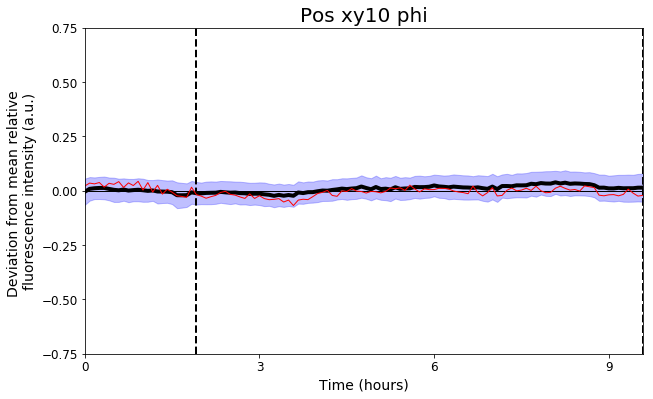

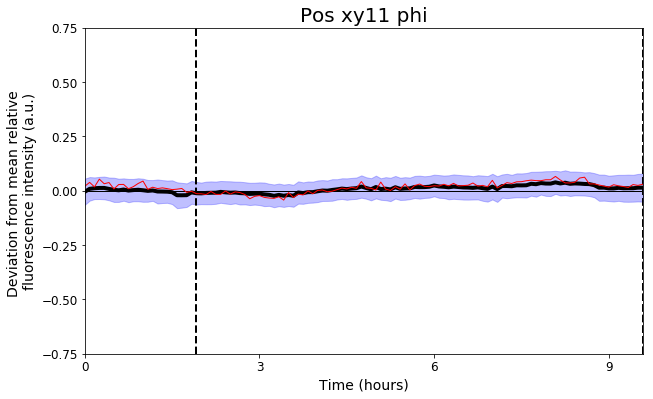

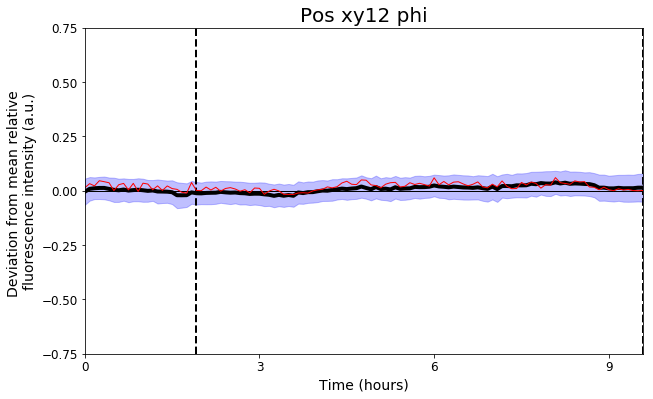

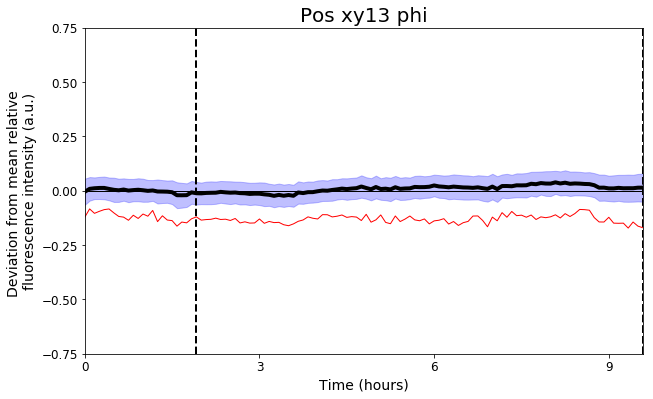

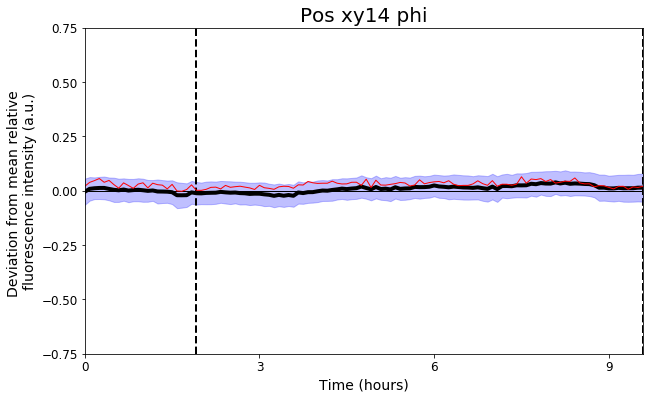

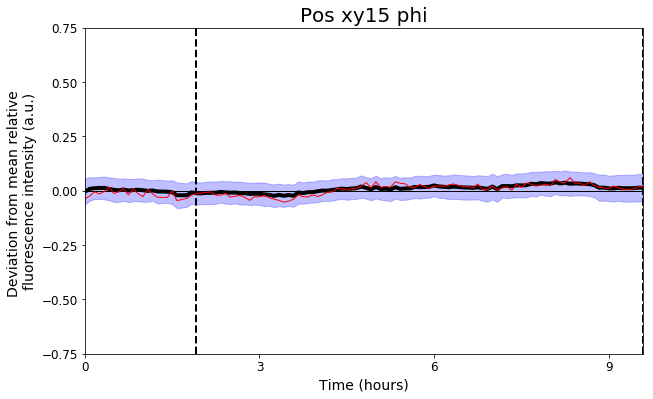

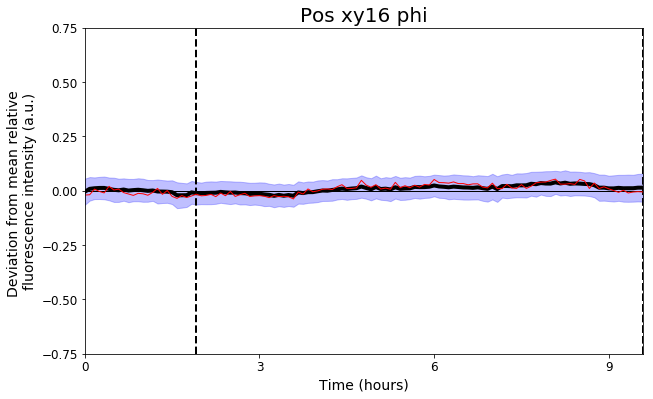

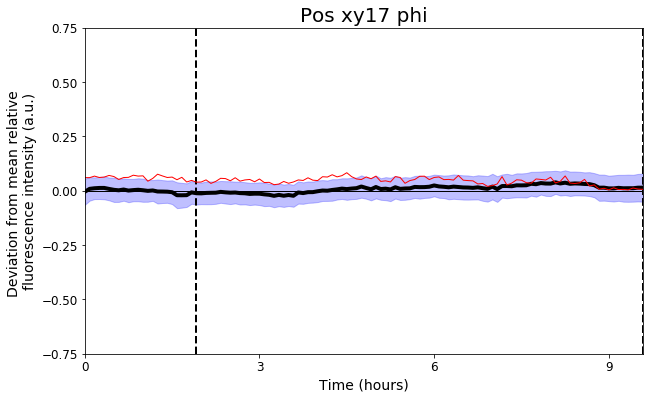

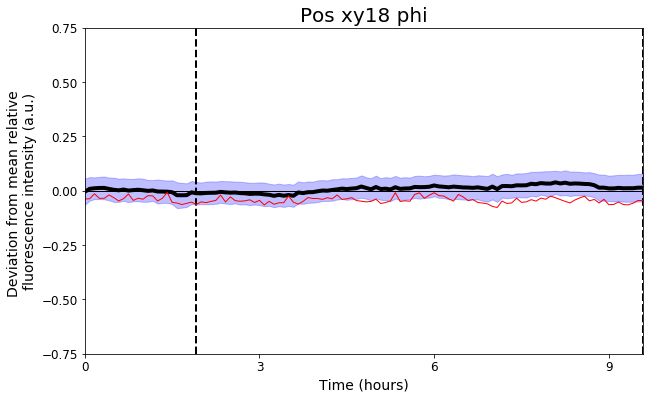

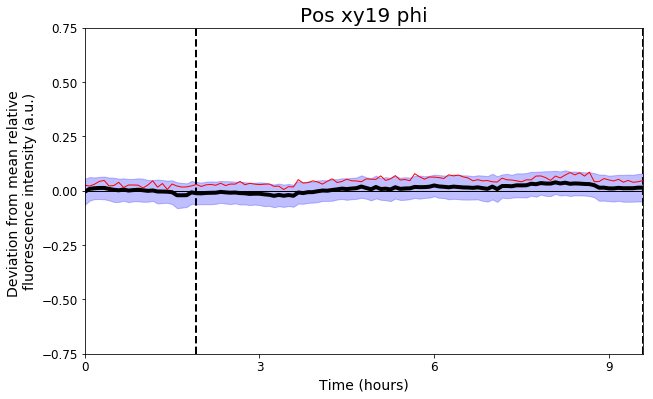

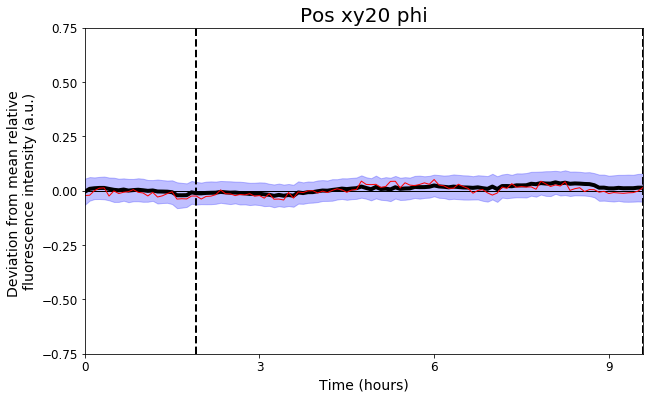

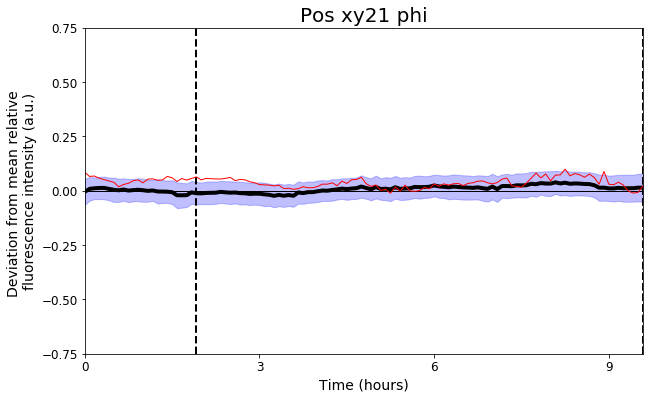

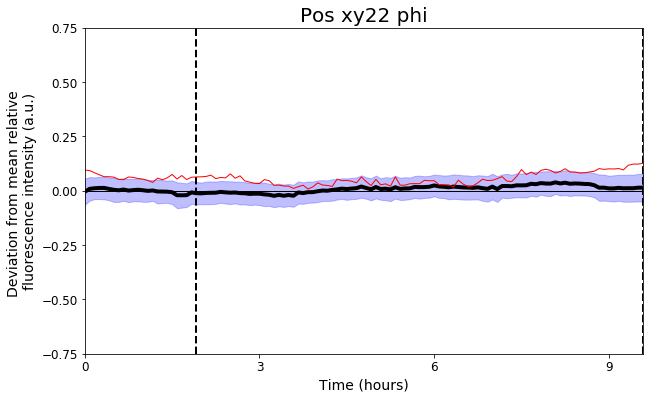

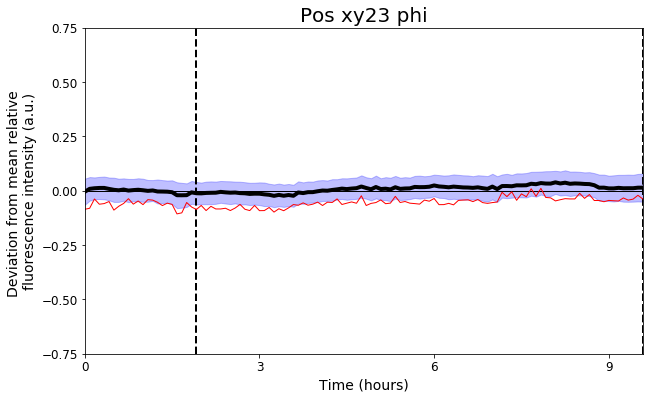

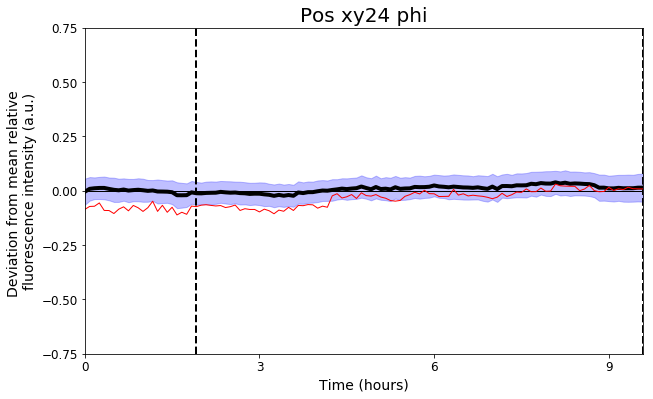

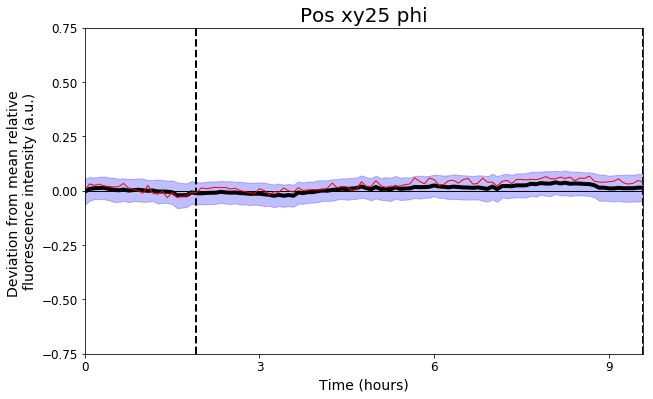

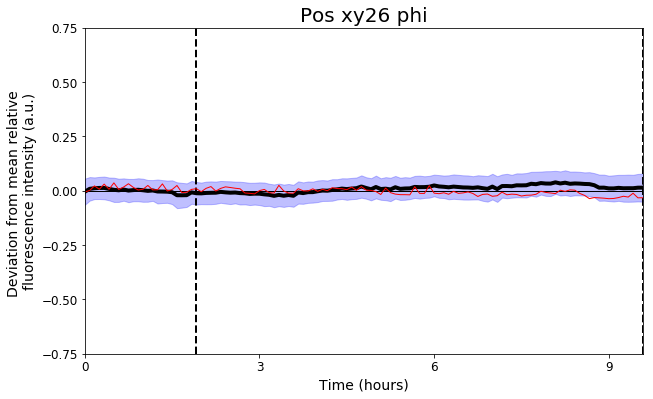

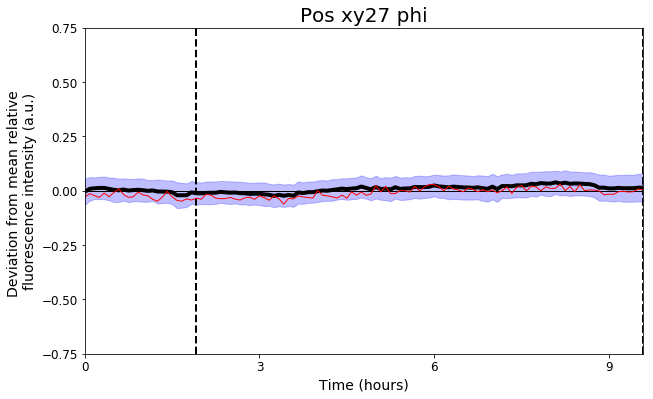

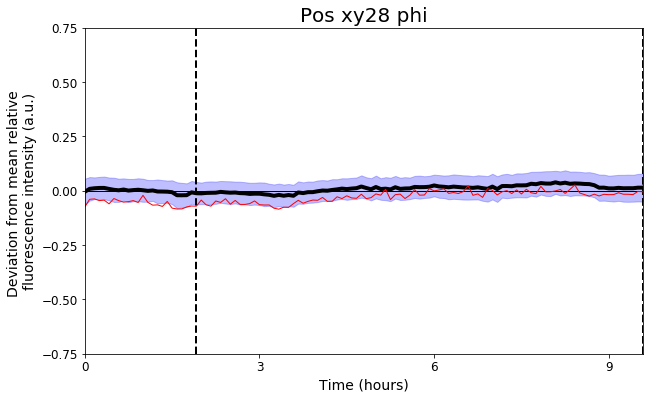

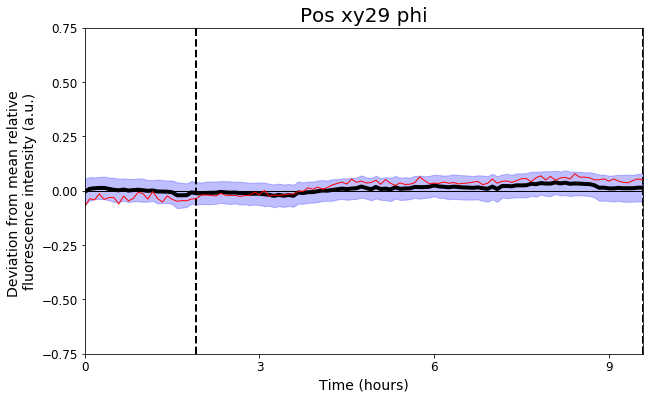

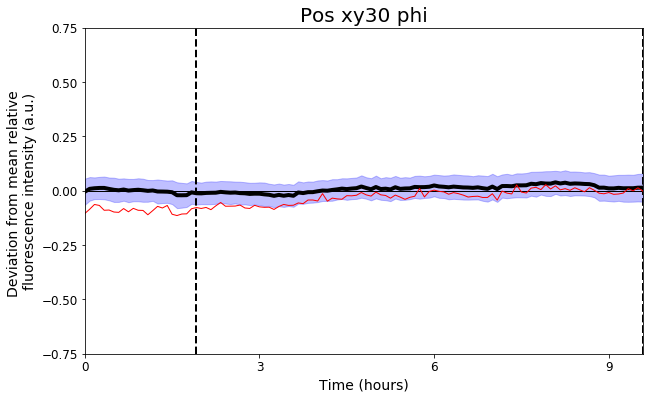

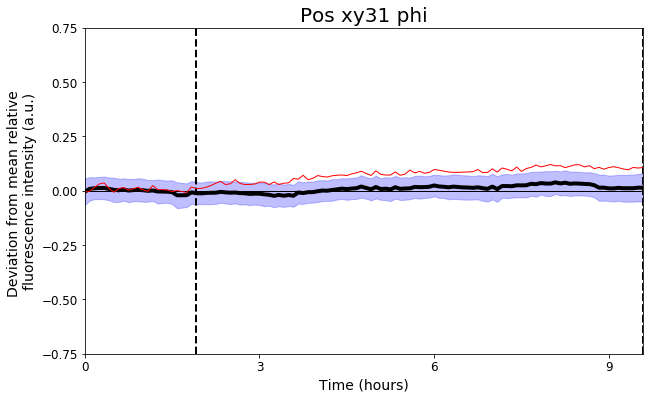

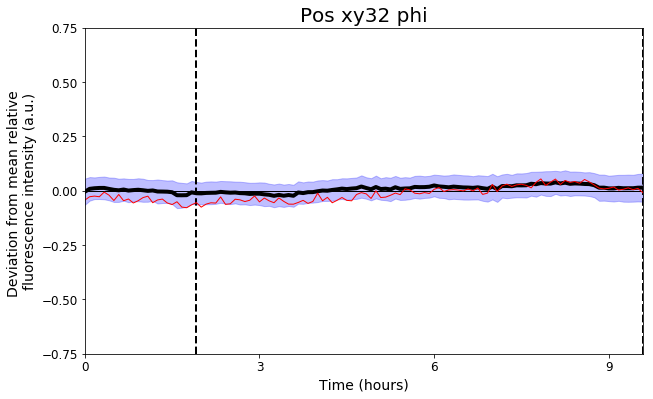

In [36]:

xh=np.arange(0,len(freqs_phi_pos[p]))*frame2min/60
meanfreq_phi_pos=np.mean(freqs_phi_pos,axis=0)
stdfreq_phi_pos=np.std(freqs_phi_pos,axis=0)



plt.rcParams.update({'font.size': 12})

    
# reps=[]
for p, this_pos in enumerate(list_pos):
    fig, ax_i = plt.subplots(figsize=(10,6))

#Annotates signal
    ax_i.axvline(t_signal_start/60, color='k', linestyle='--')
    ax_i.axvline(t_signal_end/60, color='k', linestyle='--')
    ax_i.axvline(t_experiment_end/60, color='k', linestyle='--')
    ax_i.axhline(0, color='k', linestyle='-',linewidth=1)  

#Plot mean
#pstd0=ax.plot(xh, meanfreq_pos+stdfreq_pos,'k-',linewidth=2)
#pstd1=ax.plot(xh, meanfreq_pos-stdfreq_pos,'k-',linewidth=2)
    ax_i.fill_between(xh, meanfreq_phi_pos-stdfreq_phi_pos, meanfreq_phi_pos+stdfreq_phi_pos, color='blue', alpha=0.25)
    
    pmean=ax_i.plot(xh, meanfreq_phi_pos,'k-',linewidth=4, label="Population-level mean")


    
    ax_i.plot(xh, np.array(freqs_phi_pos[p]),'-r',alpha=1,linewidth=1, label="pos_%s"%list_pos[p])
    
    ax_i.set_xlabel('Time (hours)', fontsize=14)
    ax_i.set_ylabel('Deviation from mean relative \nfluorescence intensity (a.u.)', fontsize=14)
#ax.axis('tight')
    ax_i.set_xlim( (t_experiment_start/60,t_experiment_end/60) )
    ax_i.set_ylim( (-this_maxY, this_maxY) )
    ax_i.xaxis.set_ticks(np.arange(t_experiment_start/60,(t_experiment_end+1)/60,3))
    ax_i.yaxis.set_ticks(np.arange(-this_maxY,this_maxY+.25,.25))
    ax_i.set_title('Pos %s phi'%(this_pos))

    #figName='%s%s_DevMeanReps_%s.tif'%(figurePathDM, expeLabel,this_pos)
    #plt.savefig(figName)
    plt.show()
    plt.close()
    #print("Saved as %s"%figName)
    #print(nana)


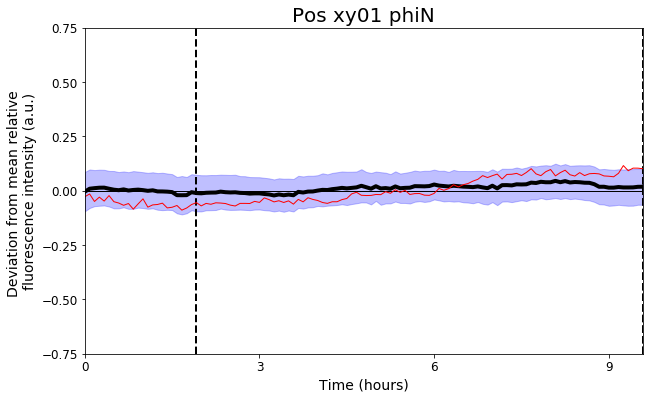

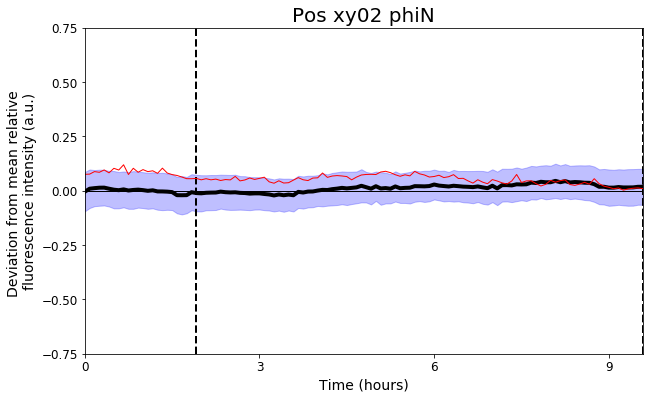

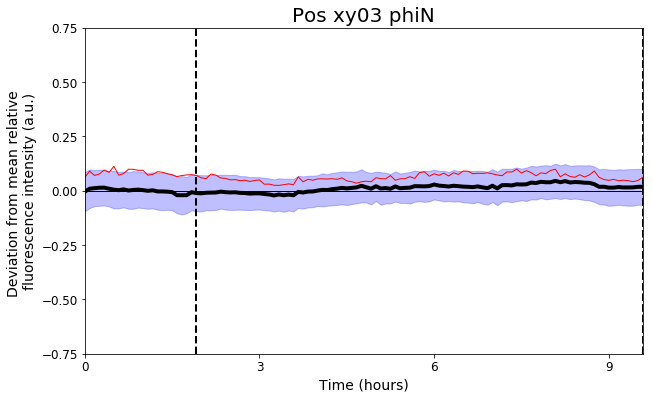

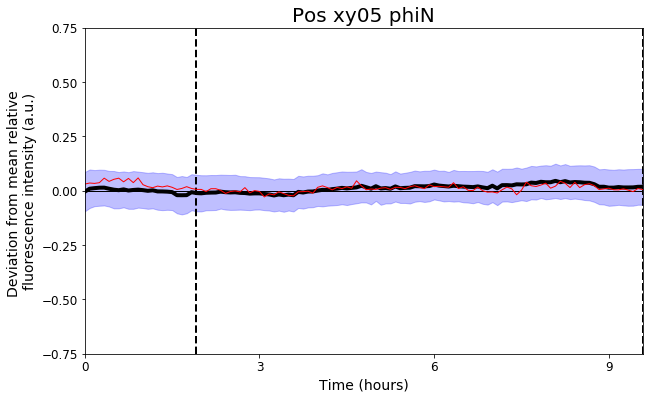

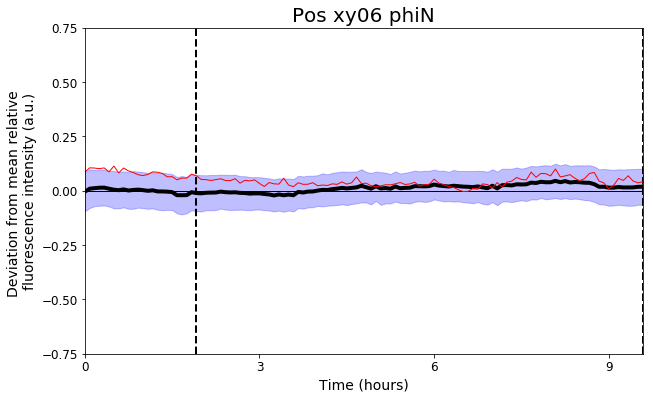

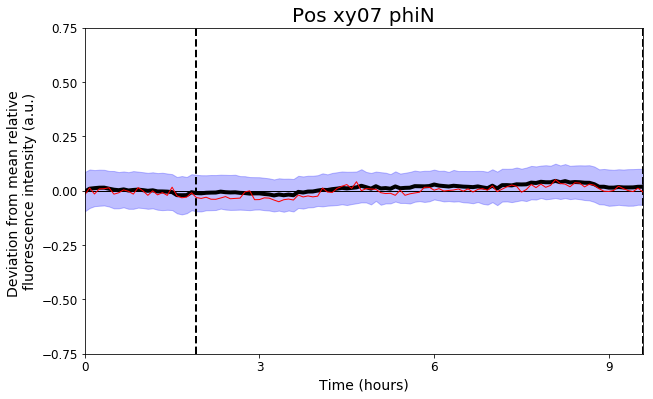

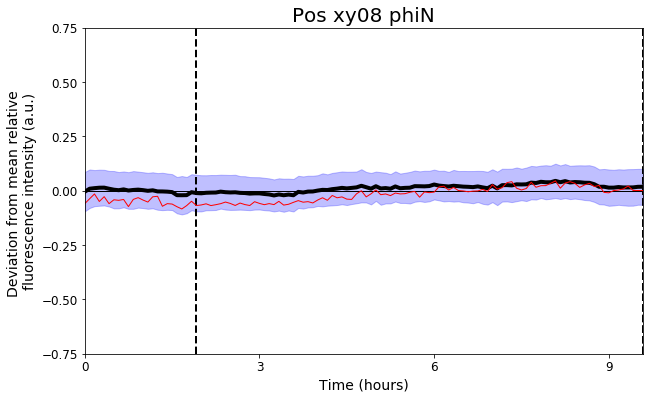

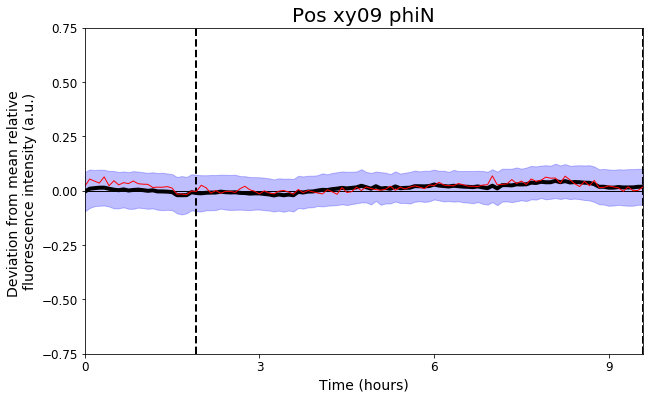

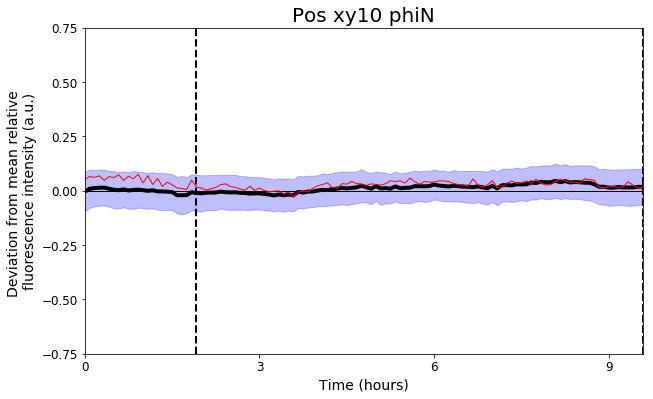

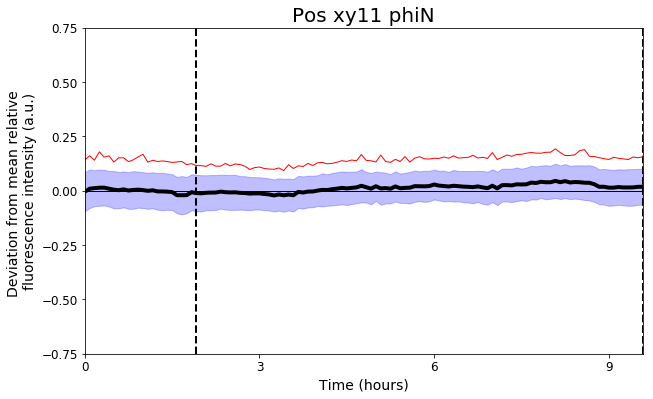

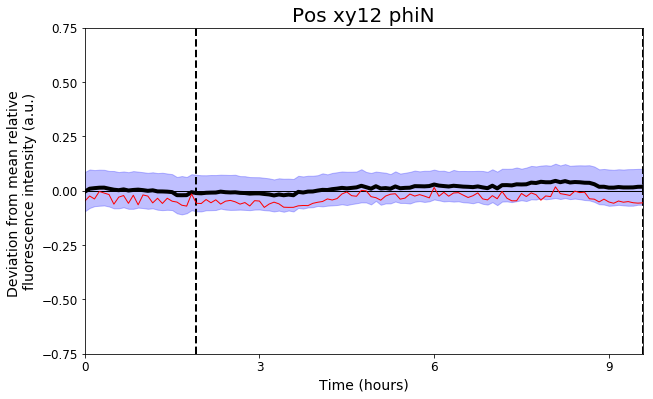

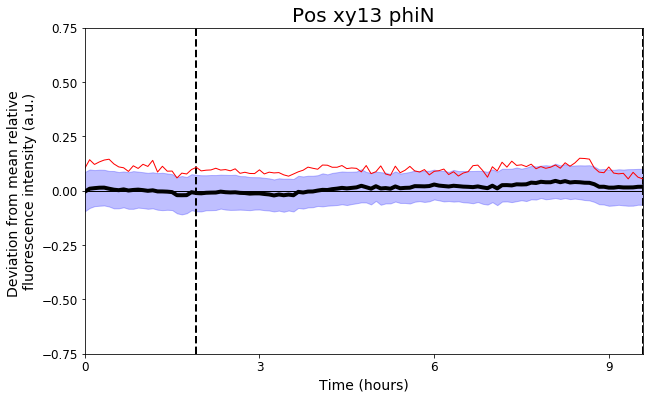

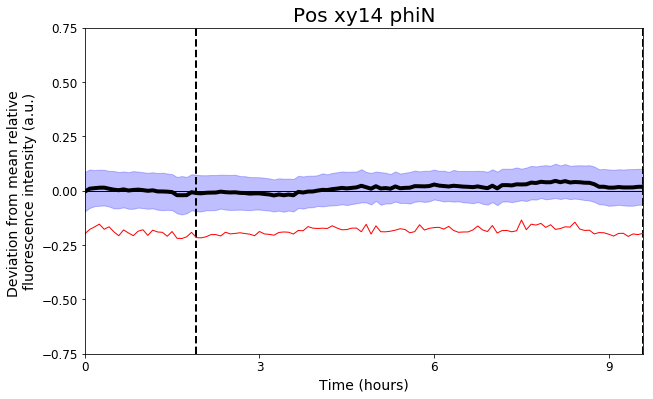

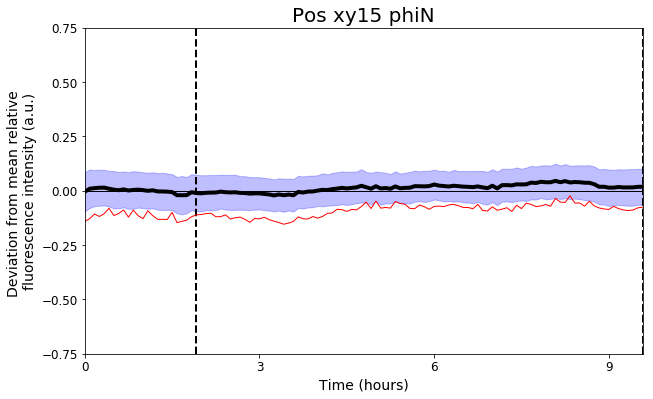

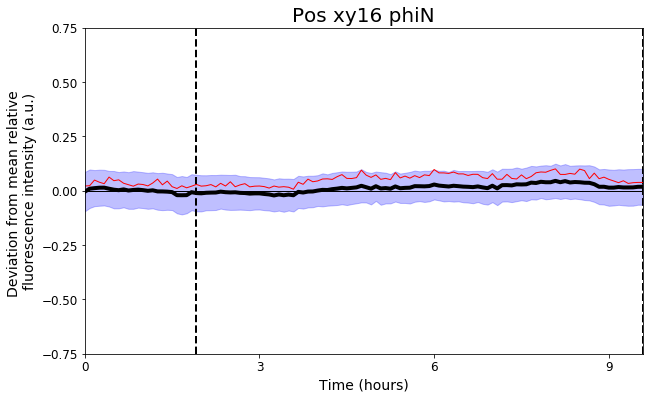

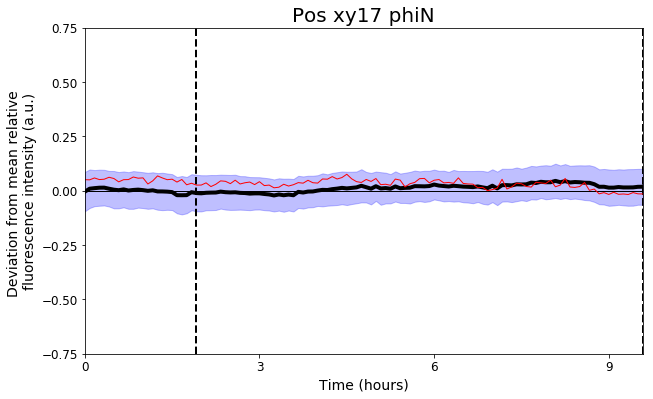

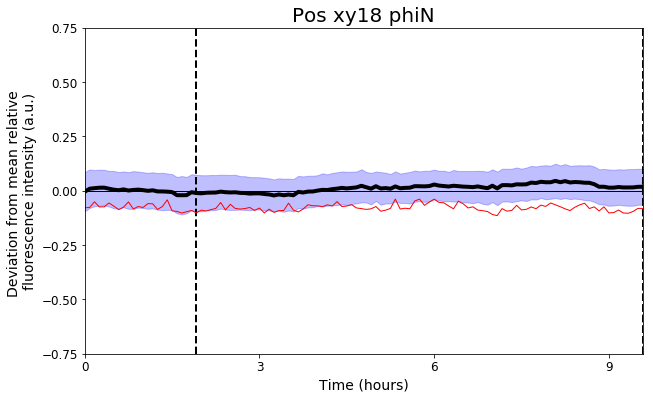

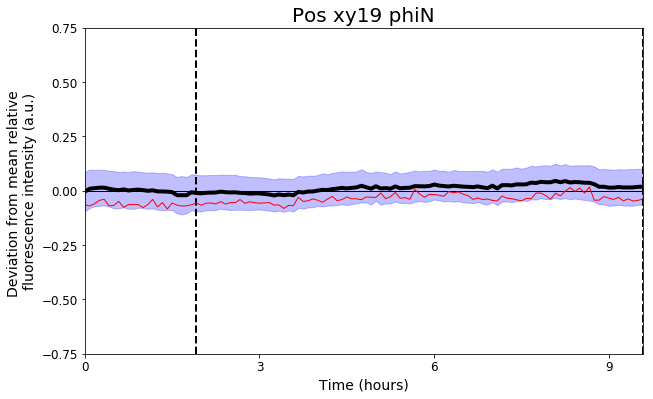

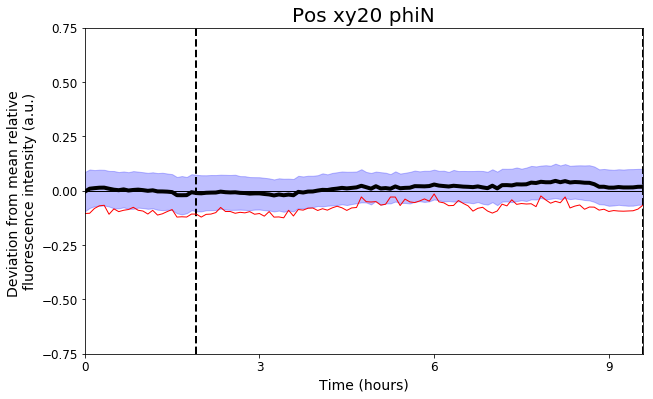

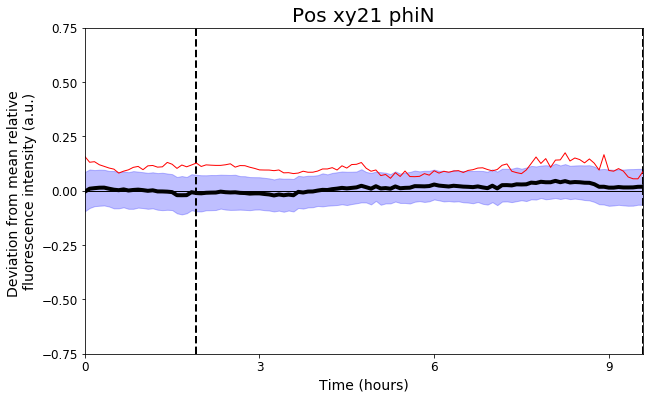

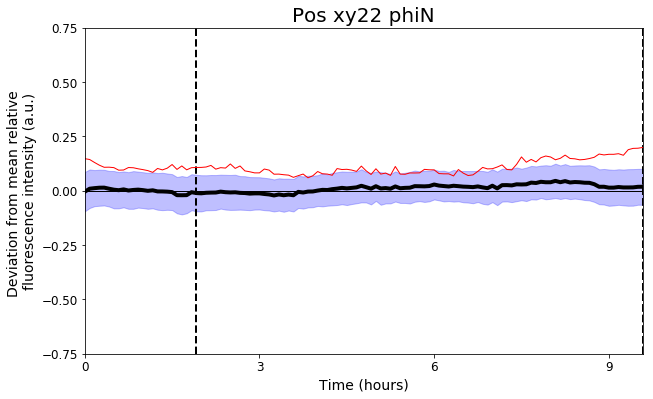

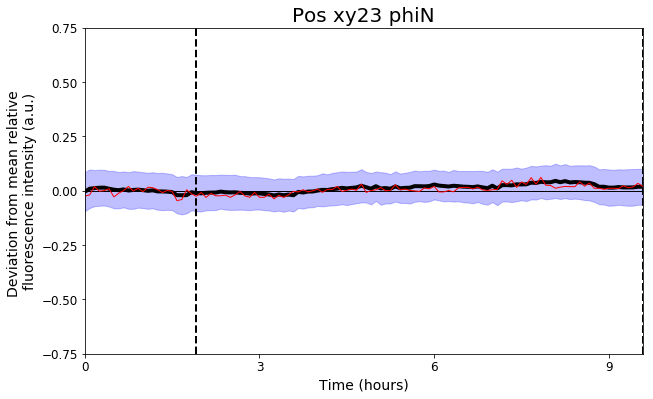

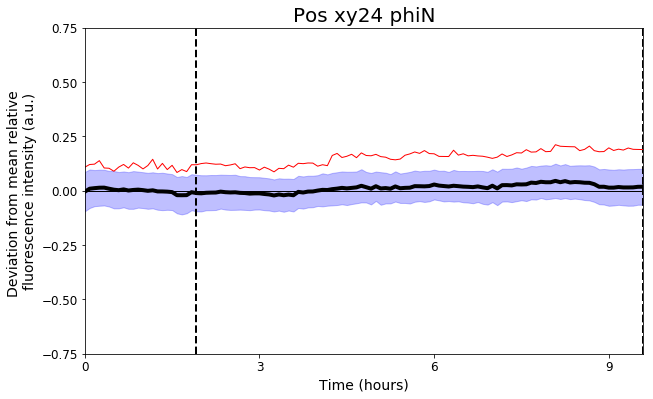

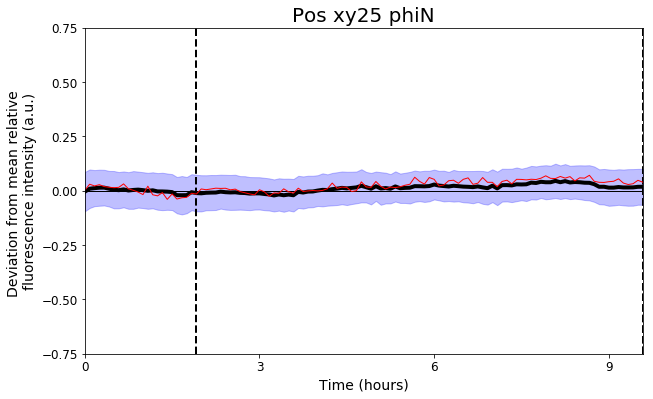

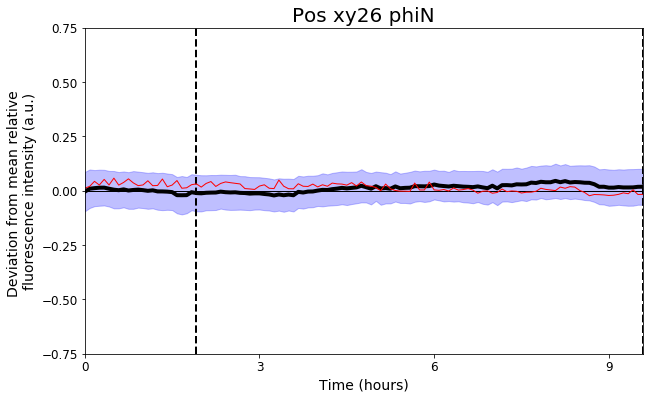

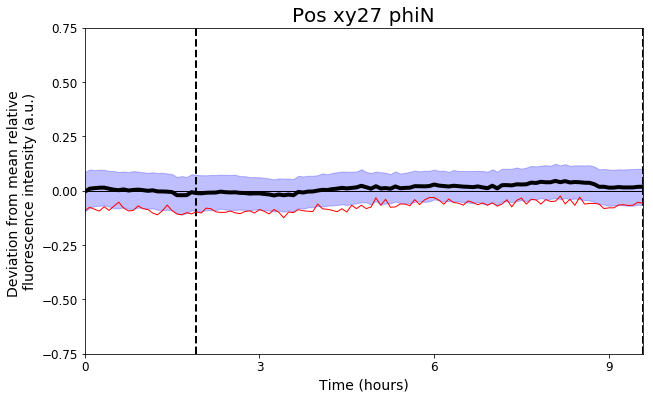

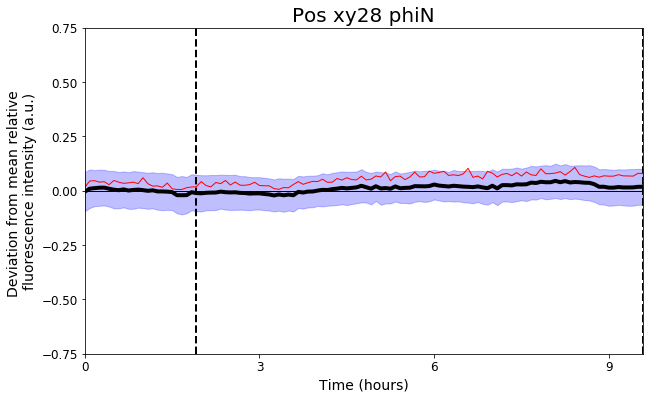

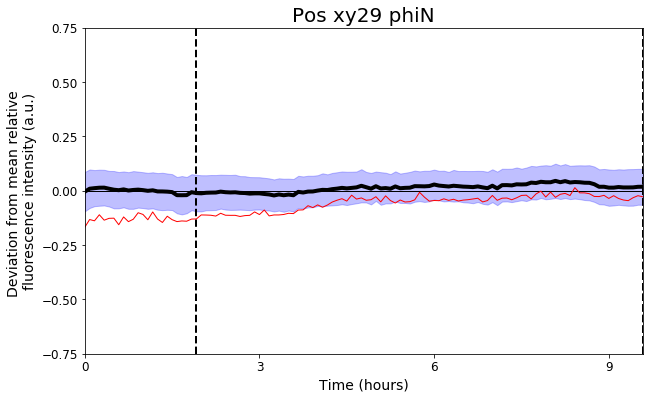

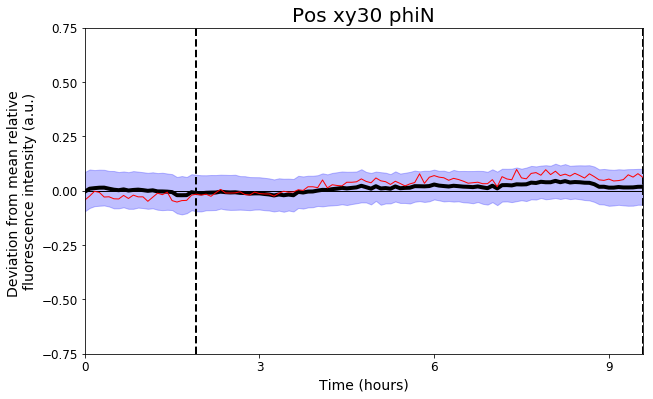

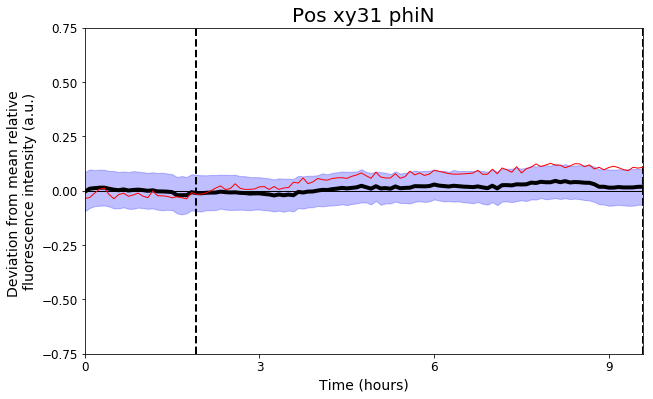

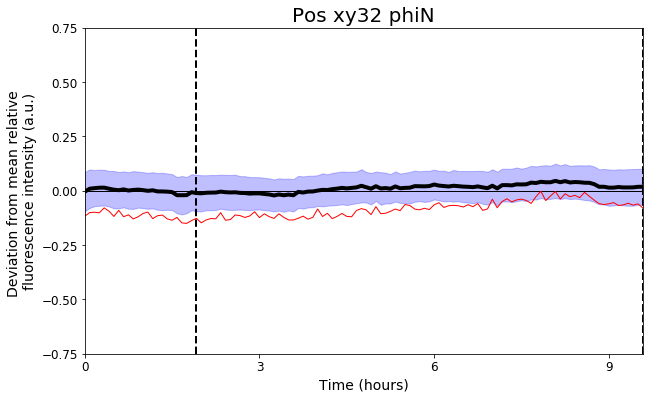

In [37]:

xh=np.arange(0,len(freqs_phi_pos[p]))*frame2min/60
meanfreq_phiN_pos=np.mean(freqs_phiN_pos,axis=0)
stdfreq_phiN_pos=np.std(freqs_phiN_pos,axis=0)


plt.rcParams.update({'font.size': 12})

    
# reps=[]
for p, this_pos in enumerate(list_pos):
    fig, ax_i = plt.subplots(figsize=(10,6))

#Annotates signal
    ax_i.axvline(t_signal_start/60, color='k', linestyle='--')
    ax_i.axvline(t_signal_end/60, color='k', linestyle='--')
    ax_i.axvline(t_experiment_end/60, color='k', linestyle='--')
    ax_i.axhline(0, color='k', linestyle='-',linewidth=1)  

#Plot mean
#pstd0=ax.plot(xh, meanfreq_pos+stdfreq_pos,'k-',linewidth=2)
#pstd1=ax.plot(xh, meanfreq_pos-stdfreq_pos,'k-',linewidth=2)
    ax_i.fill_between(xh, meanfreq_phiN_pos-stdfreq_phiN_pos, meanfreq_phiN_pos+stdfreq_phiN_pos, color='blue', alpha=0.25)
    pmean=ax_i.plot(xh, meanfreq_phiN_pos,'k-',linewidth=4, label="Population-level mean")


    
    ax_i.plot(xh, np.array(freqs_phiN_pos[p]),'-r',alpha=1,linewidth=1, label="pos_%s"%list_pos[p])
    
    ax_i.set_xlabel('Time (hours)', fontsize=14)
    ax_i.set_ylabel('Deviation from mean relative \nfluorescence intensity (a.u.)', fontsize=14)
#ax.axis('tight')
    ax_i.set_xlim( (t_experiment_start/60,t_experiment_end/60) )
    ax_i.set_ylim( (-this_maxY, this_maxY) )
    ax_i.xaxis.set_ticks(np.arange(t_experiment_start/60,(t_experiment_end+1)/60,3))
    ax_i.yaxis.set_ticks(np.arange(-this_maxY,this_maxY+.25,.25))
    ax_i.set_title('Pos %s phiN'%(this_pos))

    #figName='%s%s_DevMeanReps_%s.tif'%(figurePathDM, expeLabel,this_pos)
    #plt.savefig(figName)
    plt.show()
    
    #print("Saved as %s"%figName)
    #print(nana)


## Plot 2D histogram of fluorescent intensities

In [ ]:

outDir="%s2Dhist/"%figurePath
if not os.path.exists(outDir):
    os.mkdir(outDir)
frames=range(int(frame_experiment_start),int(frame_experiment_end+1))
for t in frames:
    if t is not frames[0] and t is not frames[-1]:
        continue
    
    filter_t=filterFrames(data_frame, [t])
    
    this_GFP=data_GFP[filter_t]
    this_DsRed=data_DsRed[filter_t]

    x=[this_x for this_x in this_GFP]
    y=[this_y for this_y in this_DsRed]

    xmin = meanGFP-750
    ymin = meanDsRed-100
    xmax = meanGFP+750
    ymax = meanDsRed+100
    
    fig, ax = plt.subplots()
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    
    xedges, yedges = np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100)
    hist, xedges, yedges = np.histogram2d(x, y, (xedges, yedges))
    
    
    # Peform the kernel density estimate
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)

    # Contourf plot
    num_levels=10
    hb = ax.contourf(xx, yy, f, num_levels-1, cmap='inferno')
    ax.axhline(meanDsRed, color='w', linestyle='-',alpha=0.5)
    ax.axvline(meanGFP, color='w', linestyle='-',linewidth=1,alpha=0.5) 
    ax.axhline(np.mean(y), color='w', linestyle='--',alpha=0.5)
    ax.axvline(np.mean(x), color='w', linestyle='--',linewidth=1,alpha=0.5)  
    
    
    #xidx = np.clip(np.digitize(x, xedges), 0, hist.shape[0]-1)
    #yidx = np.clip(np.digitize(y, yedges), 0, hist.shape[1]-1)
    #c = hist[xidx, yidx]
    #h=plt.scatter(x, y, c='w', lw = 0, alpha=0.2)

    #ax.set_axis_bgcolor('black')
    ax.axis([xmin, xmax, ymin, ymax])
    ax.set_xlabel('GFP intensity (a.u.)',fontsize=14)
    ax.set_ylabel('DsRed intensity (a.u.)',fontsize=14)
    ax.set_title('%s minutes'%((t-frame_experiment_start)*frame2min))
                 
    cb = fig.colorbar(hb, ax=ax)
    cb.set_label('Number of cells',fontsize=14)
    cb.set_ticks(np.linspace(hb.get_array().min(), hb.get_array().max(), 2))
    cb.set_ticklabels(np.linspace(0, 1., 2))
    cb.set_label('Normalized frequency',fontsize=14)
    
    figName='%s%s_2Dhist_t%s.tif'%(outDir, expeLabel,t)
    #plt.savefig(figName)
    
    if t is not frames[0] and t is not frames[-1]:
        plt.close()


plt.show()
print("Saved as %s%s_2Dhist_<pos>_<t>.tif"%(outDir, expeLabel))

## Plot relative fluorescence distribution

In [ ]:

import matplotlib.patches as patches
frames=range(int(frame_experiment_start),int(frame_experiment_end+1))
outDir="%s1Dhist/"%figurePath
if not os.path.exists(outDir):
    os.mkdir(outDir)

cm = plt.cm.get_cmap('RdYlBu_r')

x_min =-1 #meanGFP
#y_min =0 #meanDsRed
x_max =1 #meanGFP
#y_max =3 #meanDsRed
y_min=0
y_max=1.1*np.max(dist_relfreqs)

for t in frames:
    
    fig, ax = plt.subplots()
    bins=dist_relfreqs[t-frames[0]]
    n=bin_list[1:]-bin_size/2
    
    for ib, b in enumerate(n):
        #ax.bar([b-bin_size/2,b+bin_size/2], [0, bins[ib]], alpha=0.2)
        ax.add_patch(
            patches.Rectangle(
                (b-bin_size/2, 0),   # (x,y)
                bin_size,          # width
                bins[ib],          # height
                facecolor=cm((ib+1)/len(n))
            )
        )
        
    ax.axvline(0, color='k', linestyle='-')
    ax.axvline(-ydev[t-frame_experiment_start], color='k', linestyle='--')
   # ax.set_axis_bgcolor('white')
   # ax.set_xlim([bin_min,bin_max])
    ax.set_xlim([x_min,x_max])
    ax.set_ylim([y_min,y_max])
    ax.set_xlabel('Deviation from Mean Fluorescence Intensity',fontsize=14)
    ax.set_ylabel('Frequency',fontsize=14)
    ax.set_title('%s minutes'%((t-frame_experiment_start)*frame2min))
    
    figName='%s%s_1Dhist_t%s.tif'%(outDir, expeLabel,t)
    #plt.savefig(figName)
    if t is not frame_experiment_start and t is not 127:
        plt.close()
    

plt.show()
print("Saved as %s%s_1Dhist_<t>.tif"%(outDir, expeLabel))

## Unknown Pleasures

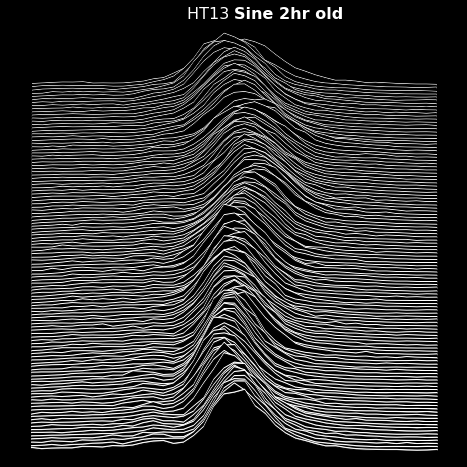

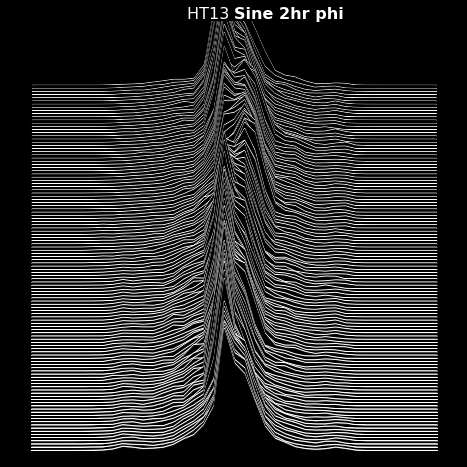

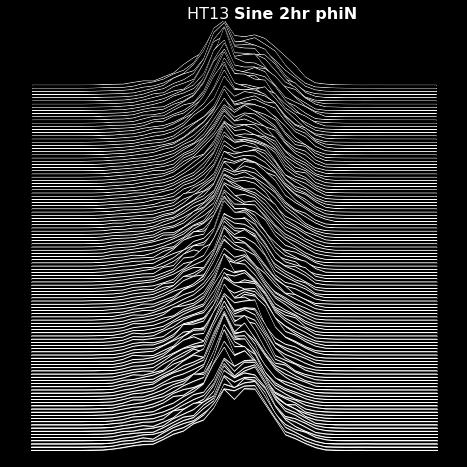

Saved as /home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/figures/HT13-Sine-2hr_UnknownPleasures_phiN.tif


In [38]:

def plotUnknownPleasures(data, figName=''):
    # Create new Figure with black background
    fig = plt.figure(figsize=(8, 8), facecolor='black')

    # Add a subplot with no frame
    ax = plt.subplot(111, frameon=False)

    # Generate random data
    
    X = np.linspace(-1, 1, data.shape[-1])
    #G = 1.5 * np.exp(-4 * X * X)

    # Generate line plots
    #lines = []
    N=len(data)
    maxlw=.4
    minlw=.2
    maxz=6
    for i in range(N):
        # Small reduction of the X extents to get a cheap perspective effect
        xscale = 1 - N-i / 200.
        # Same for linewidth (thicker strokes on bottom)
        lw = (maxlw - minlw)*(i)/N + minlw
        ax.fill_between(xscale * X, N-i, N-i + maxz*data[i], facecolor='white', edgecolor='white', alpha=1, interpolate=True, zorder=i)
        ax.fill_between(xscale * X, N-i-lw, N-i + maxz*data[i]-lw, facecolor='black', edgecolor='black', alpha=1, interpolate=True, zorder=i)
        

    # Set y limit (or first line is cropped because of thickness)
    ax.set_ylim(-1, 20+len(data))

    # No ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # 2 part titles to get different font weights
    str_strain,str_drug,t = figName.split("-")
    str_drug=str_drug
    ax.text(0.5, 1.0, "%s "%str_strain, transform=ax.transAxes,
            ha="right", va="bottom", color="w",
            family="sans-serif", fontweight="light", fontsize=16)
    ax.text(0.5, 1.0, str_drug+" "+t, transform=ax.transAxes,
            ha="left", va="bottom", color="w",
            family="sans-serif", fontweight="bold", fontsize=16)
    
    
    
    
    #plt.close()
    
    
    

figName='%s%s_UnknownPleasures_old.tif'%(figurePath, expeLabel)
plotUnknownPleasures(dist_relfreqs, expeLabel+" old")
plt.show()
plt.close()
figName='%s%s_UnknownPleasures_phi.tif'%(figurePath, expeLabel)
plotUnknownPleasures(dist_relfreqs_phi, expeLabel+" phi")
plt.show()
plt.close()
figName='%s%s_UnknownPleasures_phiN.tif'%(figurePath, expeLabel)
plotUnknownPleasures(dist_relfreqs_phi_N, expeLabel+" phiN")
plt.show()
plt.close()

#plt.savefig(figName, facecolor='black')
print("Saved as %s"%figName)

## Time-dependant distribution (Heatmap)

In [39]:
def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)





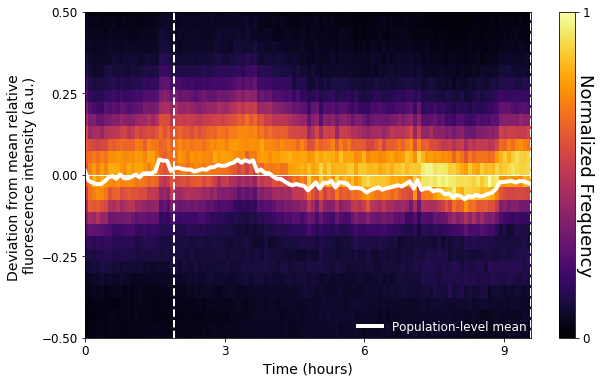

Saved as /home/esb/Projects/uJ/local/data_sample/HT13-Sine-2hr/figures/HT13-Sine-2hr_HeatmapDist.tif


In [40]:
#this_maxy=maxy
this_maxY=0.5


#c = mcolors.ColorConverter().to_rgb
#rvb = make_colormap([c('black'), c('green')])
rvb= plt.cm.get_cmap('inferno')

plt.rcParams.update({'font.size': 12})
zh = np.rot90(dist_relfreqs)

[numBs, numTs]=zh.shape

xh=np.linspace(0,numTs*frame2min/60,numTs)
yh=np.linspace(bin_min,bin_max,numBs)
maxY=np.max(yh)

fig, ax = plt.subplots(figsize=(10,6))
im =plt.pcolor(xh, yh, zh, cmap=rvb, vmin=np.min(zh), vmax=np.max(dist_relfreqs))

cbar=fig.colorbar(im, ticks=[np.min(zh), np.max(zh)])
cbar.ax.set_yticklabels(['0','1'])
cbar.set_label('Normalized Frequency', rotation=270)

#Annotates signal
ax.axvline(t_signal_start/60, color='w', linestyle='--')
ax.axvline(t_signal_end/60, color='w', linestyle='--')
ax.axvline(t_experiment_end/60, color='w', linestyle='--')
ax.axhline(0, color='w', linestyle='-',linewidth=1)  

#Plot mean
pmean=ax.plot(xh, np.array(ydev),'w-',linewidth=4, label="Population-level mean")
leg=plt.legend(loc=4, borderaxespad=0., fontsize=12)
leg.get_frame().set_alpha(0)
for text in leg.get_texts():
    plt.setp(text, color = 'w')
    
ax.set_xlabel('Time (hours)', fontsize=14)
ax.set_ylabel('Deviation from mean relative \nfluorescence intensity (a.u.)', fontsize=14)
#ax.axis('tight')
ax.set_xlim( (t_experiment_start/60,t_experiment_end/60) )
ax.set_ylim( (-this_maxY, this_maxY) )

ax.xaxis.set_ticks(np.arange(t_experiment_start/60,(t_experiment_end+1)/60,3))
ax.yaxis.set_ticks(np.arange(-this_maxY,this_maxY+.25,.25))


#ax.annotate('AMP', xy=(6, maxY), xytext=(6, maxY*1.25),horizontalalignment='center',arrowprops=dict(facecolor='black', shrink=0.05),)
figName='%s%s_HeatmapDist.tif'%(figurePath, expeLabel)

#plt.savefig(figName)
plt.show()
plt.close()
print("Saved as %s"%figName)


In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')